<a href="https://colab.research.google.com/github/artech-0/superstore-eda-case-study/blob/main/SuperstoreEDACaseStudy_2507.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def switch_plot_mode(mode):
  if mode == 'dark':
    plt.style.use('dark_background')
    plt.rcParams['figure.figsize'] = (12, 6)
    plt.rcParams['font.size'] = 12
    plt.rcParams['text.color'] = 'white'
    plt.rcParams['axes.labelcolor'] = 'white'
    plt.rcParams['xtick.color'] = 'white'
    plt.rcParams['ytick.color'] = 'white'
  elif mode == 'light':
    plt.style.use('default')
    plt.rcParams['figure.figsize'] = (12, 6)
    plt.rcParams['font.size'] = 12
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['xtick.color'] = 'black'
    plt.rcParams['ytick.color'] = 'black'


In [ ]:
switch_plot_mode('dark')

# Problem Statement
## 1. Background

This case study focuses on performing a thorough EDA on the Superstore Sales dataset. This dataset is rich with diverse data types—categorical, numerical, and date-time—making it an ideal candidate for practicing fundamental data cleaning, feature engineering, and visualization techniques.

The primary objective is to systematically apply EDA techniques to extract meaningful insights, identify underlying trends, and prepare the dataset for subsequent analytical tasks or machine learning model development. A key aspect of this exercise is addressing the introduced data quality issues, including inconsistencies and missing values, which will require robust data cleaning and transformation strategies.

---

## 2. Dataset Details

The dataset comprises **21 columns**, each providing specific information about sales transactions.

### Column Names and Descriptions:

* **Row ID**: Unique identifier for each row.
* **Order ID**: An identifier for each order, including the year of the order.
* **Order Date**: Date when the order was placed.
* **Ship Date**: Date when the order was shipped.
* **Ship Mode**: Mode of shipping (e.g., Standard Class, First Class).
* **Customer ID**: Unique identifier for each customer.
* **Customer Name**: Full name of the customer (to be masked).
* **Segment**: The market segment of the customer (e.g., Consumer, Corporate).
* **Country**: Country where the order was placed.
* **City**: City where the order was placed.
* **State**: State where the order was placed.
* **Postal Code**: Postal code of the shipping address.
* **Region**: Geographic region of the shipping address.
* **Product ID**: Unique identifier for each product.
* **Category**: Product category (e.g., Furniture, Office Supplies).
* **Sub-Category**: Product sub-category (e.g., Chairs, Storage).
* **Product Name**: Name of the product.
* **Sales Price**: The final price at which the product was sold after applying any discounts.
* **Quantity**: Number of units sold.
* **Discount**: The discount applied to the original price of the product.
* **Profit**: Profit earned per quantity sold.

---

## 3. Evaluation Criteria

Throughout the EDA process, meticulous tracking of data changes is essential. You must:

* **Track Impacted Rows and Order IDs**: Document the number of rows and distinct Order IDs affected by every change or update made to the dataset. This is crucial for assessing the effectiveness of data cleaning and transformation processes and ensuring that operations do not unintentionally affect other parts of the dataset.
* **Ensure Reusability**: The Jupyter/Colab notebook should be designed for reusability. It should be capable of exploring a new dataset (with the same dimensions) by simply executing "Run All."

---

## 4. Submission Guidelines

Your submission should include:

* **Cleaned Dataset**: The final dataset after all cleaning and transformation steps.
* **Jupyter/Colab Notebook**: A notebook detailing your complete EDA process, including all code, explanations, and visualizations.
* **Brief Report**: A summary report of your findings, discussing the steps taken, insights gained, and challenges encountered during the analysis. This will be discussed live.
* **Code Documentation**: Ensure your code is well-documented and easy to follow.

This case study will be evaluated based on the thoroughness of your EDA, the accuracy of your data cleaning, and the quality of the insights derived. Good luck, and remember to document each step carefully!

---

## 5. Exploratory Data Analysis (EDA) Steps

### 5.1. Data Loading and Initial Exploration

* Load the dataset into a pandas DataFrame.
* Explore the first few rows to understand the structure of the data.
* Check the data types, summary statistics, and unique values of each column.
* Identify any obvious data quality issues or inconsistencies.

---

### 5.2. Handling Duplicates

* Identify and remove duplicate rows in the dataset.
* **Document**: Number of rows and distinct Order IDs affected by this operation.

---

### 5.3. Date Handling

* Normalize the `Order Date` and `Ship Date` columns to ensure consistent date formats across all rows.
* Extract the year from the `Order ID` and compare it with the year in the `Order Date`. Correct any inconsistencies.
* **Document**: Number of rows and distinct Order IDs affected by these operations.

---

### 5.4. Imputation of Missing Values

* **Impute missing values in the `Ship Mode` column**:
    * Calculate `Days to Ship` as the difference between `Ship Date` and `Order Date`.
    * If `Days to Ship` is 0, set `Ship Mode` to "Same Day".
    * If `Days to Ship` is 7, set `Ship Mode` to "Standard Class".
* **Impute missing values in the `Quantity` column**:
    * Choose an appropriate imputation method and **print the rationale** for your selection.
* **Document**: Number of rows and distinct Order IDs affected by these operations.

---

### 5.5. Data Masking and String Handling

* **Drop the `Customer Name` column**: This is done to protect Personal Identifiable Information (PII).
    * *Note: Protecting PII is crucial for maintaining customer privacy and complying with data protection regulations. Masking or dropping sensitive data like customer names is a critical step in this process.*
* **Create a new column `Customer Name Masked`**: This column should contain only the initials of the customer name.
* **Convert the `Postal Code` column**: Change it from numeric to text format, ensuring all codes are 5 characters long. Add a leading '0' where necessary.

---

### 5.6. Data Type Conversion

* Convert the `Quantity` and `Sales Price` columns from strings to their appropriate numeric types (`int` and `float`, respectively).

---

### 5.7. Handling Inconsistent Categorical Data

* **Clean the `State` column**: Replace abbreviations with full state names (e.g., "CA" should be changed to "California"). Research state abbreviations online to ensure all entries are corrected consistently.

---

### 5.8. Feature Engineering

Create the following new columns:

* **Original Price**: The price before any discount is applied.
* **Total Sales**: The total revenue generated by multiplying `Sales Price` by `Quantity`.
* **Total Profit**: The total profit earned by multiplying `Profit` by `Quantity`.
* **Discount Price**: The amount of discount applied, calculated based on `Original Price` and `Discount`.
* **Total Discount**: The total discount value for the quantity sold.
* **Shipping Urgency**: Based on `Days to Ship`:
    * "Immediate" if `Days to Ship` is 0.
    * "Urgent" if `Days to Ship` is between 1 and 3.
    * "Standard" if `Days to Ship` is more than 3.
* **Days Since Last Order**: Calculate days since the last order for each customer.
* **Customer-Level Aggregations**: Create a new dataset storing total sales, quantity, and discount per customer, then merge these back to the original dataset.

---

### 5.9. Outlier Detection and Handling

* **Create a function `remove_outliers`**:
    * This function should take the DataFrame and the column name as arguments.
    * Using the 3 * IQR rule, it should detect and remove outliers and return the cleaned DataFrame.
    * *Why 3\*IQR? The 3 IQR method is applied in situations where the dataset has a high variance, and the standard 1.5 IQR might flag too many points as outliers. This method ensures that only the most extreme values are removed, preserving the integrity of the dataset while still mitigating the influence of true outliers.*
* Use this `remove_outliers` function to detect and remove outliers from the `Sales Price` and `Profit` columns.

---

### 5.10. Customer Segmentation and Analysis

* **Calculate Customer Sales Quintile and Customer Profit Quintile**: Based on total sales and total profit per `Customer ID`.
    * *What is a Quintile? Quintiles are a statistical way of dividing data into five equal parts, each representing 20% of the data. For example, customers in the top quintile (Q5) represent the top 20% of sales or profit.*
* **Create a cross-grid (cross-tabulation)**: Based on these two quintiles to analyze the relationship between customer sales and profitability.

---

## 6. Final Analysis and Dashboard Creation

### 6.1. Sales and Profit Analysis

* **Top 10 Most Profitable Products**: Use a bar chart.
* **Top 10 Most Loss-Making Products**: Use a bar chart (products with highest negative profit).
* **Sales vs. Profit Correlation**: Use a scatter plot to visualize the correlation, adding a regression line.
* **Joint Distribution of Sales and Profit**: Create a joint plot to analyze the relationship across different products.

---

### 6.2. Customer Segmentation and Analysis

* **Customer Sales Quintile vs. Customer Profit Quintile**: Create a heatmap or cross-tabulation to explore their relationship, identifying most valuable customer segments.
* **Product Category Performance Across Customer Segments**:
    * Create a pivot table to analyze total `Sales` and total `Profit` by `Category` and `Segment`.
    * Sort the pivot table to highlight the most and least profitable combinations.

---

### 6.3. Shipping and Delivery Analysis

* **Distribution of Shipping Urgency**: Visualize using a pie chart or bar chart.
* **Days to Ship vs. Profit**: Use a violin plot to explore profit distribution across different `Days to Ship` categories, analyzing correlation with profitability.
* **Shipping Mode and Profitability**:
    * Create a grouped bar chart to compare the profitability of different shipping modes.
    * Using a pivot table, determine which shipping modes are most preferred across different regions and analyze their impact on total sales and profit. The pivot table should show `count of Order IDs`, `total Sales`, and `total Profit` for each `Region` and `Ship Mode`. Identify and print your insights.

---

### 6.4. Regional Sales and Profitability

* **Sales and Profit by Region**: Use a map or bar chart to visualize total sales and profit by region or state, highlighting the most profitable regions.
* **State-wise Profitability**:
    * Create a pivot table to summarize each state's profitability.
    * Highlight the top and bottom states based on profitability.
* **Correlation between State and Profit**:
    * Use a correlation plot to identify patterns or relationships.
    * *Hint: Convert the categorical `State` column into numerical values using label encoding (e.g., `from sklearn.preprocessing import LabelEncoder`).*

---

### 6.5. Discount and Pricing Analysis

* **Impact of Discounts on Profitability**: Use a scatter plot with a trend line.
* **Original Price vs. Discounted Price**: Create a line plot to compare these across various product categories or sub-categories.

---

### 6.6. Temporal Analysis

* **Sales and Profit Trends Over Time**: Use a time series plot to analyze yearly or monthly trends, identifying seasonal patterns.
* **Order Frequency by Month**: Use a bar chart or line plot to show the number of orders placed each month, highlighting unusual frequencies.
* **Yearly Growth in Sales and Profit**: Use a year-over-year growth chart.


# 1. Exploratory Data Analysis (EDA) Steps


## 1.1 Data Loading and Initial Exploration

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/datasets/stats_case_study/SuperStore_Dataset.csv")

data.head()

Row ID        Order ID Order Date Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   08/11/16  11/11/16    Second Class    CG-12520   
1       2  CA-2016-152156   08/11/16  11/11/16    Second Class    CG-12520   
2       3  CA-2016-138688   12/06/16  16/06/16    Second Class    DV-13045   
3       4  US-2015-108966   11/10/15  18/10/15  Standard Class    SO-20335   
4       5  US-2015-108966   11/10/15  18/10/15  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name Sales Price  Quantity  \
0                  Bush Somerset Collection Bookcase    261.9600       2.0   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...    731.9400       3.0   
2  Self-Adhesive Address Labels for Typewriters b...     14.6200       2.0   
3      Bretford CR4500 Series Slim Rectangular Table    957.5775       5.0   
4                     Eldon Fold 'N Roll Cart System     22.3680       2.0   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [ ]:
print(f"Dataset shape : {data.shape}")
print('='*50)
print(f"Number of unique entries : \n{data.nunique()}")
print('='*50)
print(f"data information : \n{data.info()}")
print('='*50)
print(f"data description : \n{data.describe()}")
print("="*50)
print(f"Null values in each column \n : {data.isna().sum()}")

Dataset shape : (10014, 21)
Number of unique entries : 
Row ID           9994
Order ID         5009
Order Date       1240
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              54
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales Price      5829
Quantity           14
Discount           12
Profit           7287
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         10014 non-null  int64  
 1   Order ID       10014 non-null  object 
 2   Order Date     10014 non-null  object 
 3   Ship Date      10014 non-null  object 
 4   Ship Mode      9916 non-null   object 
 5   Customer ID    10014 non-null  object 
 6   Cus

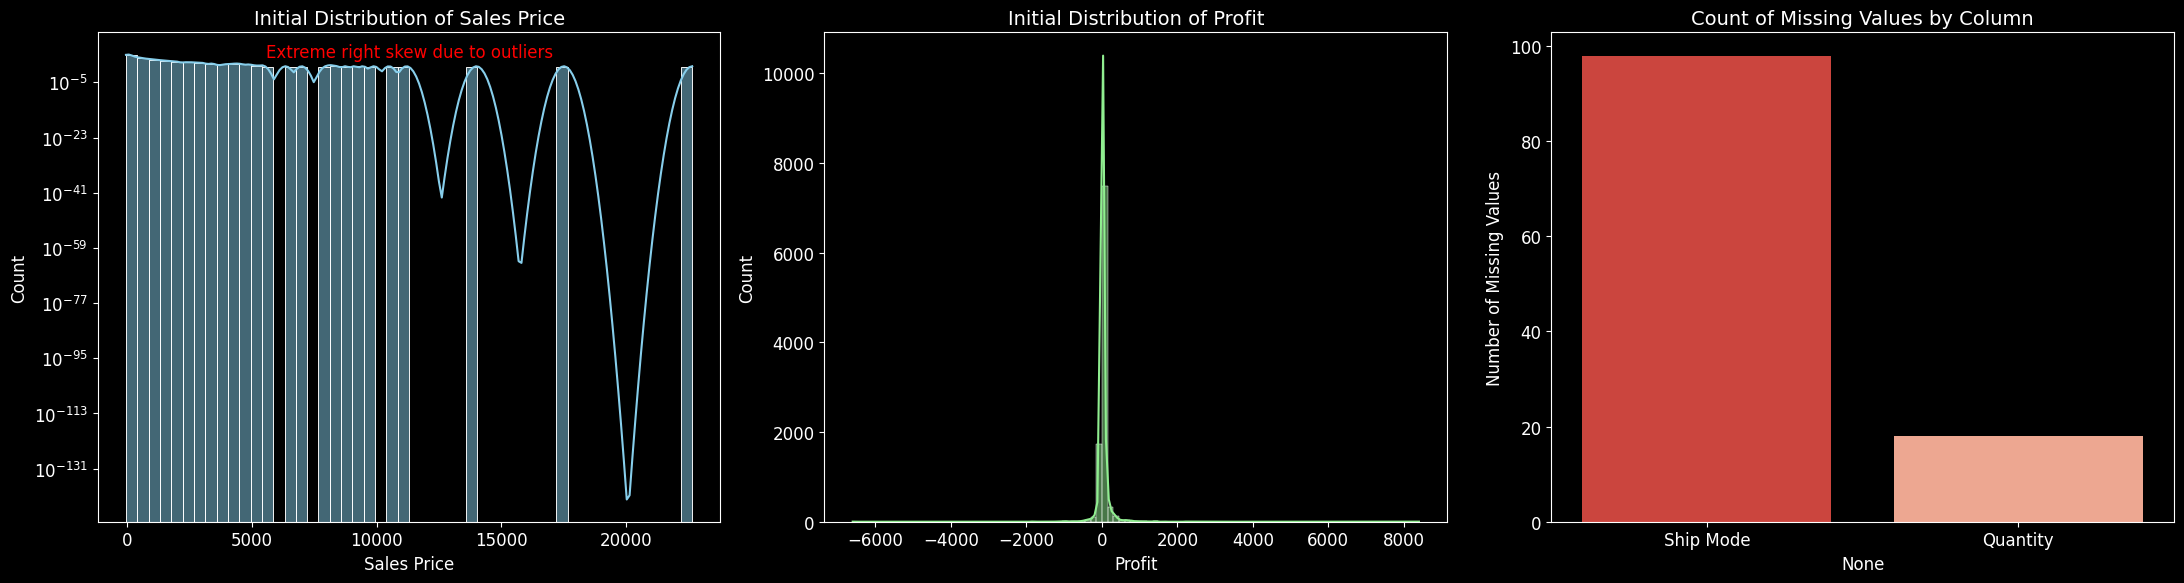

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

sns.histplot(data['Sales Price'], bins=50, ax=axes[0], kde=True, color='skyblue')
axes[0].set_title('Initial Distribution of Sales Price', fontsize=14)
axes[0].set_yscale('log')
axes[0].text(0.5, 0.95, 'Extreme right skew due to outliers', transform=axes[0].transAxes, ha='center', color='red')

sns.histplot(data['Profit'], bins=100, ax=axes[1], kde=True, color='lightgreen')
axes[1].set_title('Initial Distribution of Profit', fontsize=14)

missing_data = data.isna().sum()
missing_data = missing_data[missing_data > 0]
sns.barplot(x=missing_data.index, y=missing_data.values, ax=axes[2], palette='Reds_r')
axes[2].set_title('Count of Missing Values by Column', fontsize=14)
axes[2].set_ylabel('Number of Missing Values')

plt.tight_layout()
plt.show()

### **Initial Data Assessment: Observations**

After loading the data and performing an initial exploration using `.head()`, `.info()`, `.describe(include='all')`, and `.nunique()`, we have identified several key areas that require attention during the data cleaning and preprocessing phase.

**Summary of Findings:**

1.  **Dataset Size:** The dataset contains **10014 rows** and **21 columns**.

2.  **Missing Values:**
    *   `Ship Mode`: This column is missing **98** values.
    *   `Quantity`: This column is missing **18** values.

3.  **Data Type Inconsistencies:**
    *   `Order Date` and `Ship Date`: Both are currently `object` (string) type and need to be converted to a proper `datetime` format for calculations like 'Days to Ship'.
    *   `Postal Code`: It is an `int64` but should be an `object` (string) to preserve leading zeros and prevent it from being treated as a numerical value in calculations.
    *   `Quantity`: It is a `float64` but should be an `int64` since you cannot sell fractions of an item.

4.  **Potential Data Quality Issues & Outliers:**
    *   `Sales Price`: The `min` value is **-31.50**. A negative sales price is logically impossible. The large gap between the 75th percentile (209.97) and the max value (22638.48) strongly suggests the presence of outliers. Clearly visible in the **left histogram**.
    *   `Profit`: The `min` value is **-6599.98**, indicating significant losses on some orders. The max value is **8399.98**, compared to **29.364** as the 75th percentile, again suggesting extreme values. The **center histogram** confirms the presence of heavy losses and possible outliers.
    *   `State`: The `.nunique()` output shows **54 unique entries**. Since there are only 50 states in the US (plus territories), this indicates the presence of duplicates.

## 1.2 Handling Duplicates

In [ ]:
#getting the number of duplicate rows
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows found: {num_duplicates}")



Number of duplicate rows found: 17


In [ ]:
if num_duplicates > 0:
    #savig the before details
    rows_before = len(data)
    orders_before = data['Order ID'].nunique()
    print(f"BEFORE cleaning:\nTotal rows: {rows_before}\nUnique Order IDs: {orders_before}")

    #storing the duplicate rows
    duplicates_df = data[data.duplicated(keep=False)] # keep=False shows all occurrences of duplicates
    print(f"Example of duplicate rows:\n{duplicates_df[['Order ID', 'Product ID', 'Customer Name']].head()}")

    #dropping the duplicate rows
    data.drop_duplicates(inplace=True)

    #saving the after details
    rows_after = len(data)
    orders_after = data['Order ID'].nunique()
    print(f"AFTER cleaning:\nTotal rows: {rows_after}\nUnique Order IDs: {orders_after}")
    print("="*80)
    print("--- Impact Report ---")
    print(f"Rows removed: {rows_before - rows_after}")
    print(f"Unique Order IDs affected: {orders_before - orders_after}")
    print("="*80)
else:
    print("No duplicate rows to remove.")

BEFORE cleaning:
Total rows: 10014
Unique Order IDs: 5009
Example of duplicate rows:
            Order ID       Product ID       Customer Name
17    CA-2014-167164  OFF-ST-10000107     Alejandro Grove
18    CA-2014-143336  OFF-AR-10003056  Zuschuss Donatelli
20    CA-2014-143336  OFF-BI-10002215  Zuschuss Donatelli
1042  CA-2016-102981  FUR-BO-10001811       Mary O'Rourke
1044  CA-2017-115651  OFF-AP-10000055        Noel Staavos
AFTER cleaning:
Total rows: 9997
Unique Order IDs: 5009
--- Impact Report ---
Rows removed: 17
Unique Order IDs affected: 0


### **Handling Duplicates: Summary**

**Action Taken:**
A check for complete duplicates across all columns was performed on the dataset.

**Findings:**
*   A total of **17 fully duplicate rows** were identified.
*   These duplicates appear to be data entry errors, as every single feature for these rows was identical to another row in the dataset.

**Impact of Cleaning:**
*   **Rows Affected:** 17 rows were removed from the dataset.
*   **Unique Order IDs Affected:** 0. The removal of these duplicates did not impact the overall count of unique orders.
*   The total number of rows in the DataFrame was reduced from **10,014 to 9,997**.

**Outcome:**
The dataset is now free of fully duplicated entries, ensuring that each row represents a unique record of a product within an order.

## 1.3 Date Handling

In [ ]:
# we will convert 'Order Date' and 'Ship Date' to datetime objects

data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%y', errors='coerce')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], errors='coerce')

# checking for any null values after conversion
conversion_errors = data['Order Date'].isna().sum()
print(f"Number of rows with Order Date conversion errors: {conversion_errors}")

print("\nData types after conversion:")
print(data[['Order Date', 'Ship Date']].info())

Number of rows with Order Date conversion errors: 0

Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10005
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9997 non-null   datetime64[ns]
 1   Ship Date   9997 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 234.3 KB
None


In [ ]:
# consistency check by comparing order date with the order id


data['Order ID Year'] = data['Order ID'].str.split('-').str[1]

data['Order Date Year'] = data['Order Date'].dt.year.astype(str)

inconsistent_years = data.loc[data['Order ID Year'] != data['Order Date Year']]
rows_affected = len(inconsistent_years)
orders_affected = inconsistent_years['Order ID'].nunique()

print(f"Found {rows_affected} rows where Order ID Year does not match Order Date Year.")
print(f"This affects {orders_affected} unique Order IDs.")

if rows_affected > 0:
    print("Example of inconsistent rows:")
    print(inconsistent_years[['Order ID', 'Order Date', 'Order ID Year', 'Order Date Year']].head())

    # updating the order id based on the order date

    data.loc[data['Order ID Year'] != data['Order Date Year'], 'Order ID'] = \
        'CA-' + data['Order Date Year'] + '-' + data['Order ID'].str.split('-').str[2]


data.drop(columns=['Order ID Year', 'Order Date Year'], inplace=True)


Found 40 rows where Order ID Year does not match Order Date Year.
This affects 16 unique Order IDs.
Example of inconsistent rows:
           Order ID Order Date Order ID Year Order Date Year
62   CA-2015-135545 2017-11-24          2015            2017
63   CA-2015-135545 2017-11-24          2015            2017
64   CA-2015-135545 2017-11-24          2015            2017
65   CA-2015-135545 2017-11-24          2015            2017
943  CA-2015-120880 2013-05-29          2015            2013


### **Date Handling: Summary**

**Actions Taken:**
1.  **Date Type Normalization:** The `Order Date` and `Ship Date` columns, originally stored as `object` (string) types, were converted to the `datetime64[ns]` format.
2.  **Year Consistency Check:** A validation was performed to ensure the year embedded in the `Order ID` string matched the year from the `Order Date` field.

**Findings:**
*   An inconsistency was found in **40 rows**, affecting **16 unique Order IDs**.
*   In these cases, I assumed the year in the `Order ID` was incorrect and updated it with the year from the order date timestamp as that is more likely to be correct.

**Impact of Cleaning:**
*   **Rows Affected:** 40 `Order ID`s were updated to reflect the correct year based on their corresponding `Order Date`.
*   **Unique Order IDs Affected:** The string representation of 16 unique Order IDs was corrected.

**Outcome:**
The date-related columns are now in the correct format and are internally consistent.


## 1.4 Imputation of Missing Values

In [ ]:
# Calculate 'Days to Ship'
data['Days to Ship'] = (data['Ship Date'] - data['Order Date']).dt.days

print(data[['Order Date', 'Ship Date', 'Days to Ship']].head())

print(f"\ndescription of the days to ship column : \n{data['Days to Ship'].describe()}")


  Order Date  Ship Date  Days to Ship
0 2016-11-08 2016-11-11             3
1 2016-11-08 2016-11-11             3
2 2016-06-12 2016-06-16             4
3 2015-10-11 2015-10-18             7
4 2015-10-11 2015-10-18             7

description of the days to ship column : 
count    9997.000000
mean       -6.314894
std       176.397059
min     -5477.000000
25%         2.000000
50%         4.000000
75%         5.000000
max      5848.000000
Name: Days to Ship, dtype: float64


Note : There are negative values in the days to ship column which should be impossible - meaning order was shipped before it was ordered. It is a data quality issue. Also the max is way more than the 75th percentile - meaning there is significant outlier.

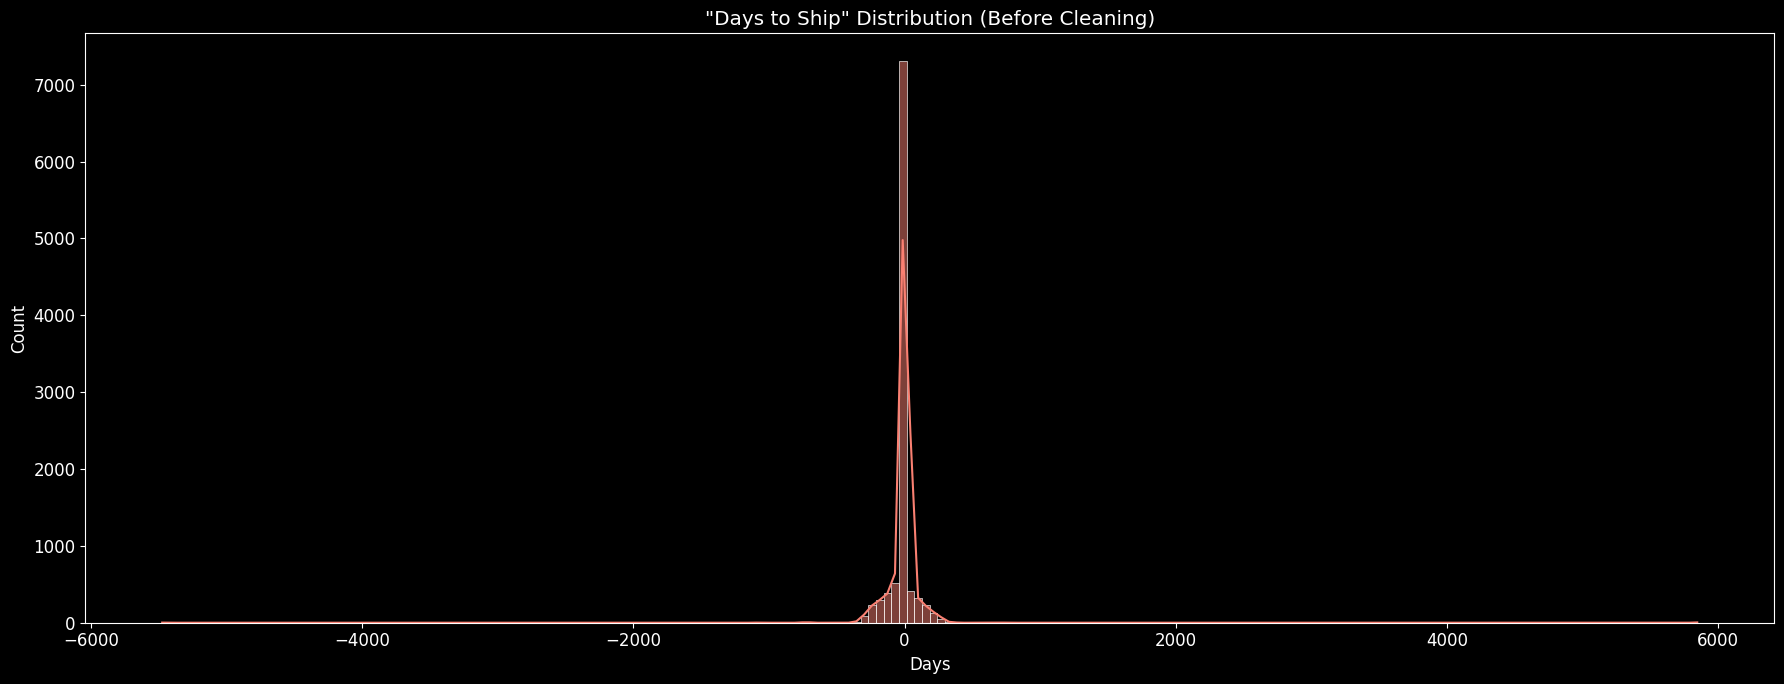

In [ ]:
fig, axes = plt.subplots(figsize=(18, 7))

sns.histplot(data['Days to Ship'].dropna(), bins=200, ax=axes, kde=True, color='salmon')
plt.title('"Days to Ship" Distribution (Before Cleaning)')
plt.xlabel('Days')

plt.tight_layout()
plt.show()

In [ ]:
# figuring out negative days to ship rows and dropping those

impossible_shipping_mask = data['Days to Ship'] < 0
num_impossible = impossible_shipping_mask.sum()

print(f"Found {num_impossible} rows with impossible shipping dates (Ship Date < Order Date).")

if num_impossible > 0:

    rows_affected = num_impossible
    orders_affected = data.loc[impossible_shipping_mask, 'Order ID'].nunique()

    print(f"This affects {rows_affected} rows and {orders_affected} unique Order IDs.")


    # nullify the incorrect Ship Date and Days to Ship
    data.loc[impossible_shipping_mask, 'Ship Date'] = np.nan
    data.loc[impossible_shipping_mask, 'Days to Ship'] = np.nan


    print("After correction, description of Days to Ship is:")
    print(data['Days to Ship'].describe())

Found 1808 rows with impossible shipping dates (Ship Date < Order Date).
This affects 1808 rows and 912 unique Order IDs.
After correction, description of Days to Ship is:
count    8189.000000
mean       23.727439
std       152.548911
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max      5848.000000
Name: Days to Ship, dtype: float64


In [ ]:
extreme_outlier_mask = data['Days to Ship'] > 90
num_extreme_outliers = extreme_outlier_mask.sum()

print(f"Found {num_extreme_outliers} rows with extreme days to ship (more than 90 days).")

if num_extreme_outliers > 0:

    rows_affected = num_extreme_outliers
    orders_affected = data.loc[extreme_outlier_mask, 'Order ID'].nunique()

    print(f"This affects {rows_affected} rows and {orders_affected} unique Order IDs.")

    # nullify the extreme outliers
    data.loc[extreme_outlier_mask, 'Ship Date'] = np.nan
    data.loc[extreme_outlier_mask, 'Days to Ship'] = np.nan

    print("After correction, description of Days to Ship is:")
    print(data['Days to Ship'].describe())

Found 693 rows with extreme days to ship (more than 90 days).
This affects 693 rows and 346 unique Order IDs.
After correction, description of Days to Ship is:
count    7496.000000
mean        6.759205
std        11.926450
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        90.000000
Name: Days to Ship, dtype: float64


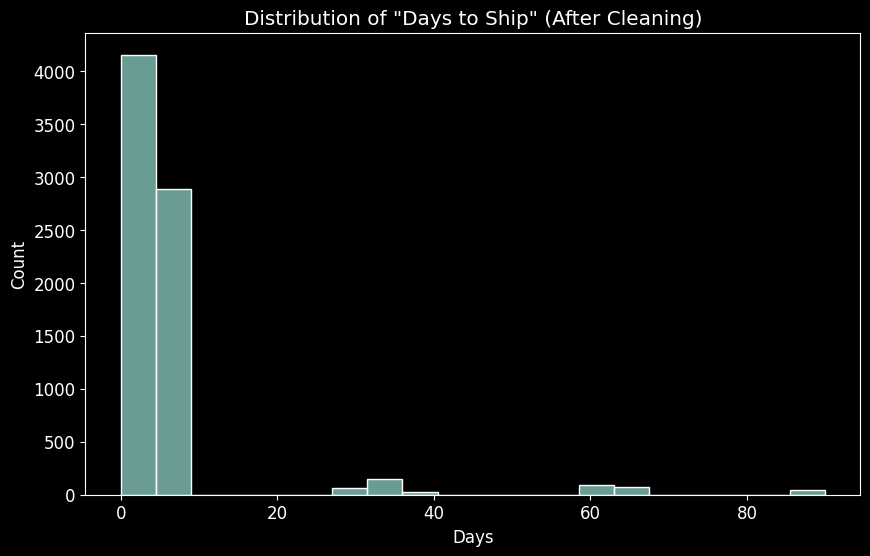

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Days to Ship'].dropna(), bins=20)
plt.title('Distribution of "Days to Ship" (After Cleaning)')
plt.xlabel('Days')
plt.show()

In [ ]:
data['Ship Mode'].value_counts()

Ship Mode
Standard Class    5903
Second Class      1946
First Class       1540
Same Day           510
Name: count, dtype: int64

In [ ]:
data['Ship Mode'].isna().sum()

np.int64(98)

In [ ]:
print(f"First Class - {data[data['Ship Mode'] == 'First Class']['Days to Ship'].describe()}")
print(f"Second Class - {data[data['Ship Mode'] == 'Second Class']['Days to Ship'].describe()}")
print(f"Standard Class - {data[data['Ship Mode'] == 'Standard Class']['Days to Ship'].describe()}")
print(f"Same Day - {data[data['Ship Mode'] == 'Same Day']['Days to Ship'].describe()}")


First Class - count    1150.000000
mean        5.695652
std        13.349082
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        90.000000
Name: Days to Ship, dtype: float64
Second Class - count    1493.000000
mean        5.767582
std        11.985647
min         2.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        90.000000
Name: Days to Ship, dtype: float64
Standard Class - count    4404.000000
mean        7.138283
std         9.752965
min         4.000000
25%         4.000000
50%         5.000000
75%         6.000000
max        67.000000
Name: Days to Ship, dtype: float64
Same Day - count    371.000000
mean       8.730458
std       22.583482
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       89.000000
Name: Days to Ship, dtype: float64


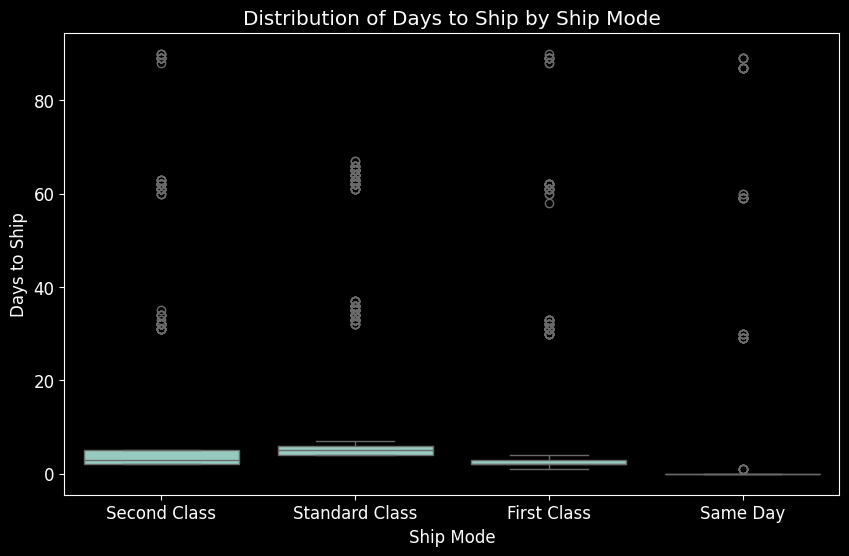

In [ ]:
# plot ship mode
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ship Mode', y='Days to Ship', data=data)
plt.title('Distribution of Days to Ship by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Days to Ship')
plt.show()

In [ ]:
data[(data['Days to Ship']> 7) ].count()

Row ID           454
Order ID         454
Order Date       454
Ship Date        454
Ship Mode        449
Customer ID      454
Customer Name    454
Segment          454
Country          454
City             454
State            454
Postal Code      454
Region           454
Product ID       454
Category         454
Sub-Category     454
Product Name     454
Sales Price      454
Quantity         454
Discount         454
Profit           454
Days to Ship     454
dtype: int64

In [ ]:
data['Quantity'].isna().sum()

np.int64(18)

In [ ]:
data['Quantity'].describe()

count    9979.000000
mean        3.790861
std         2.226648
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

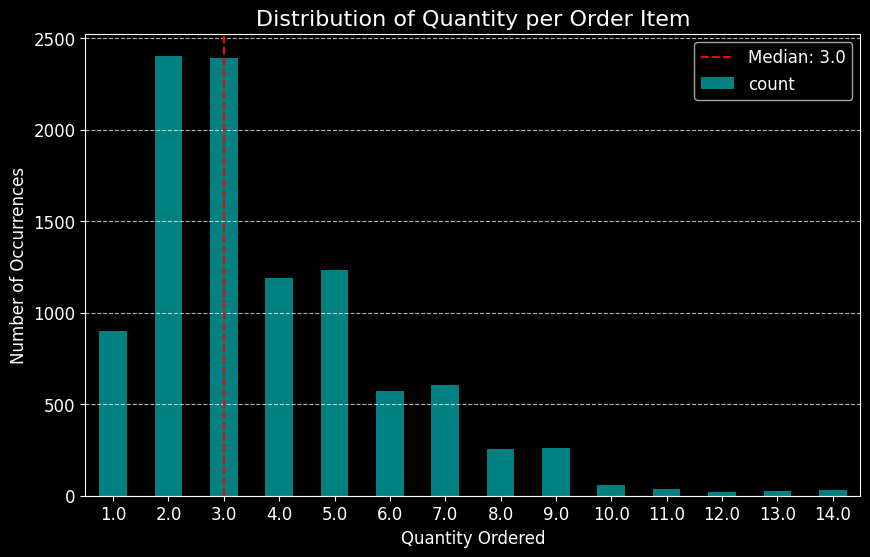

In [ ]:
plt.figure(figsize=(10, 6))

data['Quantity'].value_counts().sort_index().plot(kind='bar', color='teal')

plt.title('Distribution of Quantity per Order Item', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=0) # Keep the x-axis labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(x=data['Quantity'].median() - 1, color='red', linestyle='--', label=f"Median: {data['Quantity'].median()}")
plt.legend()

plt.show()

In [ ]:
#imputing missing value

missing_ship_mode_mask = data['Ship Mode'].isna()
num_missing_ship_mode = missing_ship_mode_mask.sum()
print(f"Number of rows with the missing Ship Mode: {num_missing_ship_mode}")

if num_missing_ship_mode > 0:

    rows_affected = num_missing_ship_mode
    orders_affected = data.loc[missing_ship_mode_mask, 'Order ID'].nunique()
    print(f"This affects {rows_affected} rows and {orders_affected} unique Order IDs.\n")

# imputation logic as per problem statement
    conditions = [
        data.loc[missing_ship_mode_mask,'Days to Ship'] == 0,
        data.loc[missing_ship_mode_mask,'Days to Ship'] == 7
    ]
    default_value = data.loc[missing_ship_mode_mask,'Ship Mode']
    choices = ['Same Day', 'Standard Class']


    data.loc[missing_ship_mode_mask, 'Ship Mode'] = np.select(conditions, choices, default=default_value)


missing_quantity_mask = data['Quantity'].isna()
num_missing_quantity = missing_quantity_mask.sum()
print(f"\nNumber of rows with missing Quantity: {num_missing_quantity}")

if num_missing_quantity > 0:

    rows_affected = num_missing_quantity
    orders_affected = data.loc[missing_quantity_mask, 'Order ID'].nunique()
    print(f"This affects {rows_affected} rows and {orders_affected} unique Order IDs.\n")

    quantity_median = data['Quantity'].median()
    print(f"Calculated median quantity: {quantity_median}")
    data['Quantity'].fillna(quantity_median, inplace=True)


print("\nNull values remaining after imputation:")
print(data[['Ship Mode', 'Quantity']].isnull().sum())

Number of rows with the missing Ship Mode: 98
This affects 98 rows and 29 unique Order IDs.


Number of rows with missing Quantity: 18
This affects 18 rows and 17 unique Order IDs.

Calculated median quantity: 3.0

Null values remaining after imputation:
Ship Mode    25
Quantity      0
dtype: int64


### **Data Correction and Value Imputation: Summary**

There were multiple data quality issues, including logical errors in dates and missing values in key columns.

**1. Correction of Invalid `Days to Ship`:**

*   **Action Taken:** The `Days to Ship` feature was engineered (`Ship Date` - `Order Date`). This process revealed two major types of data errors.
*   **Findings & Impact:**
    *   **Impossible Dates:** **1,808 rows** were found to have a negative `Days to Ship` value (e.g., shipped before ordered), impacting **912 unique orders**.
    *   **Extreme Outliers:** A further **693 rows** were identified with extreme shipping times (over 90 days), impacting **346 unique orders**. These were also deemed to be data entry errors.
    *   In total, **2,501 rows** had their `Ship Date` and `Days to Ship` values nullified to remove these logical errors from the dataset.
    *  Furthermore, the boxplot visualizing Days to Ship by Ship Mode reveals that the original Ship Mode labels are highly unreliable. For example, many orders labeled "Same Day" took several days to ship, and there is significant overlap in the actual shipping times for "First," "Second," and "Standard" classes.

**2. Imputation of Missing `Ship Mode`:**

*   **Action Taken:** Missing `Ship Mode` values were imputed based on the logic specified in the case study.
*   **Findings:** There were **98 rows** with missing `Ship Mode` across **29 unique orders**.
*   **Impact of Cleaning:**
    *   **Rows Imputed:** **73** of the 98 missing values were imputed based on the rule (`Days to Ship` of 0 for "Same Day" or 7 for "Standard Class").
    *   **Rows Remaining Null:** **25** rows did not meet the specified criteria and were correctly left as null to avoid making unsubstantiated assumptions.

**3. Imputation of Missing `Quantity`:**

*   **Action Taken:** The **18 missing values** in the `Quantity` column, affecting **17 unique orders**, were imputed.
*   **Logic Applied:** The **median** value of **3.0** was used for imputation. This method was chosen because it's robust to outliers from large bulk orders and appropriately reflects a typical order quantity.
*   **Impact of Cleaning:** The `Quantity` column now has **zero null values**, ensuring its readiness for financial calculations.

**Outcome:** This comprehensive cleaning phase has significantly improved the integrity and reliability of our dataset. We have corrected thousands of logical errors and intelligently filled in missing data where appropriate, paving the way for trustworthy analysis.

## 1.5 Data Masking and String Handling

In [ ]:
data['Customer Name'].sample(n=10)

4923       Mick Hernandez
7995       Michelle Moray
5548         Sheri Gordon
7304       Doug O'Connell
7719    Brooke Gillingham
6164         Matt Connell
6348      Patrick O'Brill
6373          Chuck Clark
1957            Ann Chong
6562         Carol Triggs
Name: Customer Name, dtype: object

In [ ]:
def get_initials(full_name):
    try:
        name_parts = full_name.split()
        initials = ".".join([part[0].upper() for part in name_parts])
        return initials
    except:
        return np.nan

In [ ]:
data['Customer Name Masked'] = data['Customer Name'].apply(get_initials)
data.drop(columns=['Customer Name'], inplace=True)

print(data[['Customer ID', 'Customer Name Masked']].head())

  Customer ID Customer Name Masked
0    CG-12520                  C.G
1    CG-12520                  C.G
2    DV-13045                D.V.H
3    SO-20335                  S.O
4    SO-20335                  S.O


In [ ]:
data['Postal Code'].sample(n=10)

8318    27217
7       90032
6394    10011
1146    48911
5841    92105
387     19140
2541    85254
6378     6708
5564    60610
4673    48205
Name: Postal Code, dtype: int64

In [ ]:
data['Postal Code'].dtype

dtype('int64')

In [ ]:
errored_postal_codes_index = data[data['Postal Code'].astype(str).str.len() < 5].index

print(f"Found {len(errored_postal_codes_index)} rows with errored Postal Codes.")

print("Example of errored Postal Codes:")
print(data.loc[errored_postal_codes_index, ['Postal Code', 'Customer ID']].head())

Found 449 rows with errored Postal Codes.
Example of errored Postal Codes:
     Postal Code Customer ID
185         6824    SK-19990
197         7090    VM-21685
267         7960    PG-18895
298         7109    JD-15895
299         7109    JD-15895


In [ ]:
data['Postal Code'] = data['Postal Code'].astype(str).str.zfill(5)

print(f"New Postal Code dtype: {data['Postal Code'].dtype}")

print(data['Postal Code'].head())

New Postal Code dtype: object
0    42420
1    42420
2    90036
3    33311
4    33311
Name: Postal Code, dtype: object


In [ ]:
data[data.index.isin(errored_postal_codes_index)]['Postal Code']

185     06824
197     07090
267     07960
298     07109
299     07109
        ...  
9889    08701
9936    02920
9967    07060
9968    07060
9969    07060
Name: Postal Code, Length: 449, dtype: object

### **Data Masking and String Handling: Summary**

**Actions Taken:**
Two key data formatting tasks were completed to enhance data privacy and ensure consistent string representation.

**1. PII Masking:**
*   **Action:** To protect customer privacy, the `Customer Name` column was masked. A new column, `Customer Name Masked`, was created containing only the initials of each customer (e.g., "Adrian Barton" -> "A.B.").
*   **Impact:** The original `Customer Name` column was subsequently dropped from the DataFrame, permanently removing the Personally Identifiable Information (PII).

**2. Postal Code Formatting:**
*   **Action:** The `Postal Code` column was standardized to ensure a consistent 5-digit string format.
*   **Findings:** The column was originally stored as a numeric type (`int64`), which would incorrectly truncate leading zeros. An investigation found **449 rows** with postal codes that were shorter than 5 digits.
*   **Impact:** The column was converted to a string type, and a `.str.zfill(5)` operation was applied. This padded all 449 affected codes with the necessary leading zeros (e.g., `7728` became `"07728"`). This guarantees that postal codes are treated as categorical labels rather than numerical values, which is essential for accurate geographic analysis.

**Outcome:** These steps ensure the dataset is both more secure and formatted correctly for any subsequent analysis involving customer or geographic data.

## 1.6 Data Type Conversion

In [ ]:
print(f"Original dtypes: Quantity -> {data['Quantity'].dtype}, Sales Price -> {data['Sales Price'].dtype}")

data['Quantity'] = data['Quantity'].astype(int)

data['Sales Price'] = data['Sales Price'].astype(float)

print(f"New dtypes: Quantity -> {data['Quantity'].dtype}, Sales Price -> {data['Sales Price'].dtype}")

Original dtypes: Quantity -> float64, Sales Price -> float64
New dtypes: Quantity -> int64, Sales Price -> float64


## 1.7 Handling Inconsistent Categorical Data

In [ ]:
print(data['State'].nunique())
print(data['State'].value_counts())

54
State
California              1906
New York                1105
Texas                    918
Pennsylvania             587
Illinois                 493
Ohio                     469
Washington               457
Florida                  383
Michigan                 255
North Carolina           250
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
Oregon                   124
Wisconsin                110
Maryland                 105
New Jersey                99
Delaware                  96
CA                        96
Minnesota                 89
Connecticut               82
TX                        67
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
WA\  

In [ ]:
original_state_counts = data['State'].value_counts().nlargest(15)

In [ ]:
data['State'] = data['State'].str.strip()

In [ ]:

state_map = {
    'CA': 'California',
    'NY': 'New York',
    'TX': 'Texas',
    'NJ': 'New Jersey',
    'WA\\': 'Washington'
}

data['State'] = data['State'].replace(state_map)

unique_states_after = data['State'].unique()
print(f"\nAfter cleaning, there are now {len(unique_states_after)} unique state entries.")



After cleaning, there are now 49 unique state entries.


In [ ]:
canonical_states = [
    'Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
    'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Idaho', 'Illinois',
    'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
    'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
    'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
    'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
    'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]


cleaned_states_set = set(data['State'].unique())

invalid_states_found = cleaned_states_set - set(canonical_states)

if not invalid_states_found:
    print("\nValidation PASSED: All state names in the DataFrame are valid.")
else:
    print("\nValidation FAILED: The following state names are not valid:")
    for state in invalid_states_found:
        print(state)


Validation PASSED: All state names in the DataFrame are valid.


In [ ]:
print(cleaned_states_set)

{'Vermont', 'Utah', 'Wisconsin', 'New Hampshire', 'Colorado', 'Nebraska', 'Virginia', 'California', 'Tennessee', 'Alabama', 'South Dakota', 'New Jersey', 'Arizona', 'Connecticut', 'South Carolina', 'Illinois', 'Massachusetts', 'North Carolina', 'Ohio', 'Rhode Island', 'New Mexico', 'Oregon', 'North Dakota', 'West Virginia', 'Delaware', 'Oklahoma', 'Iowa', 'Idaho', 'Georgia', 'New York', 'Maryland', 'District of Columbia', 'Florida', 'Texas', 'Washington', 'Louisiana', 'Missouri', 'Nevada', 'Wyoming', 'Mississippi', 'Montana', 'Michigan', 'Kansas', 'Kentucky', 'Arkansas', 'Maine', 'Minnesota', 'Pennsylvania', 'Indiana'}


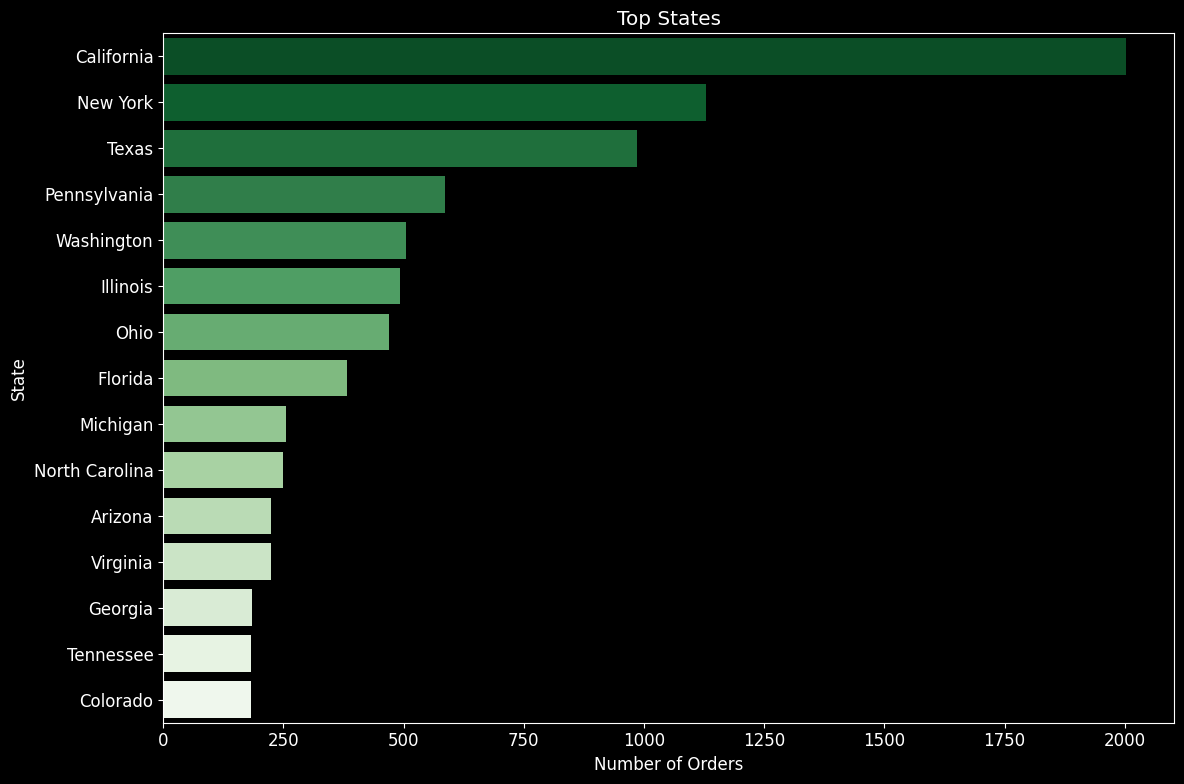

In [ ]:
fig, axes = plt.subplots(figsize=(12, 8))
sns.barplot(x=data['State'].value_counts().nlargest(15), y=data['State'].value_counts().nlargest(15).index, ax=axes, palette='Greens_r')
plt.title('Top States')
plt.xlabel('Number of Orders')


plt.tight_layout()
plt.show()

### **Data Type Conversion and Inconsistent Categorical Data handling: Summary**

**Actions Taken:**
Final conversions and cleaning steps were performed to ensure data types were correct and categorical values were standardized and validated.

**1. Data Type Conversion:**
*   **Action:** The `Quantity` column was converted to `int` and `Sales Price` was confirmed as `float`.
*   **Outcome:** These columns now have the appropriate numeric types for all downstream financial calculations and analyses.

**2. State Name Standardization:**
*   **Action:** The `State` column was cleaned to ensure consistency.
*   **Findings:** The initial exploration revealed **54 unique entries**, indicating the presence of abbreviations (e.g., "CA"), typos ("WA\\"), and entries with leading/trailing whitespace ("CA ").
*   **Impact of Cleaning:**
    *   Whitespace was stripped from all entries using `.str.strip()`.
    *   A targeted mapping was used to replace all identified abbreviations and typos with their full state names.
    *   This reduced the number of unique entries from 54 to the correct **49** states/districts present in the data.

**3. State Name Validation:**
*   **Action:** A final validation check was performed by comparing the cleaned state names against a canonical list of US states and districts.
*   **Outcome:** The validation **PASSED**, confirming that every entry in the `State` column is now a valid and consistently formatted state name.

**Conclusion:**
The DataFrame is now free of duplicates, has consistent and valid data types, contains no logical errors in its date columns, and has its inconsistent categorical data handled.

## 1.8 Feature Engineering


* **Original Price**: The price before any discount is applied.
* **Total Sales**: The total revenue generated by multiplying `Sales Price` by `Quantity`.
* **Total Profit**: The total profit earned by multiplying `Profit` by `Quantity`.
* **Discount Price**: The amount of discount applied, calculated based on `Original Price` and `Discount`.
* **Total Discount**: The total discount value for the quantity sold.
* **Shipping Urgency**: Based on `Days to Ship`:
    * "Immediate" if `Days to Ship` is 0.
    * "Urgent" if `Days to Ship` is between 1 and 3.
    * "Standard" if `Days to Ship` is more than 3.
* **Days Since Last Order**: Calculate days since the last order for each customer.
* **Customer-Level Aggregations**: Create a new dataset storing total sales, quantity, and discount per customer, then merge these back to the original dataset.


In [ ]:
data[['Sales Price','Discount']].describe()

Sales Price     Discount
count   9997.000000  9997.000000
mean     229.798602     0.156216
std      623.164427     0.206422
min      -31.500000     0.000000
25%       17.240000     0.000000
50%       54.480000     0.200000
75%      209.940000     0.200000
max    22638.480000     0.800000

Sales Price column has negative values

In [ ]:
negative_price_mask = data['Sales Price'] < 0
num_negative_prices = negative_price_mask.sum()

print(f"Found {num_negative_prices} rows with a negative Sales Price.")

Found 4 rows with a negative Sales Price.


In [ ]:
data[negative_price_mask]['Sales Price']

9794    -18.240
9984    -31.500
10000    -9.392
10005    -8.840
Name: Sales Price, dtype: float64

**Assumption** : The negative values are a typo and we can just take the absolute value here

In [ ]:
if num_negative_prices > 0:

    rows_affected = num_negative_prices
    orders_affected = data.loc[negative_price_mask, 'Order ID'].nunique()

    print(f"This affects {rows_affected} rows and {orders_affected} unique Order IDs.")

    data['Sales Price'] = data['Sales Price'].abs()

    print("After correction, description of Sales Price is:")
    print(data['Sales Price'].describe())

This affects 4 rows and 4 unique Order IDs.
After correction, description of Sales Price is:
count     9997.000000
mean       229.812201
std        623.159412
min          0.444000
25%         17.248000
50%         54.480000
75%        209.940000
max      22638.480000
Name: Sales Price, dtype: float64


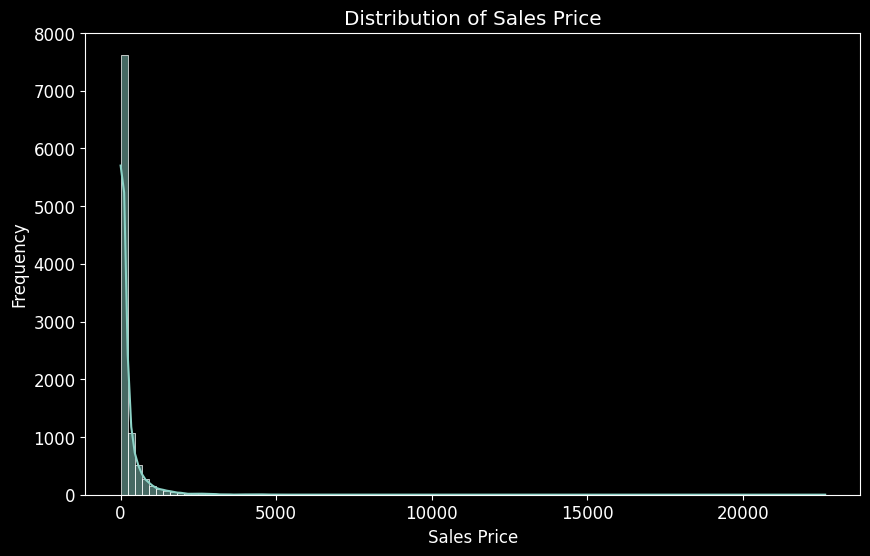

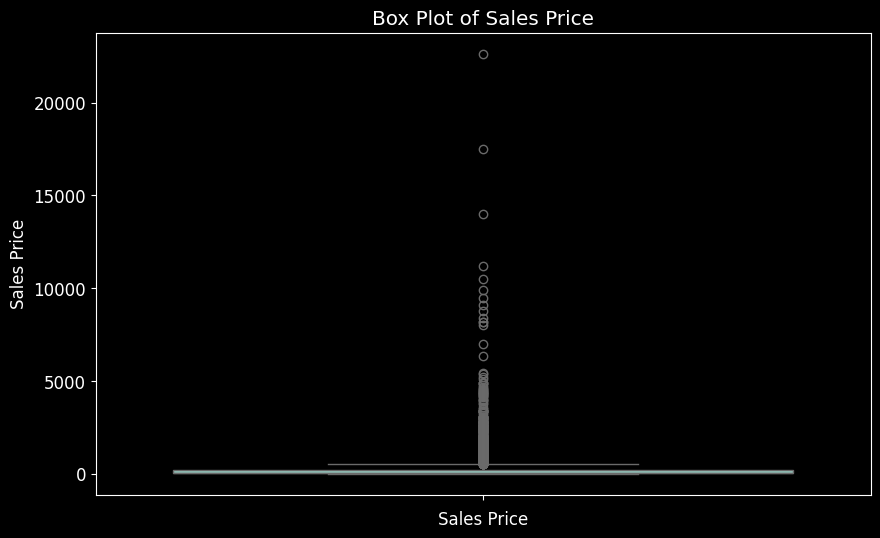

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(data['Sales Price'], bins=100, kde=True)
plt.title('Distribution of Sales Price')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data['Sales Price'])
plt.title('Box Plot of Sales Price')
plt.xlabel('Sales Price')
plt.show()

In [ ]:
data['Original Price'] = data['Sales Price'] / (1 - data['Discount'])
data['Total Sales'] = data['Sales Price'] * data['Quantity']
data['Total Profit'] = data['Profit'] * data['Quantity']
data['Discount Price'] = data['Original Price'] * data['Discount']
data['Total Discount'] = data['Discount Price'] * data['Quantity']

print(data[['Quantity', 'Discount', 'Sales Price', 'Original Price', 'Total Sales', 'Profit', 'Total Profit', 'Discount Price', 'Total Discount']].head())

   Quantity  Discount  Sales Price  Original Price  Total Sales    Profit  \
0         2      0.00     261.9600          261.96     523.9200   41.9136   
1         3      0.00     731.9400          731.94    2195.8200  219.5820   
2         2      0.00      14.6200           14.62      29.2400    6.8714   
3         5      0.45     957.5775         1741.05    4787.8875 -383.0310   
4         2      0.20      22.3680           27.96      44.7360    2.5164   

   Total Profit  Discount Price  Total Discount  
0       83.8272          0.0000          0.0000  
1      658.7460          0.0000          0.0000  
2       13.7428          0.0000          0.0000  
3    -1915.1550        783.4725       3917.3625  
4        5.0328          5.5920         11.1840  


In [ ]:
conditions = [
    (data['Days to Ship']==0),
    (data['Days to Ship']>=1) & (data['Days to Ship']<=3),
    (data['Days to Ship']>3)
]
choices = ["Immediate","Urgent","Standard"]
data['Shipping Urgency'] = np.select(conditions,choices,"Standard")

data[['Days to Ship','Shipping Urgency']].head()

Days to Ship Shipping Urgency
0           3.0           Urgent
1           3.0           Urgent
2           4.0         Standard
3           7.0         Standard
4           7.0         Standard

In [ ]:
data.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Segment        Country             City       State  ... Discount  \
0   Consumer  United States        Henderson    Kentucky  ...     0.00   
1   Consumer  United States        Henderson    Kentucky  ...     0.00   
2  Corporate  United States      Los Angeles  California  ...     0.00   
3   Consumer  United States  Fort Lauderdale     Florida  ...     0.45   
4   Consumer  United States  Fort Lauderdale     Florida  ...     0.20   

     Profit Days to Ship Customer Name Masked Original Price Total Sales  \
0   41.9136          3.0                  C.G         261.96    523.9200   
1  219.5820          3.0                  C.G         731.94   2195.8200   
2    6.8714          4.0                D.V.H          14.62     29.2400   
3 -383.0310          7.0                  S.O        1741.05   4787.8875   
4    2.5164          7.0                  S.O          27.96     44.7360   

   Total Profit  Discount Price  Total Discount  Shipping Urgency  
0       83.8272          0.0000          0.0000            Urgent  
1      658.7460          0.0000          0.0000            Urgent  
2       13.7428          0.0000          0.0000          Standard  
3    -1915.1550        783.4725       3917.3625          Standard  
4        5.0328          5.5920         11.1840          Standard  

[5 rows x 28 columns]

In [ ]:
diff_data = data.sort_values(['Customer ID','Order Date']).groupby('Customer ID')['Order Date'].diff()

In [ ]:
diff_data

2229        NaT
2230     0 days
7468   168 days
7469     0 days
1299   384 days
         ...   
5898     0 days
3040    32 days
3814    64 days
3815     0 days
8341   338 days
Name: Order Date, Length: 9997, dtype: timedelta64[ns]

In [ ]:
data['Days Since Last Order'] = diff_data.dt.days

In [ ]:
print(data[data['Customer ID'] == 'CG-12520'].sort_values(['Order Date'])[['Customer ID', 'Order Date', 'Days Since Last Order']])

     Customer ID Order Date  Days Since Last Order
6877    CG-12520 2015-10-15                    NaN
6878    CG-12520 2015-10-15                    0.0
0       CG-12520 2016-11-08                  390.0
1       CG-12520 2016-11-08                    0.0
5491    CG-12520 2017-01-26                   79.0


In [ ]:
cust_df = data[['Customer ID','Total Sales','Quantity']].groupby('Customer ID').sum()
cust_df['Discount'] = data.groupby('Customer ID')['Discount'].mean()
cust_df['Total Profit'] = data.groupby('Customer ID')['Total Profit'].sum()

In [ ]:
cust_df.reset_index(inplace=True)

In [ ]:
cust_df

Customer ID  Total Sales  Quantity  Discount  Total Profit
0      AA-10315    16073.344        30  0.090909    -1353.7195
1      AA-10375     2734.830        41  0.080000      683.0802
2      AA-10480     5493.936        36  0.016667     1414.5166
3      AA-10645    22927.855        64  0.063889     3876.2815
4      AB-10015     1984.480        13  0.066667      262.7361
..          ...          ...       ...       ...           ...
788    XP-21865     8676.214       100  0.046429     2102.8354
789    YC-21895    27208.926        31  0.075000     7093.8072
790    YS-21880    46478.992        58  0.050000    13488.7997
791    ZC-21910    40212.889       105  0.254839    -1740.9304
792    ZD-21925     7132.888        35  0.120000     1051.8427

[793 rows x 5 columns]

In [ ]:
customer_summary_df = data.groupby('Customer ID').agg(
    Customer_Total_Sales=('Total Sales', 'sum'),
    Customer_Total_Quantity=('Quantity', 'sum'),
    Customer_Total_Profit=('Total Profit', 'sum'),
    Customer_Avg_Discount=('Discount', 'mean')
)

print(customer_summary_df.head())

             Customer_Total_Sales  Customer_Total_Quantity  \
Customer ID                                                  
AA-10315                16073.344                       30   
AA-10375                 2734.830                       41   
AA-10480                 5493.936                       36   
AA-10645                22927.855                       64   
AB-10015                 1984.480                       13   

             Customer_Total_Profit  Customer_Avg_Discount  
Customer ID                                                
AA-10315                -1353.7195               0.090909  
AA-10375                  683.0802               0.080000  
AA-10480                 1414.5166               0.016667  
AA-10645                 3876.2815               0.063889  
AB-10015                  262.7361               0.066667  


In [ ]:
data = pd.merge(data, customer_summary_df, on='Customer ID', how='left')


In [ ]:
data.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Segment        Country             City       State  ... Total Sales  \
0   Consumer  United States        Henderson    Kentucky  ...    523.9200   
1   Consumer  United States        Henderson    Kentucky  ...   2195.8200   
2  Corporate  United States      Los Angeles  California  ...     29.2400   
3   Consumer  United States  Fort Lauderdale     Florida  ...   4787.8875   
4   Consumer  United States  Fort Lauderdale     Florida  ...     44.7360   

  Total Profit Discount Price Total Discount Shipping Urgency  \
0      83.8272         0.0000         0.0000           Urgent   
1     658.7460         0.0000         0.0000           Urgent   
2      13.7428         0.0000         0.0000         Standard   
3   -1915.1550       783.4725      3917.3625         Standard   
4       5.0328         5.5920        11.1840         Standard   

  Days Since Last Order  Customer_Total_Sales  Customer_Total_Quantity  \
0                 390.0             3549.6600                       14   
1                   0.0             3549.6600                       14   
2                   NaN             6156.8940                       28   
3                   NaN            10343.1775                       52   
4                   0.0            10343.1775                       52   

   Customer_Total_Profit  Customer_Avg_Discount  
0               176.5900               0.200000  
1               176.5900               0.200000  
2             -2561.4590               0.172222  
3              -821.6332               0.136667  
4              -821.6332               0.136667  

[5 rows x 33 columns]

### **Feature Engineering Summary**

**Actions Taken:**
Several new features were engineered to add analytical depth to the dataset.

**1. Financial Metrics:**
*   **Features Created:** `Original Price`, `Total Sales`, `Total Profit`, `Discount Price`, and `Total Discount`.
*   **Purpose:** These columns provide a complete financial picture for each line item.

**2. Shipping Urgency:**
*   **Feature Created:** `Shipping Urgency` (Categories: "Immediate", "Urgent", "Standard").
*   **Purpose:** Based on the cleaned `Days to Ship` column, this feature provides a reliable, business-oriented label for shipping performance. It is more trustworthy than the original, inconsistent `Ship Mode` data.

**3. Customer Purchase Frequency:**
*   **Feature Created:** `Days Since Last Order`.
*   **Purpose:** This feature calculates the time gap between a customer's consecutive orders. It is used for analyzing customer loyalty, purchase cadence, and identifying repeat customers versus one-time buyers. Its calculation required sorting the data and using a `groupby().diff()` operation.

**4. Customer-Level Aggregates:**
*   **Features Created:** `Customer_Total_Sales`, `Customer_Total_Quantity`, and `Customer_Avg_Discount`.
*   **Purpose:** A summary DataFrame was created to calculate the lifetime value and behavior of each customer. These aggregate statistics were then merged back into the main DataFrame, allowing every single order to be viewed in the context of the overall value of the customer who placed it. This is essential for customer segmentation.

**Outcome:**
Feature Engineering has successfully enriched the dataset with powerful new features. The df now contains not only the original cleaned data but also a set of derived metrics that can provide valuable insights.

## 1.9 Outlier Detection and Handling

In [ ]:
sales_Q1 = data['Sales Price'].quantile(0.25)
sales_Q3 = data['Sales Price'].quantile(0.75)
sales_IQR = sales_Q3 - sales_Q1

print(sales_Q1 , sales_Q3, sales_IQR)

print(data['Sales Price'].describe())

17.248 209.94 192.692
count     9997.000000
mean       229.812201
std        623.159412
min          0.444000
25%         17.248000
50%         54.480000
75%        209.940000
max      22638.480000
Name: Sales Price, dtype: float64


In [ ]:
def remove_outliers(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  lower_bound = q1 - 3 * iqr
  upper_bound = q3 + 3 * iqr

  outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
  print(f"Q1: {q1:.2f}\nQ3: {q3:.2f}\n IQR: {iqr:.2f}\nLower Bound: {lower_bound:.2f}\nUpper Bound: {upper_bound:.2f}\nNumber of outliers in column: '{col}' is {len(df[outlier_mask])}")

  return df[~outlier_mask]



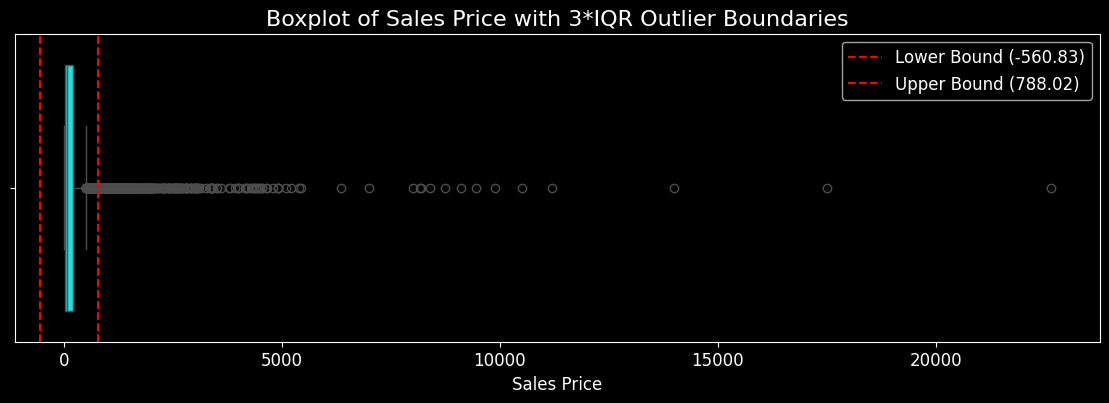

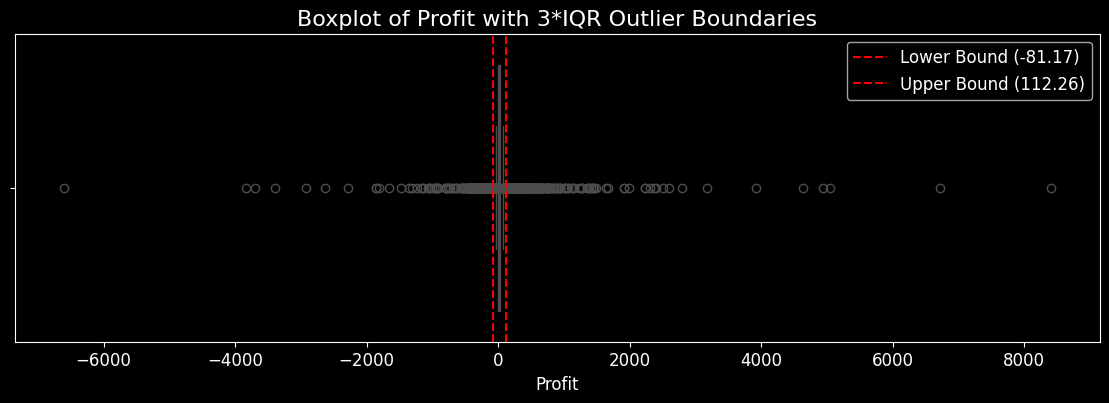

In [ ]:
Q1 = data['Sales Price'].quantile(0.25)
Q3 = data['Sales Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

plt.figure(figsize=(14, 4))
sns.boxplot(x=data['Sales Price'], color='cyan')

plt.title('Boxplot of Sales Price with 3*IQR Outlier Boundaries', fontsize=16)
plt.xlabel('Sales Price', fontsize=12)

plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(x=upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')

plt.legend()
plt.show()


Q1 = data['Profit'].quantile(0.25)
Q3 = data['Profit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

plt.figure(figsize=(14, 4))
sns.boxplot(x=data['Profit'], color='cyan')
plt.title('Boxplot of Profit with 3*IQR Outlier Boundaries', fontsize=16)
plt.xlabel('Profit', fontsize=12)
plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(x=upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')

plt.legend()
plt.show()

In [ ]:
remove_outliers(data, 'Sales Price')

Q1: 17.25
Q3: 209.94
 IQR: 192.69
Lower Bound: -560.83
Upper Bound: 788.02
Number of outliers in column: 'Sales Price' is 668


Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
5          6  CA-2014-115812 2014-06-09 2014-06-14  Standard Class   
...      ...             ...        ...        ...             ...   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04        NaT    Second Class   
9994      20  CA-2014-143336 2014-08-27 2014-09-01    Second Class   
9995    8852  CA-2015-140718 2015-07-02        NaT     First Class   
9996    1044  CA-2017-115651 2017-07-09        NaT     First Class   

     Customer ID    Segment        Country             City           State  \
0       CG-12520   Consumer  United States        Henderson        Kentucky   
1       CG-12520   Consumer  United States        Henderson        Kentucky   
2       DV-13045  Corporate  United States      Los Angeles      California   
4       SO-20335   Consumer  United States  Fort Lauderdale         Florida   
5       BH-11710   Consumer  United States      Los Angeles      California   
...          ...        ...            ...              ...             ...   
9992    DB-13060   Consumer  United States       Costa Mesa      California   
9993    CC-12220   Consumer  United States      Westminster      California   
9994    ZD-21925   Consumer  United States    San Francisco      California   
9995    FA-14230  Corporate  United States          Raleigh  North Carolina   
9996    NS-18640  Corporate  United States          Chicago        Illinois   

      ... Total Sales Total Profit Discount Price Total Discount  \
0     ...     523.920      83.8272          0.000          0.000   
1     ...    2195.820     658.7460          0.000          0.000   
2     ...      29.240      13.7428          0.000          0.000   
4     ...      44.736       5.0328          5.592         11.184   
5     ...     342.020      99.1858          0.000          0.000   
...   ...         ...          ...            ...            ...   
9992  ...     118.400      53.2800          0.000          0.000   
9993  ...     486.320     145.8960          0.000          0.000   
9994  ...     640.440      48.0330         53.370        160.110   
9995  ...      18.784       6.5744          2.348          4.696   
9996  ...      44.200      14.9175          2.210         11.050   

     Shipping Urgency Days Since Last Order  Customer_Total_Sales  \
0              Urgent                 390.0             3549.6600   
1              Urgent                   0.0             3549.6600   
2            Standard                   NaN             6156.8940   
4            Standard                   0.0            10343.1775   
5            Standard                   NaN            36995.1770   
...               ...                   ...                   ...   
9992         Standard                   0.0            20617.7460   
9993         Standard                 215.0            20295.6020   
9994         Standard                   0.0             7132.8880   
9995         Standard                   0.0             9527.3240   
9996         Standard                   0.0            12860.8770   

      Customer_Total_Quantity  Customer_Total_Profit  Customer_Avg_Discount  
0                          14               176.5900               0.200000  
1                          14               176.5900               0.200000  
2                          28             -2561.4590               0.172222  
4                          52              -821.6332               0.136667  
5                          97              4616.3016               0.183333  
...                       ...                    ...                    ...  
9992                    

In [ ]:
rows_before = len(data)
orders_before = data['Order ID'].nunique()

print(f"Before outlier removal we have {rows_before} rows with {orders_before} unique orders")

Before outlier removal we have 9997 rows with 5009 unique orders


In [ ]:
sales_data_cleaned = remove_outliers(data,'Sales Price')
print(f"After sales outlier removal we have {len(sales_data_cleaned)} rows with {sales_data_cleaned['Order ID'].nunique()} unique orders")
sales_and_profit_data_cleaned = remove_outliers(sales_data_cleaned,'Profit')
print(f"After profit outlier removal we have {len(sales_and_profit_data_cleaned)} rows with {sales_and_profit_data_cleaned['Order ID'].nunique()} unique orders")

Q1: 17.25
Q3: 209.94
 IQR: 192.69
Lower Bound: -560.83
Upper Bound: 788.02
Number of outliers in column: 'Sales Price' is 668
After sales outlier removal we have 9329 rows with 4851 unique orders
Q1: 1.67
Q3: 23.72
 IQR: 22.05
Lower Bound: -64.47
Upper Bound: 89.86
Number of outliers in column: 'Profit' is 882
After profit outlier removal we have 8447 rows with 4614 unique orders


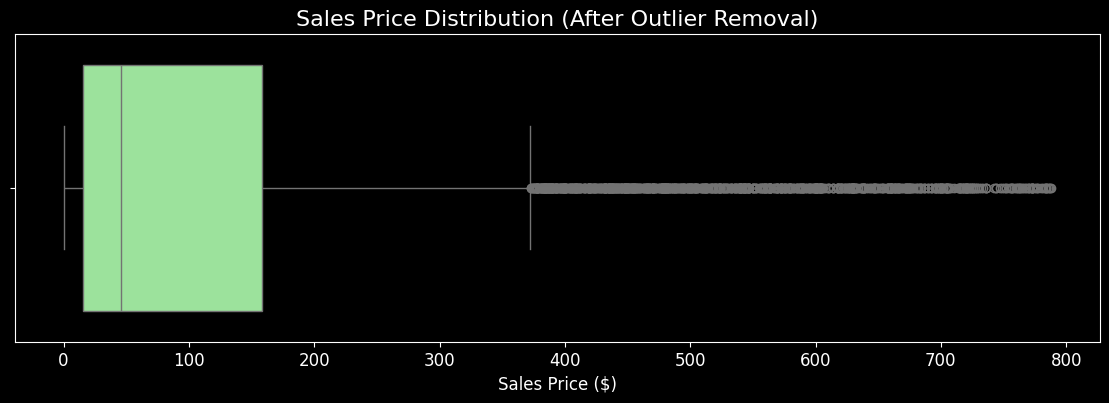

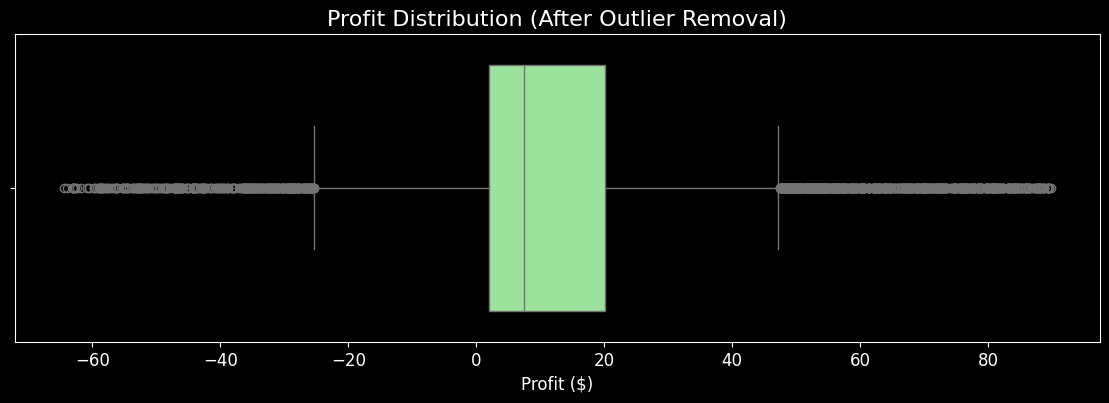

In [ ]:
plt.figure(figsize=(14, 4))
sns.boxplot(x=sales_data_cleaned['Sales Price'], color='lightgreen')
plt.title('Sales Price Distribution (After Outlier Removal)', fontsize=16)
plt.xlabel('Sales Price ($)', fontsize=12)
plt.show()

plt.figure(figsize=(14, 4))
sns.boxplot(x=sales_and_profit_data_cleaned['Profit'], color='lightgreen')
plt.title('Profit Distribution (After Outlier Removal)', fontsize=16)
plt.xlabel('Profit ($)', fontsize=12)
plt.show()

In [ ]:
rows_after = len(sales_and_profit_data_cleaned)
orders_after = sales_and_profit_data_cleaned['Order ID'].nunique()

print(f"After outlier removal we have {rows_after} rows with {orders_after} unique orders")
print(f"Total rows removed: {rows_before - rows_after}")
print(f"Total orders removed: {orders_before - orders_after}")

data = sales_and_profit_data_cleaned

After outlier removal we have 8447 rows with 4614 unique orders
Total rows removed: 1550
Total orders removed: 395


### **Outlier Detection and Handling: Summary**

*   **Action Taken:** A reusable function was created to detect and remove outliers from a specified column using the **3 * IQR rule**, as required by the case study. This method was chosen to be more conservative, removing only the most extreme values from a dataset with high variance like sales data.
*   **Application & Impact:**
    1.  **On `Sales Price`:**
        *   The function identified an upper bound of **$788.02**.
        *   **668 rows** with a `Sales Price` above this bound were flagged as outliers and removed.
    2.  **On `Profit`:**
        *   The function was then applied to the already-filtered data. It identified bounds of **-$64.47** and **$89.86**.
        *   An additional **882 rows** with `Profit` outside this range were removed.
*   **Overall Impact of Cleaning:**
    *   **Total Rows Removed:** 1,550 (`9997 - 8447`).
    *   **Unique Order IDs Affected:** 395 (`5009 - 4614`).
*   **Outcome:** The dataset has been trimmed of its most extreme financial outliers. The main `data` DataFrame has been updated to this cleaned version.



## 1.10. Customer Segmentation and Analysis

In [ ]:
data.groupby(['Customer ID'])['Customer_Total_Sales'].first()

Customer ID
AA-10315    16073.344
AA-10375     2734.830
AA-10480     5493.936
AA-10645    22927.855
AB-10015     1984.480
              ...    
XP-21865     8676.214
YC-21895    27208.926
YS-21880    46478.992
ZC-21910    40212.889
ZD-21925     7132.888
Name: Customer_Total_Sales, Length: 789, dtype: float64

In [ ]:
data.groupby(['Customer ID'])['Customer_Total_Profit'].first()

Customer ID
AA-10315    -1353.7195
AA-10375      683.0802
AA-10480     1414.5166
AA-10645     3876.2815
AB-10015      262.7361
               ...    
XP-21865     2102.8354
YC-21895     7093.8072
YS-21880    13488.7997
ZC-21910    -1740.9304
ZD-21925     1051.8427
Name: Customer_Total_Profit, Length: 789, dtype: float64

In [ ]:
data['Customer Sales Quintile'] = pd.qcut(data['Customer_Total_Sales'], q=5, labels=[1, 2, 3, 4, 5])
data['Customer Profit Quintile'] = pd.qcut(data['Customer_Total_Profit'], q=5, labels=[1, 2, 3, 4, 5])

print(data[['Customer ID', 'Customer_Total_Sales', 'Customer Sales Quintile', 'Customer_Total_Profit', 'Customer Profit Quintile']].head())
customer_segmentation_grid = pd.crosstab(
    data['Customer Sales Quintile'],
    data['Customer Profit Quintile']
)

print(customer_segmentation_grid)

  Customer ID  Customer_Total_Sales Customer Sales Quintile  \
0    CG-12520             3549.6600                       1   
2    DV-13045             6156.8940                       2   
4    SO-20335            10343.1775                       3   
5    BH-11710            36995.1770                       5   
6    BH-11710            36995.1770                       5   

   Customer_Total_Profit Customer Profit Quintile  
0               176.5900                        2  
2             -2561.4590                        1  
4              -821.6332                        1  
5              4616.3016                        5  
6              4616.3016                        5  
Customer Profit Quintile    1    2    3    4     5
Customer Sales Quintile                           
1                         441  977  271    9     0
2                         306  350  746  280     0
3                         383  156  466  614    70
4                         271   90  189  606   536
5  

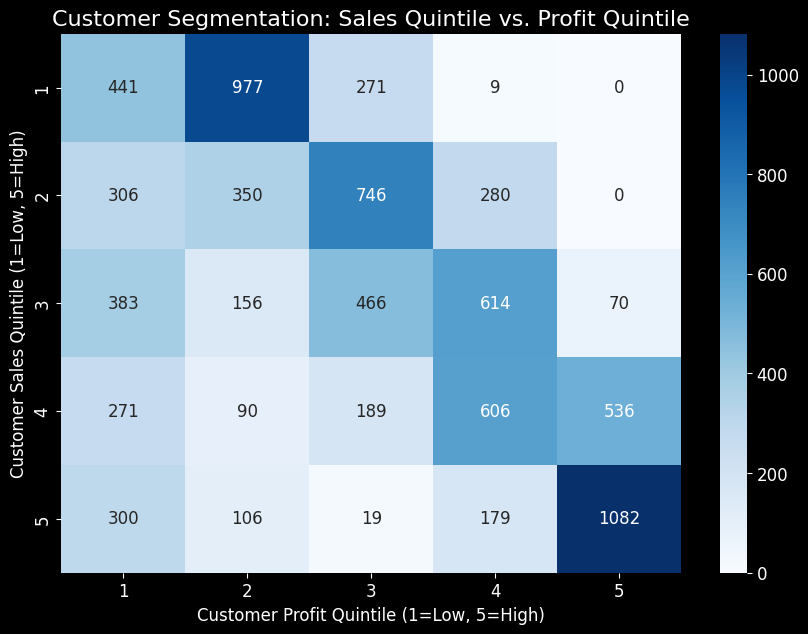

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(customer_segmentation_grid, annot=True, fmt='d', cmap='Blues')


plt.title('Customer Segmentation: Sales Quintile vs. Profit Quintile', fontsize=16)
plt.xlabel('Customer Profit Quintile (1=Low, 5=High)', fontsize=12)
plt.ylabel('Customer Sales Quintile (1=Low, 5=High)', fontsize=12)

plt.show()

Average Discount per Customer Segment:
Customer Profit Quintile         1         2         3         4         5
Customer Sales Quintile                                                   
1                         0.206168  0.140522  0.123247  0.100000       NaN
2                         0.205719  0.171486  0.143432  0.101250       NaN
3                         0.196005  0.175321  0.146867  0.136515  0.143571
4                         0.194649  0.197222  0.180529  0.137162  0.115485
5                         0.180567  0.152358  0.102632  0.148994  0.132181

--- Heatmap of Average Discount per Customer Segment ---


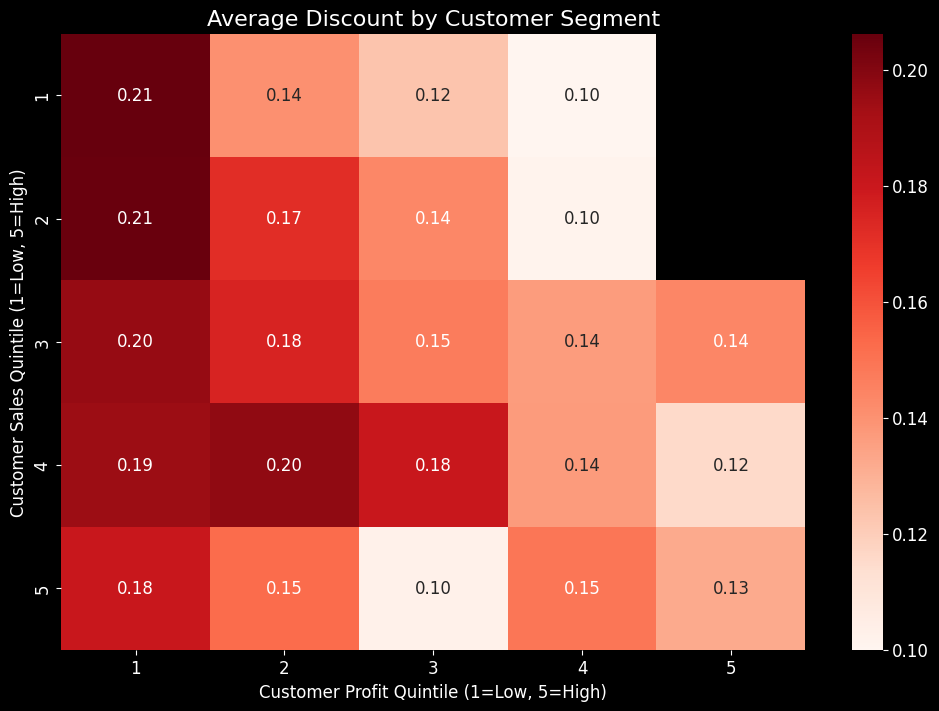

In [ ]:
# --- VISUALIZING THE CHARACTERISTICS OF CUSTOMER SEGMENTS ---

# 1. Calculate the average discount for each segment grid
avg_discount_grid = data.groupby(['Customer Sales Quintile', 'Customer Profit Quintile'])['Discount'].mean().unstack()
print("Average Discount per Customer Segment:")
print(avg_discount_grid)

# 2. Create the heatmap for average discount
print("\n--- Heatmap of Average Discount per Customer Segment ---")
plt.figure(figsize=(12, 8))
sns.heatmap(avg_discount_grid, annot=True, fmt='.2f', cmap='Reds')

# 3. Add titles and labels
plt.title('Average Discount by Customer Segment', fontsize=16)
plt.xlabel('Customer Profit Quintile (1=Low, 5=High)', fontsize=12)
plt.ylabel('Customer Sales Quintile (1=Low, 5=High)', fontsize=12)
plt.show()

In [ ]:
# print("\n--- Analyzing Product Category Preferences for Key Segments ---")
# champions = data[data['Customer Sales Quintile']==5]
# at_risk = data[data['Customer Profit Quintile']==1]
# loyalists = data[(data['Customer Sales Quintile']==4) & (data['Customer Profit Quintile']==4)]

# segment_category_data = pd.DataFrame({
#     'Champions': champions['Category'].value_counts(normalize=True),
#     'At-Risk (Low Profit)': at_risk['Category'].value_counts(normalize=True),
#     'Loyalists': loyalists['Category'].value_counts(normalize=True)
# }).T
# print(segment_category_data)
# segment_category_data.plot(kind='barh', stacked=True, figsize=(14, 8),
#                            colormap='viridis', alpha=0.8)

# plt.title('Product Category Mix by Customer Segment', fontsize=16)
# plt.xlabel('Proportion of Orders', fontsize=12)
# plt.ylabel('Customer Segment', fontsize=12)
# plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.gca().xaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format)) # Format x-axis as percentage

# plt.show()

#### Advanced Segmentation: Weighted RFM ( Recency, Frequency, MonetaryValue )
From our analysis it seems there is a segment of customers who spend a lot but are unprofitable. I will be doing a weighted sum RFM to better analyse customer behaviour to better differentiate between a healthy, loyal high-spender and a problematic, discount-driven one.

I will use the following weights to calculate a final customer score:

* Recency (Weight: 40%): Prioritizes currently engaged customers, helping us identify who is active vs. who is at risk of churning.
* Frequency (Weight: 40%): Prioritizes loyalty and habit. This directly rewards the repeat business that forms the company's backbone.
* Monetary (Weight: 20%): Deliberately down-weighted. This is the key to our tailored approach. It ensures that customers from our "High Volume - Low Profit" quintile are not mistakenly promoted to top-tier status. We are making a conscious decision that profitable loyalty (R & F) is twice as important as raw sales volume (M).

In [ ]:
snapshot_date = data['Order Date'].max() + pd.Timedelta(days=1)
rfm_data = data.groupby('Customer ID').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,
    'Order ID': 'nunique',
    'Total Sales': 'sum'
}).rename(columns={'Order Date': 'Recency', 'Order ID': 'Frequency', 'Total Sales': 'MonetaryValue'})


rfm_data.head()

Recency  Frequency  MonetaryValue
Customer ID                                   
AA-10315        4329          5       1847.172
AA-10375        4164          9       1734.870
AA-10480        4404          4       2262.666
AA-10645        4200          6       5642.880
AB-10015        4560          3       1984.480

In [ ]:

rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_data['M_Score'] = pd.qcut(rfm_data['MonetaryValue'], 5, labels=[1, 2, 3, 4, 5])


rfm_data['R_Score'] = rfm_data['R_Score'].astype(int)
rfm_data['F_Score'] = rfm_data['F_Score'].astype(int)
rfm_data['M_Score'] = rfm_data['M_Score'].astype(int)

In [ ]:
weight_r = 0.40
weight_f = 0.40
weight_m = 0.20

rfm_data['Weighted_Score'] = (rfm_data['R_Score'] * weight_r) + \
                             (rfm_data['F_Score'] * weight_f) + \
                             (rfm_data['M_Score'] * weight_m)

In [ ]:
rfm_data.head()

Recency  Frequency  MonetaryValue  R_Score  F_Score  M_Score  \
Customer ID                                                                 
AA-10315        4329          5       1847.172        2        2        2   
AA-10375        4164          9       1734.870        5        5        2   
AA-10480        4404          4       2262.666        2        1        2   
AA-10645        4200          6       5642.880        4        3        4   
AB-10015        4560          3       1984.480        1        1        2   

             Weighted_Score  
Customer ID                  
AA-10315                2.0  
AA-10375                4.4  
AA-10480                1.6  
AA-10645                3.6  
AB-10015                1.2

In [ ]:
score_labels = ['Bronze', 'Silver', 'Gold', 'Platinum', "Diamond"]
rfm_data['RFM_Segment'] = pd.qcut(rfm_data['Weighted_Score'], q=5, labels=score_labels)

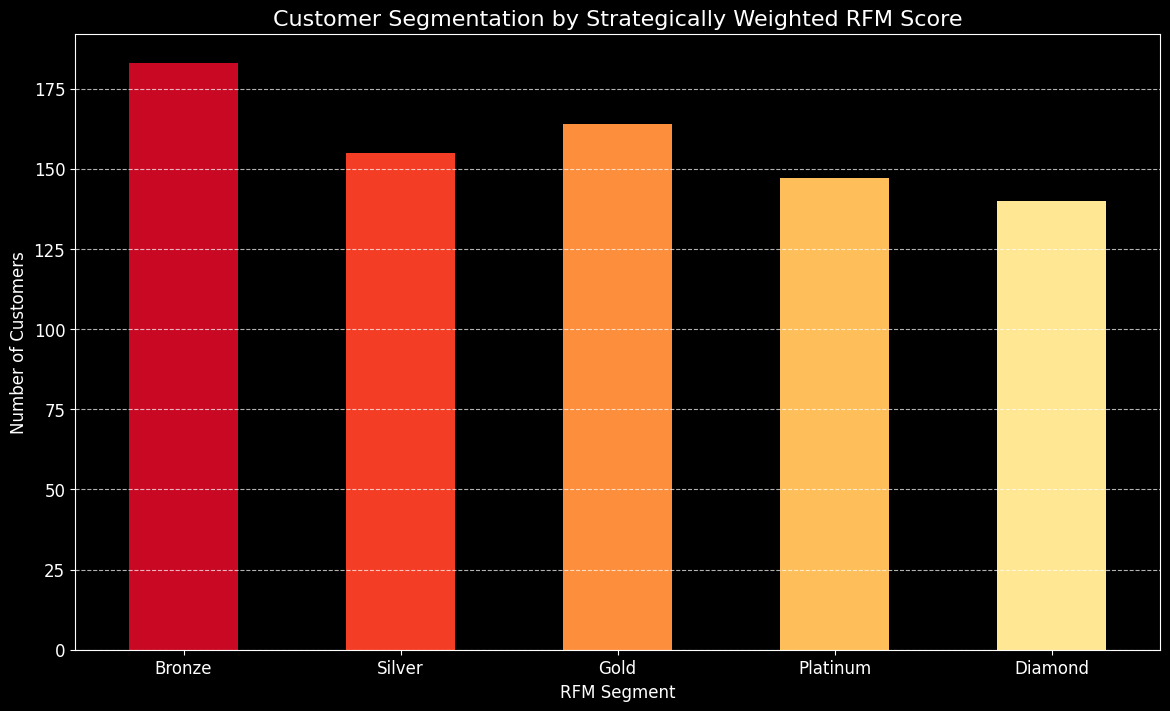


--- Weighted RFM Score Segments ---
RFM_Segment
Bronze      183
Silver      155
Gold        164
Platinum    147
Diamond     140
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(14, 8))
segment_counts = rfm_data['RFM_Segment'].value_counts().reindex(['Bronze', 'Silver', 'Gold', 'Platinum','Diamond'])
segment_counts.plot(kind='bar', color=sns.color_palette('YlOrRd_r', len(segment_counts)))
plt.title('Customer Segmentation by Strategically Weighted RFM Score', fontsize=16)
plt.xlabel('RFM Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



print("\n--- Weighted RFM Score Segments ---")
print(segment_counts)

In [ ]:
data = data.merge(rfm_data[['RFM_Segment']], on='Customer ID', how='left')
print("\nRFM Segment merged back into the main DataFrame:")



RFM Segment merged back into the main DataFrame:


In [ ]:
data.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
2       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
3       6  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
4       7  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   

     Segment        Country             City       State  ... Total Discount  \
0   Consumer  United States        Henderson    Kentucky  ...          0.000   
1  Corporate  United States      Los Angeles  California  ...          0.000   
2   Consumer  United States  Fort Lauderdale     Florida  ...         11.184   
3   Consumer  United States      Los Angeles  California  ...          0.000   
4   Consumer  United States      Los Angeles  California  ...          0.000   

  Shipping Urgency Days Since Last Order Customer_Total_Sales  \
0           Urgent                 390.0            3549.6600   
1         Standard                   NaN            6156.8940   
2         Standard                   0.0           10343.1775   
3         Standard                   NaN           36995.1770   
4         Standard                   0.0           36995.1770   

  Customer_Total_Quantity Customer_Total_Profit  Customer_Avg_Discount  \
0                      14              176.5900               0.200000   
1                      28            -2561.4590               0.172222   
2                      52             -821.6332               0.136667   
3                      97             4616.3016               0.183333   
4                      97             4616.3016               0.183333   

   Customer Sales Quintile  Customer Profit Quintile  RFM_Segment  
0                        1                         2       Bronze  
1                        2                         1         Gold  
2                        3                         1     Platinum  
3                        5                         5      Diamond  
4                        5                         5      Diamond  

[5 rows x 36 columns]



### **Outlier and Customer Segmentation Summary**

**Actions Taken:**
We handled outliers and segmented the data on the basis of customer total sales and profit.

**1. Outlier Detection and Handling:**
*   **Action:** A function was built and applied to remove outliers from the `Sales Price` and `Profit` columns using the **3 * IQR** rule.
*   **Impact:** A total of **1,550 rows** were removed.

**2. Customer Quintile Segmentation:**
*   **Action:** Customers were segmented into quintiles based on their lifetime `Customer_Total_Sales` and `Customer_Total_Profit`. This converted continuous numerical data into meaningful categorical ranks (1=Lowest, 5=Highest).

**3. Cross-Grid Analysis & Key Insights:**
*   **Action:** A cross-tabulation grid was created to analyze the intersection of sales and profit quintiles.
*   **Key Insight 1: High Volume - High Profit Customers:** The bottom-right cell (`Sales: 5`, `Profit: 5`) shows **1,082** orders from customers who are in the top 20% for both sales and profitability. This is a very strong and healthy core customer base.
*   **Key Insight 2: High Volume - Low Profit Customers:** The bottom-left cells (`Sales: 4/5`, `Profit: 1`) shows **571** orders from customers who generate high sales but are in the lowest tier for profitability. **This is a critical business insight.** These are customers who purchase frequently but probably only on heavy discounts.
*   **Key Insight 3: Low Volume - Low Profit Customers:** The top-left quadrant (e.g., `Sales: 1/2`, `Profit: 1/2`) contains a large number of customers who contribute little to sales or profit.
*   **Key Insight 4: Niche Customers ( Low Volume / High Profit ):** The right-most column (Profit: 5) shows a healthy number of orders in the middle-to-high sales quintiles (Rows 3, 4, 5). These are customers who, regardless of volume, are highly profitable and should be nurtured.
*   **Key Insight 5: Loyalists & Potential High Rollers:** A significant cluster of highly valuable customers exists in the upper-middle tiers. The intersection of `Sales Quintiles 3 & 4` with `Profit Quintiles 4 & 5` accounts for over **1800**
 orders. This segment represents a stable, profitable core customer base that should be nurtured and targeted with up-sell campaigns to elevate them to Most Valuable Customer status.

 I then used weighted RFM to further categorise on the basis of behaviour.  By deliberately giving less weight to Monetary value, I can now differentiate between a healthy loyal customer and a problematic discount-seeker.

Here is how I reconcile the findings from my two models:

| **Customer Profile (from Quintile Analysis)** | **Likely Weighted RFM Segment & My Strategic Action** |
| :--- | :--- |
| **High Sales / High Profit** | **Diamond or Platinum.** These customers are the real deal. They spend a lot, and they do it recently and frequently. **Action:** Retain them with a VIP program and encourage advocacy. |
| **High Sales / Low Profit (The Problem Segment)** | **Silver or Gold.** This is the key insight. Because I down-weighted Monetary value, their high spending doesn't automatically make them a top-tier customer. Their likely lower Recency and Frequency scores correctly place them in the middle tiers. **Action:** Monitor them. Avoid offering deep discounts. Nurture them toward more profitable, frequent purchasing behavior. |
| **Low Sales / High Profit (Niche Loyalists)** | **Gold or Platinum.** These customers may not spend a lot in single transactions, but their high profitability comes from loyal, frequent purchases (high R & F scores). My model correctly identifies them as highly valuable. **Action:** Nurture them and find opportunities to increase their average order value with bundles. |
| **Low Sales / Low Profit** | **Bronze.** These customers contribute little in value and are not engaged. My model correctly places them at the bottom. **Action:** Minimal investment. Keep them on the general newsletter but exclude them from targeted, costly campaigns. |



In [ ]:

data['Acquisition_Date'] = data.groupby('Customer ID')['Order Date'].transform('min')
data['Acquisition_Month'] = data['Acquisition_Date'].dt.to_period('M')
data['Order_Month'] = data['Order Date'].dt.to_period('M')


data['Customer_Type'] = np.where(data['Order_Month'] == data['Acquisition_Month'], 'New', 'Existing')

data.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
2       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
3       6  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
4       7  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   

     Segment        Country             City       State  ...  \
0   Consumer  United States        Henderson    Kentucky  ...   
1  Corporate  United States      Los Angeles  California  ...   
2   Consumer  United States  Fort Lauderdale     Florida  ...   
3   Consumer  United States      Los Angeles  California  ...   
4   Consumer  United States      Los Angeles  California  ...   

  Customer_Total_Quantity Customer_Total_Profit Customer_Avg_Discount  \
0                      14              176.5900              0.200000   
1                      28            -2561.4590              0.172222   
2                      52             -821.6332              0.136667   
3                      97             4616.3016              0.183333   
4                      97             4616.3016              0.183333   

  Customer Sales Quintile Customer Profit Quintile RFM_Segment  \
0                       1                        2      Bronze   
1                       2                        1        Gold   
2                       3                        1    Platinum   
3                       5                        5     Diamond   
4                       5                        5     Diamond   

   Acquisition_Date  Acquisition_Month  Order_Month  Customer_Type  
0        2015-10-15            2015-10      2016-11       Existing  
1        2016-06-12            2016-06      2016-06            New  
2        2015-10-11            2015-10      2015-10            New  
3        2014-06-09            2014-06      2014-06            New  
4        2014-06-09            2014-06      2014-06            New  

[5 rows x 40 columns]

In [ ]:

filtered_data_for_plot = data[(data['Order Date'].dt.year >= start_year) & (data['Order Date'].dt.year <= end_year)].copy()

revenue_by_type_filtered = filtered_data_for_plot.groupby(['Order_Month', 'Customer_Type'])['Total Sales'].sum().unstack().fillna(0)

revenue_by_type_filtered.head()

Customer_Type  Existing        New
Order_Month                       
2014-01           0.000  23741.543
2014-02        1244.152   7304.986
2014-03        1572.440  46432.046
2014-04        5100.688  32562.443
2014-05        5096.708  25831.113

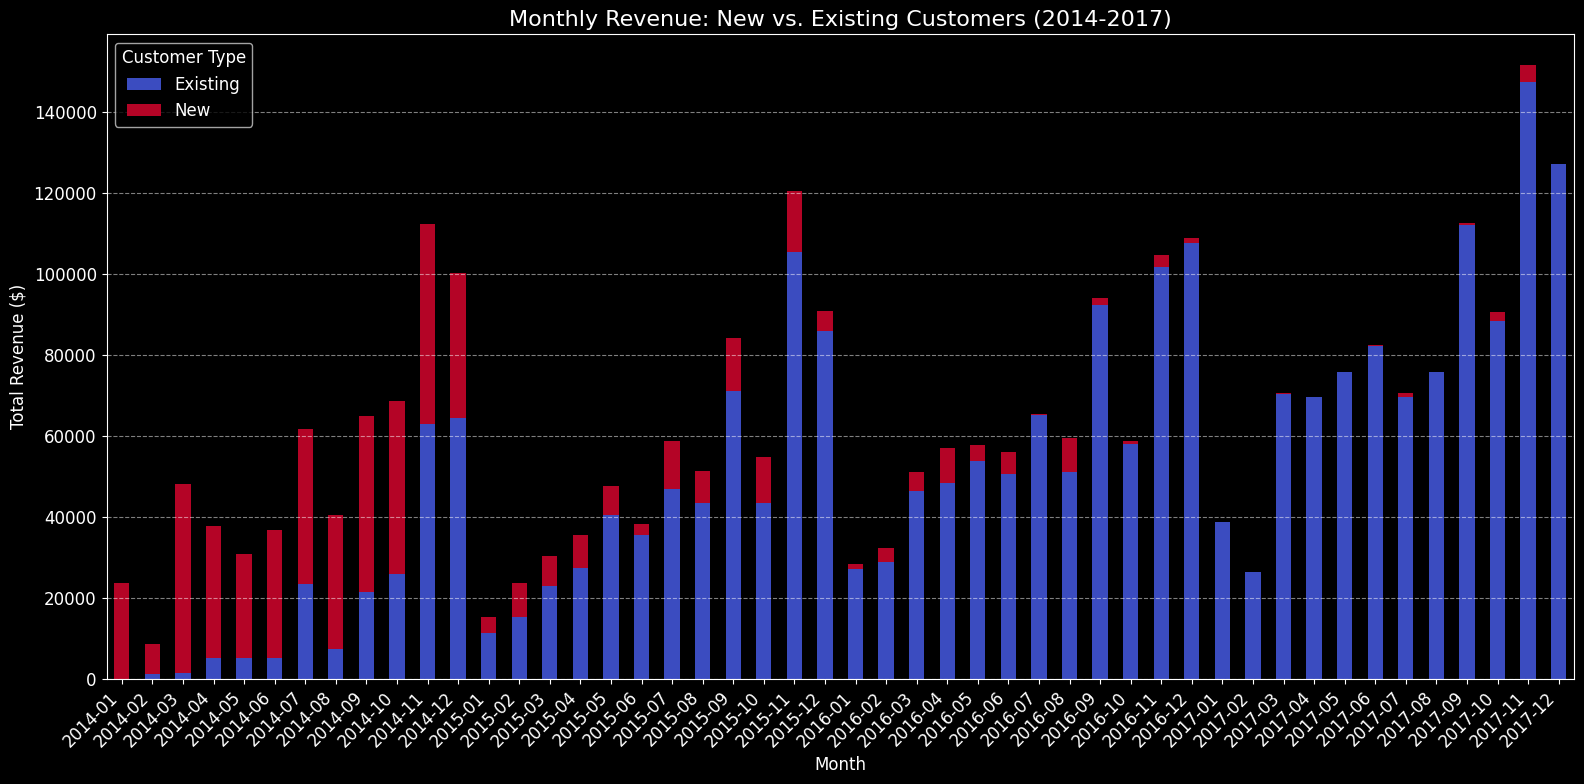

In [ ]:
revenue_by_type_filtered.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='coolwarm')

plt.title(f'Monthly Revenue: New vs. Existing Customers ({start_year}-{end_year})', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Analysis :
The data shows a distinct shift in the source of revenue over time. The business model began with a heavy reliance on new customer acquisition. Over the four-year period, it successfully transitioned to a model where the primary driver of revenue became repeat purchases from its established customer base.
This tells me there is a strong retention and majority of revenue currently is from repeat customers. Therefore, any future analysis on customer value should be related to customer loyalty and purchase frequency, as this is a confirmed pattern in the dataset. Hence the RFM analysis is vindicated as well and marketing should focus on the core profit making group.

# 2. Final Analysis and Dashboard **Creation**

## 2.1. Sales and Profit Analysis

In [ ]:
data['Product Name'].nunique()

1718

In [ ]:
profit_df = data.groupby('Product Name')['Total Profit'].sum().sort_values(ascending=False)

profit_df.head(10)

Product Name
Easy-staple paper                                               3957.5152
Staple envelope                                                 2912.5878
Memorex Mini Travel Drive 16 GB USB 2.0 Flash Drive             2534.9181
Microsoft Sculpt Comfort Mouse                                  2408.1860
Avery 485                                                       2326.1945
Xerox 1988                                                      2092.6990
Hunt PowerHouse Electric Pencil Sharpener, Blue                 1936.9800
Imation�Secure+ Hardware Encrypted USB 2.0�Flash Drive; 16GB    1926.9360
Logitech G602 Wireless Gaming Mouse                             1910.1612
Xerox 191                                                       1870.3278
Name: Total Profit, dtype: float64

In [ ]:
def truncate_label(label, max_len=40):
    if len(label) > max_len:
        return label[:max_len] + '...'
    return label

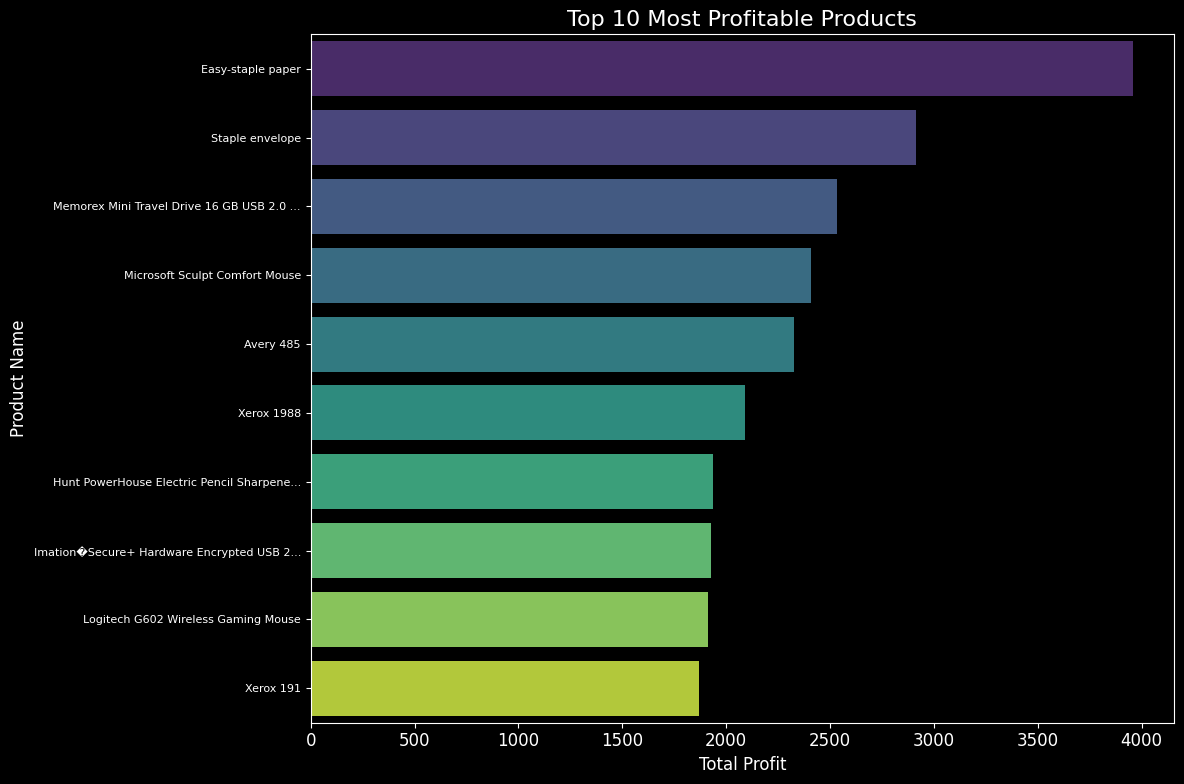

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=profit_df.head(10).values, y=profit_df.head(10).index.map(truncate_label), palette='viridis')
plt.title('Top 10 Most Profitable Products', fontsize=16)
plt.xlabel('Total Profit', fontsize=12)
plt.yticks(fontsize=8)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
loss_df = data.groupby('Product Name')['Total Profit'].sum().sort_values(ascending=True)
loss_df.head(10)


Product Name
Premier Elliptical Ring Binder, Black                  -850.4936
Global Deluxe Steno Chair                              -704.3670
Belkin 19" Vented Equipment Shelf, Black               -694.4652
Avery Recycled Flexi-View Covers for Binding Systems   -660.1154
Acco D-Ring Binder w/DublLock                          -574.0530
Global Deluxe High-Back Office Chair in Storm          -538.5204
Lock-Up Easel 'Spel-Binder'                            -517.8195
Office Star Flex Back Scooter Chair with White Frame   -508.2884
Carina Media Storage Towers in Natural & Black         -507.3536
Sauder Cornerstone Collection Library                  -462.2216
Name: Total Profit, dtype: float64

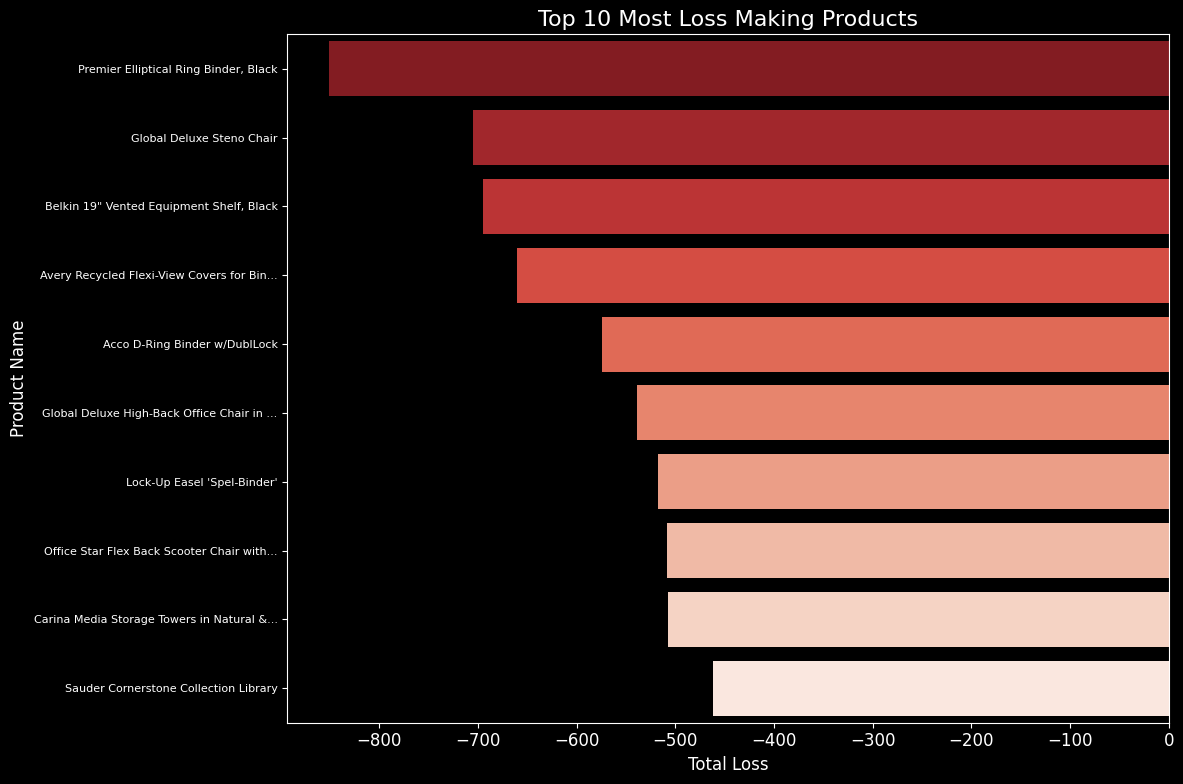

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=loss_df.head(10).values, y=loss_df.head(10).index.map(truncate_label), palette='Reds_r')
plt.title('Top 10 Most Loss Making Products', fontsize=16)
plt.xlabel('Total Loss', fontsize=12)
plt.yticks(fontsize=8)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()

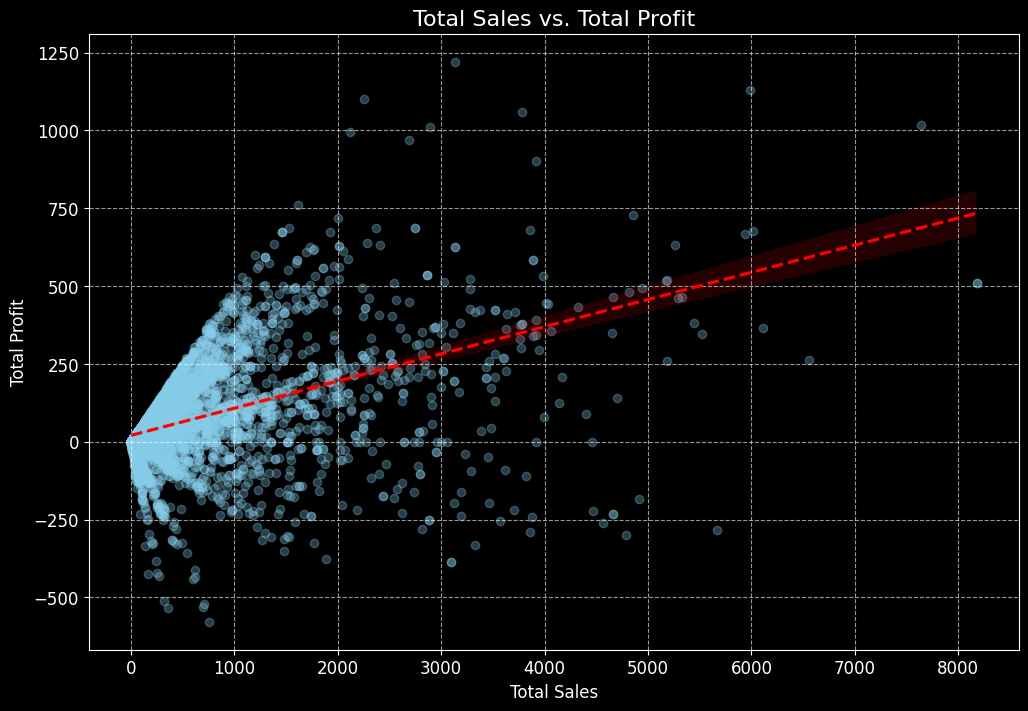

In [ ]:
plt.figure(figsize=(12, 8))
sns.regplot(x='Total Sales', y='Total Profit', data=data,scatter_kws={'alpha':0.3, 'color':'skyblue'}, line_kws={'color':'red', 'linestyle':'--'})

plt.title('Total Sales vs. Total Profit', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


--- Generating Chart: Joint Distribution of Sales and Profit ---


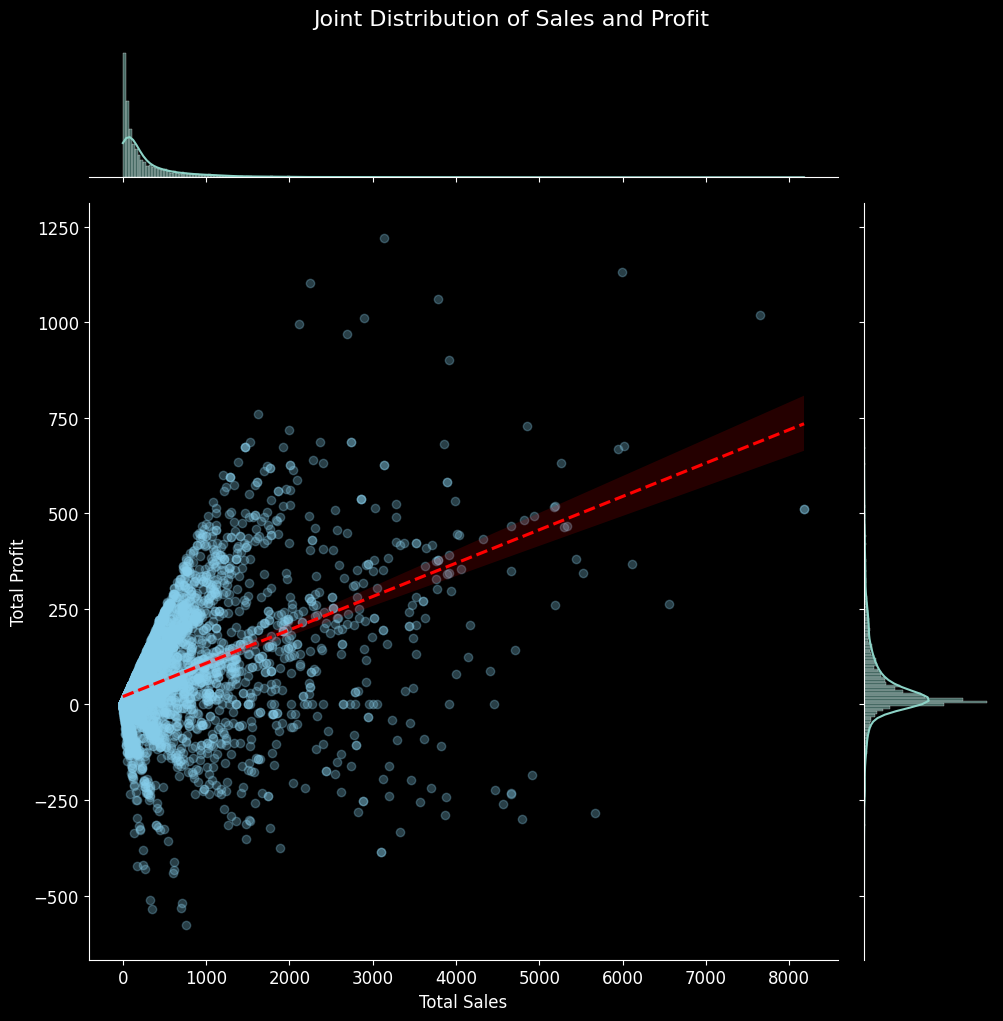

In [ ]:
print("\n--- Generating Chart: Joint Distribution of Sales and Profit ---")
j = sns.jointplot(x='Total Sales', y='Total Profit', data=data,
                  kind='reg',
                  height=10,
                  scatter_kws={'alpha':0.3, 'color':'skyblue'},
                  line_kws={'color':'red', 'linestyle':'--'})


j.fig.suptitle('Joint Distribution of Sales and Profit', fontsize=16, y=1.02)

plt.show()

In [ ]:

total_positive_profit = profit_df[profit_df > 0].sum()
total_negative_profit = loss_df[loss_df < 0].sum()

profit_from_top_10 = profit_df.head(10).sum()

loss_from_top_10 = loss_df.head(10).sum()

percentage_profit_from_top_10 = (profit_from_top_10 / total_positive_profit) * 100
percentage_loss_from_top_10 = (loss_from_top_10 / total_negative_profit) * 100

print(f"Total Positive Profit from all products: {total_positive_profit:,.2f}")
print(f"Profit from Top 10 Products: {profit_from_top_10:,.2f}")
print(f"The Top 10 most profitable products account for {percentage_profit_from_top_10:.2f}% of the total positive profit.\n")

print(f"Total Loss from all products: {total_negative_profit:,.2f}")
print(f"Loss from Top 10 Products: {loss_from_top_10:,.2f}")
print(f"The Top 10 most loss-making products account for {percentage_loss_from_top_10:.2f}% of the total loss.")

Total Positive Profit from all products: 471,734.33
Profit from Top 10 Products: 23,876.51
The Top 10 most profitable products account for 5.06% of the total positive profit.

Total Loss from all products: -31,986.16
Loss from Top 10 Products: -6,017.70
The Top 10 most loss-making products account for 18.81% of the total loss.


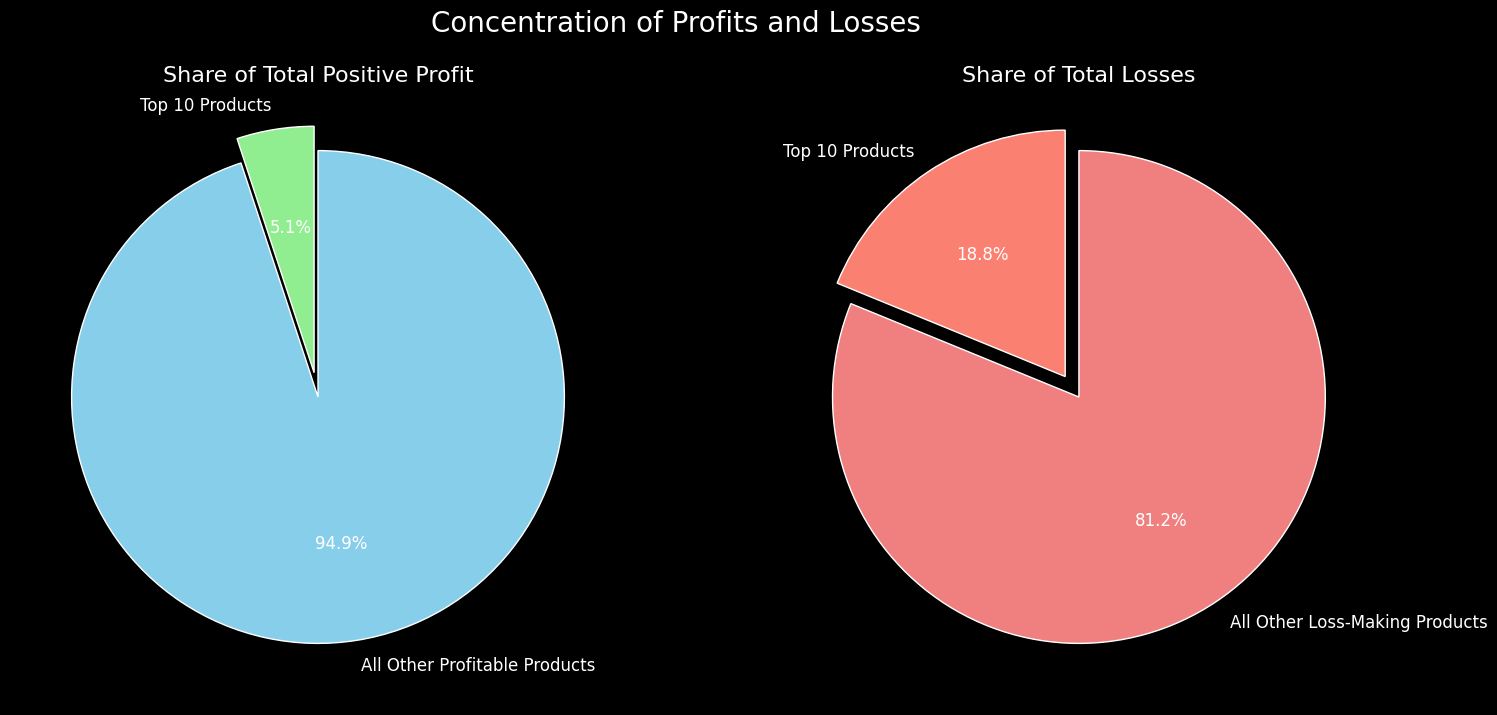

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Concentration of Profits and Losses', fontsize=20)

profit_slices = [profit_from_top_10, total_positive_profit - profit_from_top_10]
profit_labels = ['Top 10 Products', 'All Other Profitable Products']
profit_explode = (0.1, 0) # "Explode" the 1st slice (Top 10) for emphasis

axes[0].pie(profit_slices, labels=profit_labels, autopct='%1.1f%%',
            startangle=90, colors=['lightgreen', 'skyblue'], explode=profit_explode,
            wedgeprops={'edgecolor': 'white'})
axes[0].set_title('Share of Total Positive Profit', fontsize=16)

loss_slices = [abs(loss_from_top_10), abs(total_negative_profit - loss_from_top_10)]
loss_labels = ['Top 10 Products', 'All Other Loss-Making Products']
loss_explode = (0.1, 0) # "Explode" the 1st slice (Top 10) for emphasis

axes[1].pie(loss_slices, labels=loss_labels, autopct='%1.1f%%',
            startangle=90, colors=['salmon', 'lightcoral'], explode=loss_explode,
            wedgeprops={'edgecolor': 'white'})
axes[1].set_title('Share of Total Losses', fontsize=16)

plt.gca().set_aspect('equal')
plt.show()

### **Sales and Profit Analysis - Technical Summary**

**Key Findings:**

**1. Profit and Loss Concentration:**
*   **Profit Distribution:** Analysis of product-level profit indicates low concentration. The top 10 products by profit contribute only **5.1%** to the total positive profit, suggesting a well-diversified and resilient profit base across the product portfolio.
*   **Loss Concentration:** In contrast, losses are highly concentrated. The top 10 loss-making products account for **18.8%** of the total loss, identifying a small subset of products as primary drivers of financial loss.

**2. Insight from the Top Histogram (Sales Distribution):**
Observation: The histogram for Total Sales is massively skewed to the left, with a very long, thin tail to the right. The distribution looks like a steep cliff.
Insight: The company runs on a massive volume of low-value sales. The "long tail" represents the few, rare high-value sales.

**3. Insight from the Right-Side Histogram (Profit Distribution):**
Observation: The histogram for Total Profit is roughly bell-shaped but centered very close to zero. We can see a clear "negative" part of the bell to the left of the zero line.
Insight: This shows that a "typical" or "average" transaction is only marginally profitable. More importantly, it shows that generating a loss is not a rare event; it's a significant and common part of the overall business, as shown by the substantial area under the curve in the negative profit zone.

**4. Correlation and Variance Analysis:**

The scatter plot reveals four key characteristics of the business's transactional health:
* Positive Correlation: There is a clear positive trend, confirming that higher sales generally result in higher profits, which validates the basic business model.
* High-Volume, Low-Value Core: The vast majority of transactions are clustered in a dense cloud of low-value sales (under ~$1,500), representing the high-volume core of the business.
* Increased Risk with Higher Sales: The variance in profit increases significantly with sales value . This indicates that while big-ticket items can be highly profitable, they also carry a much higher risk of resulting in substantial losses.
* Systemic Unprofitable Sales: A significant number of transactions populate the "problem quadrant" (positive sales, negative profit), providing direct visual evidence of margin erosion on sales, which is likely attributable to the aggressive discount strategies.

**Conclusion:**
The dataset exhibits characteristics of a high-volume, low-margin business. While overall profit is positively correlated with sales, it is undermined by systemic losses driven by a concentrated set of products and increasing profit variance at higher sales values. The primary opportunity for financial improvement lies in addressing the specific drivers of loss in the top 10 underperforming products and managing the risk associated with high-value transactions.

## 2.2. Customer Segmentation and Analysis

In [ ]:
sales_profit_pivot = pd.pivot_table(
    data,
    values=['Total Sales', 'Total Profit'],
    index=['Segment', 'Category'],
    aggfunc='sum'
)

sorted_pivot = sales_profit_pivot.sort_values(by='Total Profit', ascending=False)


print("\nPivot Table of Total Sales and Profit (Sorted by Profit):")
print(sorted_pivot)



Pivot Table of Total Sales and Profit (Sorted by Profit):
                             Total Profit  Total Sales
Segment     Category                                  
Consumer    Office Supplies   134103.3146  668008.3340
Corporate   Office Supplies    73572.4899  385666.2100
Consumer    Technology         60686.4180  465721.6500
Home Office Office Supplies    48404.0553  223410.8440
Consumer    Furniture          38650.2918  502812.3847
Corporate   Technology         32810.6733  226294.1560
            Furniture          20398.0136  292130.0273
Home Office Technology         20285.7591  148217.5970
            Furniture          10837.1600  142881.0980


In [ ]:
# profit to sales ratio
sorted_pivot['Profit to Sales Ratio'] = sorted_pivot['Total Profit'] / sorted_pivot['Total Sales']

print("\nPivot Table of Profit to Sales Ratio:")



Pivot Table of Profit to Sales Ratio:


In [ ]:
print(sorted_pivot)

                             Total Profit  Total Sales  Profit to Sales Ratio
Segment     Category                                                         
Consumer    Office Supplies   134103.3146  668008.3340               0.200751
Corporate   Office Supplies    73572.4899  385666.2100               0.190767
Consumer    Technology         60686.4180  465721.6500               0.130306
Home Office Office Supplies    48404.0553  223410.8440               0.216659
Consumer    Furniture          38650.2918  502812.3847               0.076868
Corporate   Technology         32810.6733  226294.1560               0.144991
            Furniture          20398.0136  292130.0273               0.069825
Home Office Technology         20285.7591  148217.5970               0.136865
            Furniture          10837.1600  142881.0980               0.075847


--- Average Financials per Product Category ---
                 Median_Sales_Price  Mean_Sales_Price  Median_Total_Profit  \
Category                                                                     
Furniture                    101.46            162.62                19.93   
Office Supplies               23.58             54.28                18.88   
Technology                   104.88            155.09                42.84   

                 Mean_Total_Profit  
Category                            
Furniture                    44.29  
Office Supplies              46.51  
Technology                   83.48  

--- Visualizing Financial Distributions by Category ---


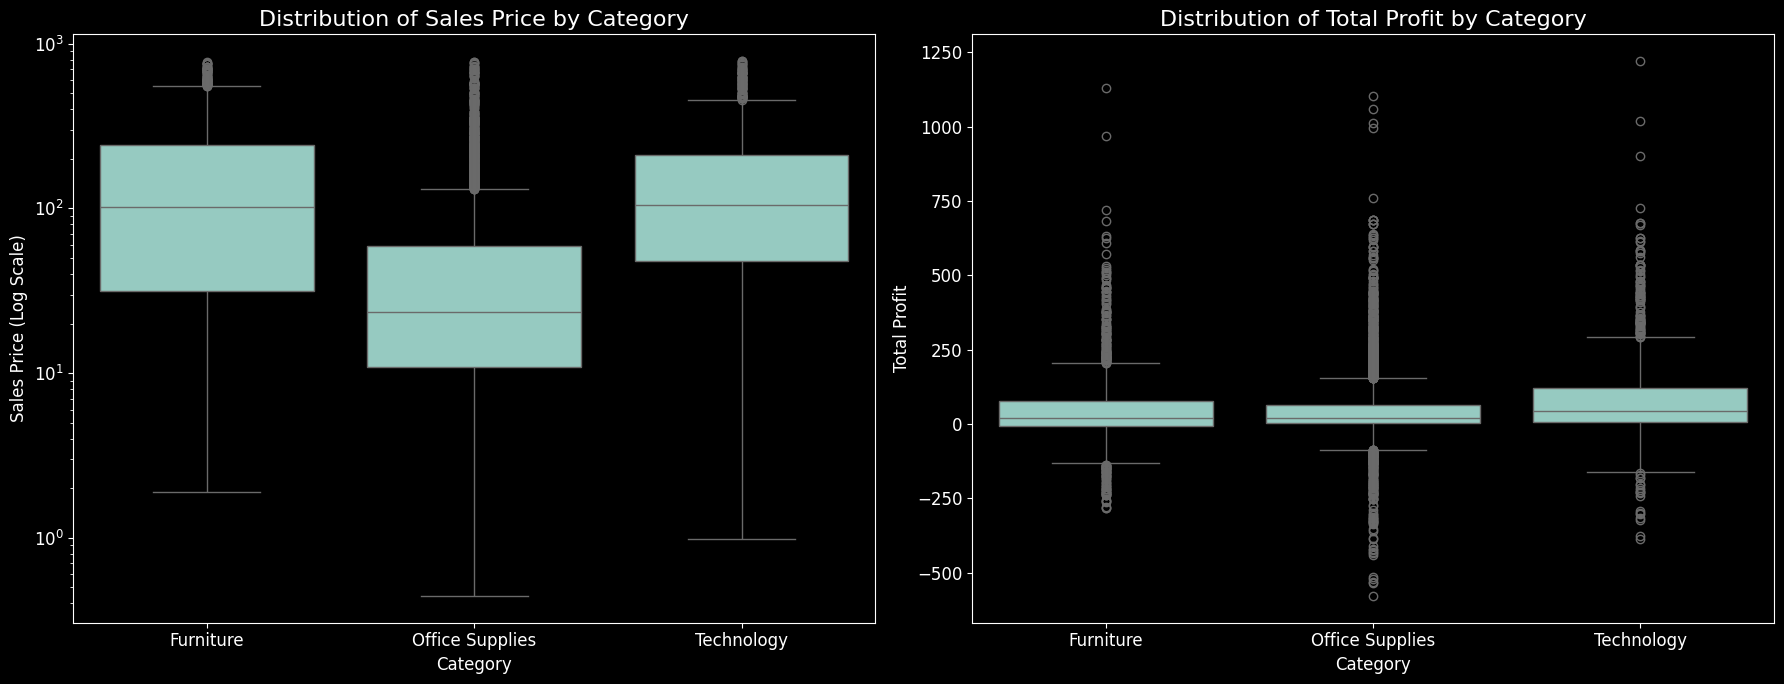

In [ ]:

print("--- Average Financials per Product Category ---")
category_financials = data.groupby('Category').agg(
    Median_Sales_Price=('Sales Price', 'median'),
    Mean_Sales_Price=('Sales Price', 'mean'),
    Median_Total_Profit=('Total Profit', 'median'),
    Mean_Total_Profit=('Total Profit', 'mean')
).round(2)

print(category_financials)

print("\n--- Visualizing Financial Distributions by Category ---")
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.boxplot(x='Category', y='Sales Price', data=data, ax=axes[0])
axes[0].set_title('Distribution of Sales Price by Category', fontsize=16)
axes[0].set_yscale('log')
axes[0].set_ylabel('Sales Price (Log Scale)')

sns.boxplot(x='Category', y='Total Profit', data=data, ax=axes[1])
axes[1].set_title('Distribution of Total Profit by Category', fontsize=16)

plt.tight_layout()
plt.show()

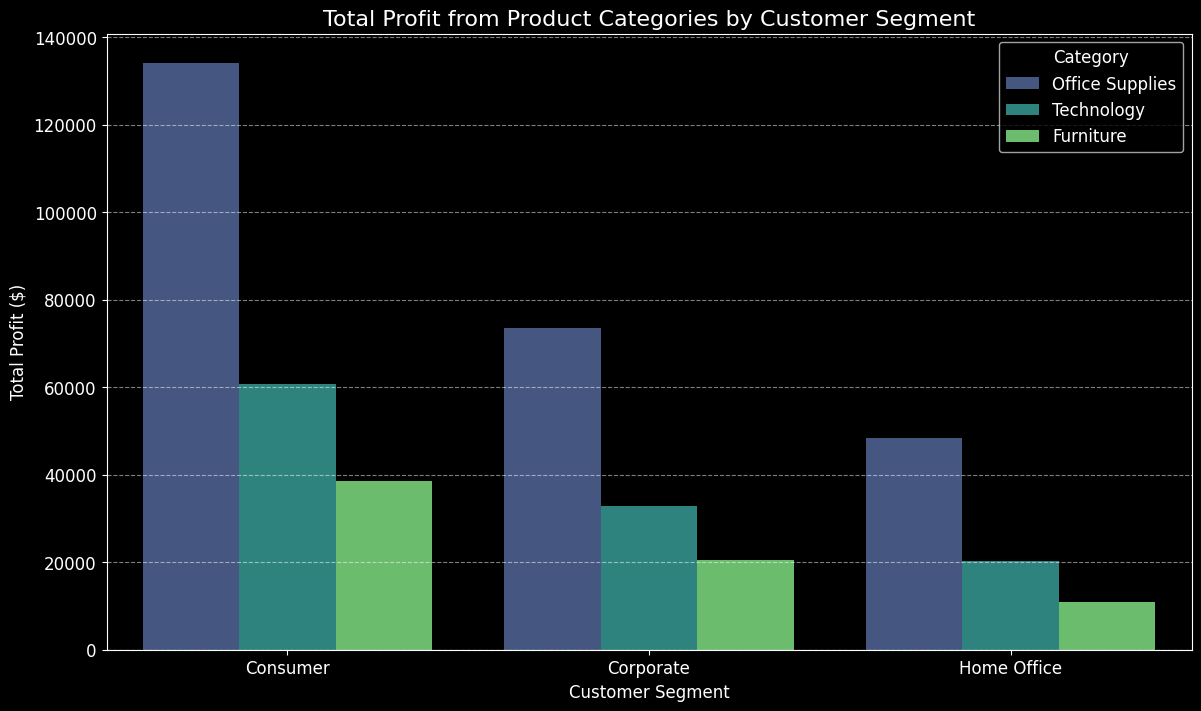

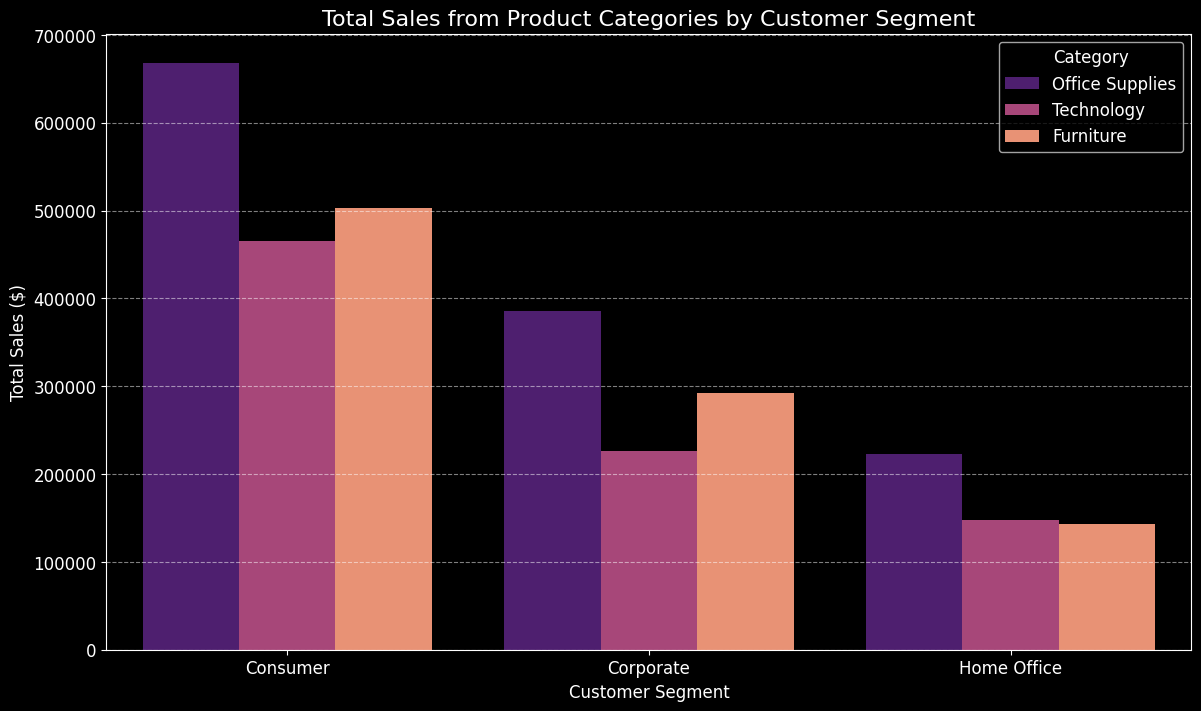

In [ ]:
plot_data_pivot = sorted_pivot.reset_index()

#grouped bar chart for total profit
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Segment',
    y='Total Profit',
    hue='Category',
    data=plot_data_pivot,
    palette='viridis'
)
plt.title('Total Profit from Product Categories by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.axhline(0, color='white', linewidth=0.8, linestyle='--')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


#grouped bar chart for total sales
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Segment',
    y='Total Sales',
    hue='Category',
    data=plot_data_pivot,
    palette='magma'
)
plt.title('Total Sales from Product Categories by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Of course. Here is the enhanced summary. It maintains your concise structure while injecting the verified financial data (`Median_Sales_Price`) to make the insights more robust and data-driven.

---

### **Customer Segmentation and Analysis - Final Summary**

**Action Taken:**
A pivot table was generated to analyze `Total Sales`, `Total Profit`, and the **`Profit-to-Sales Ratio`** (Profit Margin) for each combination of `Customer Segment` and `Product Category`. This provides a deep understanding of both the scale and the efficiency of each business unit.

**Key Findings:**

**1. Most Profitable vs. Most Efficient Unit:**
*   The **Consumer segment buying Office Supplies** is the primary engine of absolute profit ($134k).
*   However, the **Home Office segment buying Office Supplies** is the most *efficient* unit, posting the highest profit margin in the company at **21.7%**.

**2. Quantified Inefficiency of Furniture:**
*   Despite a high median price point (`$101.46`), **Furniture is the least efficient category**, with profit margins of only **7.0-7.7%**. It is a high-risk category that consumes significant sales revenue for minimal profit return.

**3. Data-Driven Strategic Role of Each Category:**
*   **Office Supplies:** The **High-Efficiency Driver**. With a low median price (`$23.58`) but the highest margins (`~20-22%`), this category's role is to generate consistent, reliable profit through high sales volume.
*   **Technology:** The **Absolute Profit Driver**. With a high median price (`$104.88`) and moderate margins (`~13-14.5%`), its role is to convert high-value sales into significant dollar-value profits.
*   **Furniture:** The **Inefficient Revenue Driver**. With a high median price (`$101.46`) but the lowest margins (`~7-8%`), this category currently acts as a "profit drain," driving revenue without proportional profit.

**Strategic Conclusion:**
The company's financial health is built on the efficiency of its Office Supplies business. A clear, multi-pronged strategy emerges:
1.  **Protect the Core:** Maintain dominance in the high-efficiency, high-volume Office Supplies market.
2.  **Drive Absolute Growth:** Leverage Technology's high price point to generate large dollar-value profits.
3.  **Address Inefficiency:** Urgently re-evaluate the Furniture category's strategy to fix its poor margin performance.

## 2.3. Shipping and Delivery Analysis

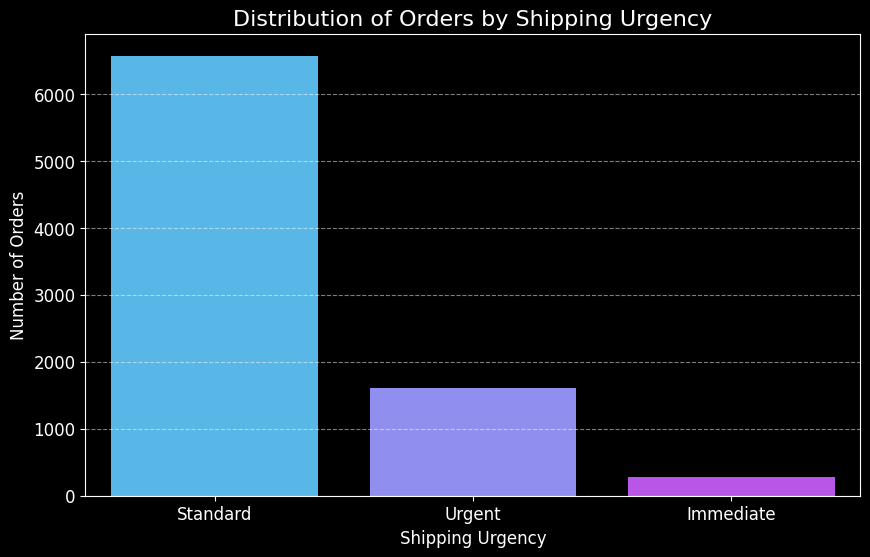

In [ ]:


plt.figure(figsize=(10, 6))
sns.countplot(x='Shipping Urgency', data=data, palette='cool',
              order=data['Shipping Urgency'].value_counts().index)

plt.title('Distribution of Orders by Shipping Urgency', fontsize=16)
plt.xlabel('Shipping Urgency', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


--- Generating Chart: Profit Distribution by Shipping Urgency ---


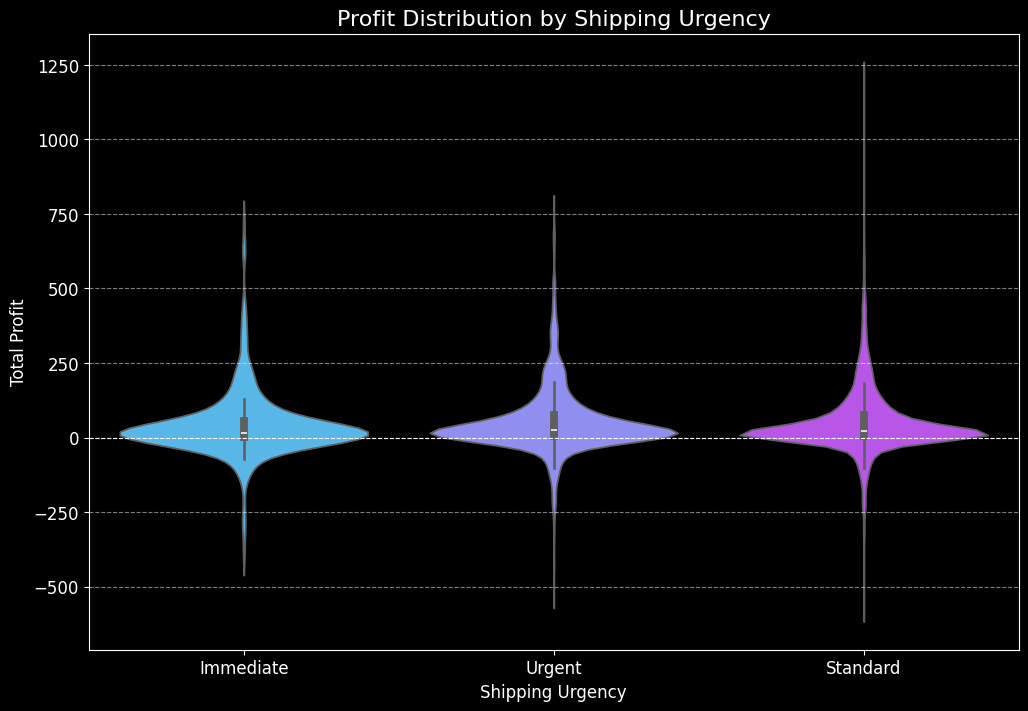

In [ ]:
print("\n--- Generating Chart: Profit Distribution by Shipping Urgency ---")

plt.figure(figsize=(12, 8))
sns.violinplot(x='Shipping Urgency', y='Total Profit', data=data, palette='cool',
               order=['Immediate', 'Urgent', 'Standard'])

plt.title('Profit Distribution by Shipping Urgency', fontsize=16)
plt.xlabel('Shipping Urgency', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.axhline(0, color='white', linewidth=0.8, linestyle='--') # Zero-profit line
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


### **Analysis of Shipping Urgency and Profitability**

**1. Order Distribution:** The bar chart shows the distribution of orders is heavily dominated by the "Standard" shipping category. "Urgent" is the second most common, while "Immediate" (Same Day) shipping represents a very small fraction of total orders.

**2. Profitability Distribution:**
*   **Observation:** The violin plots for all three `Shipping Urgency` categories are very similar in shape and position.
    *   The **median profit** is nearly identical and sits slightly above zero for all three categories.
    *   The **interquartile range** (the main box) is also consistent across the three, indicating a similar spread of profit for the bulk of orders (the middle 50%).
    *   All three categories exhibit long tails into both profit and loss, with the "Standard" category having the longest tails.
*   **Insight:** There is **no evidence of a significant correlation between shipping urgency and profitability**. Faster or slower shipping does not have an impact on the median profit of an order.

**Conclusion:**
The company's choice of shipping method appears to be profit-neutral. While most orders use "Standard" shipping, there is no financial penalty or benefit associated with faster "Urgent" or "Immediate" shipping on a per-order basis. This suggests the current shipping strategy is not a key area of concern for profitability.

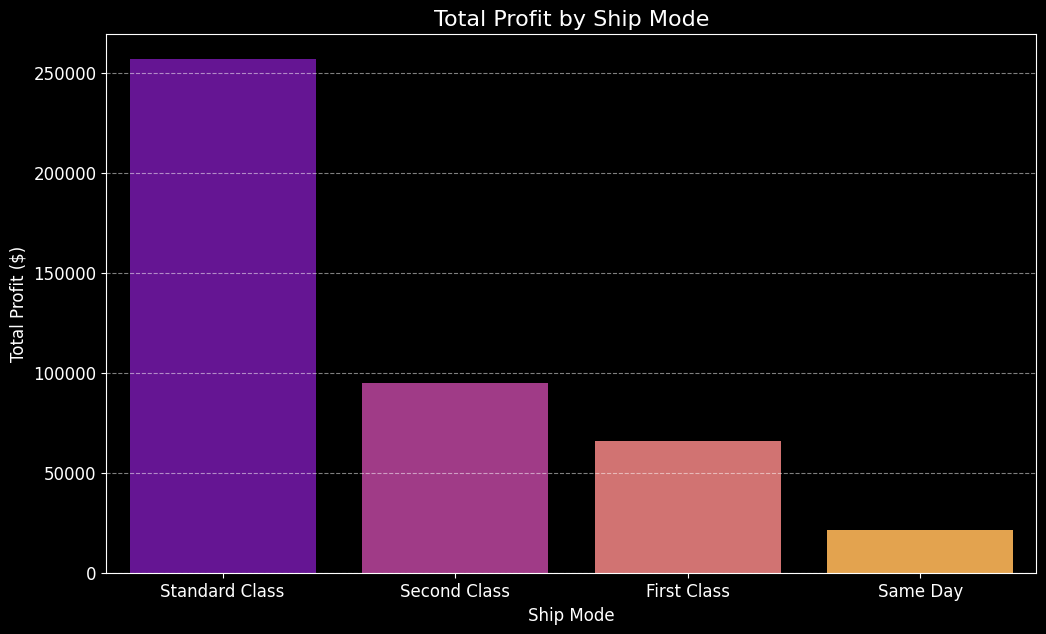

In [ ]:
ship_mode_profit = data.dropna(subset=['Ship Mode']).groupby('Ship Mode')['Total Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=ship_mode_profit.index, y=ship_mode_profit.values, palette='plasma')

plt.title('Total Profit by Ship Mode', fontsize=16)
plt.xlabel('Ship Mode', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [ ]:
regional_shipping_pivot = pd.pivot_table(
    data.dropna(subset=['Ship Mode']),
    index=['Region', 'Ship Mode'],
    values=['Order ID', 'Total Sales', 'Total Profit'],
    aggfunc={
        'Order ID': 'nunique',
        'Total Sales': 'sum',
        'Total Profit': 'sum'
    }
)
regional_shipping_pivot['ProfitMargin'] = regional_shipping_pivot['Total Profit'] / regional_shipping_pivot['Total Sales']
regional_shipping_pivot['ProfitPerOrder'] = regional_shipping_pivot['Total Profit'] / regional_shipping_pivot['Order ID']
regional_shipping_pivot.rename(columns={'Order ID': 'Number of Unique Orders'}, inplace=True)

regional_shipping_pivot.sort_index(inplace=True)


print(regional_shipping_pivot)

most_profitable_region = regional_shipping_pivot['Total Profit'].idxmax()[0]
most_preferred_mode_in_region = regional_shipping_pivot.loc[most_profitable_region]['Number of Unique Orders'].idxmax()

print(f"\nInsight: The most profitable region is '{most_profitable_region}'.")
print(f"Within the '{most_profitable_region}' region, the most preferred shipping mode (by order count) is '{most_preferred_mode_in_region}'.")

                        Number of Unique Orders  Total Profit  Total Sales  \
Region  Ship Mode                                                            
Central First Class                         158     8222.6100   89403.1370   
        Same Day                             55     2055.7689   23540.1100   
        Second Class                        202    16852.5542  132101.7794   
        Standard Class                      648    39110.2828  390535.5966   
East    First Class                         215    19168.8455  116119.5330   
        Same Day                             62     7268.7783   40048.3760   
        Second Class                        238    22132.2522  144495.9260   
        Standard Class                      754    67326.2311  440076.5450   
South   First Class                         118    11052.4524   67053.0240   
        Same Day                             33     3109.4035   22817.0410   
        Second Class                        150    17843.1964  1

### **Shipping and Regional Analysis Summary**

*   **Dominant Strategy:** "Standard Class" shipping is the most used and highest-grossing method in every single region, making it the company's primary logistical backbone.

*   **Most Valuable Region:** The **West** is the most valuable region, generating the highest total sales and total profit, primarily driven by its high volume of "Standard Class" orders.

*   **Most Profitable Combination:** The single most profitable shipping operation is **"Standard Class" in the West**, which alone contributes over $105,000 in profit.

*   **Most Profitable on a Per-Order Basis:** Despite lower volume, **"Second Class" shipping in the West** is the most profitable on a per-order basis, averaging **$128.75** profit per unique order, indicating high efficiency.

*   **Highest Profit Margin:** **"Same Day" shipping in the East** has the highest overall profit margin, converting **18.15%** of sales to profit, making it the most efficient, albeit smaller-scale, operation.

## 2.4. Regional Sales and Profitability

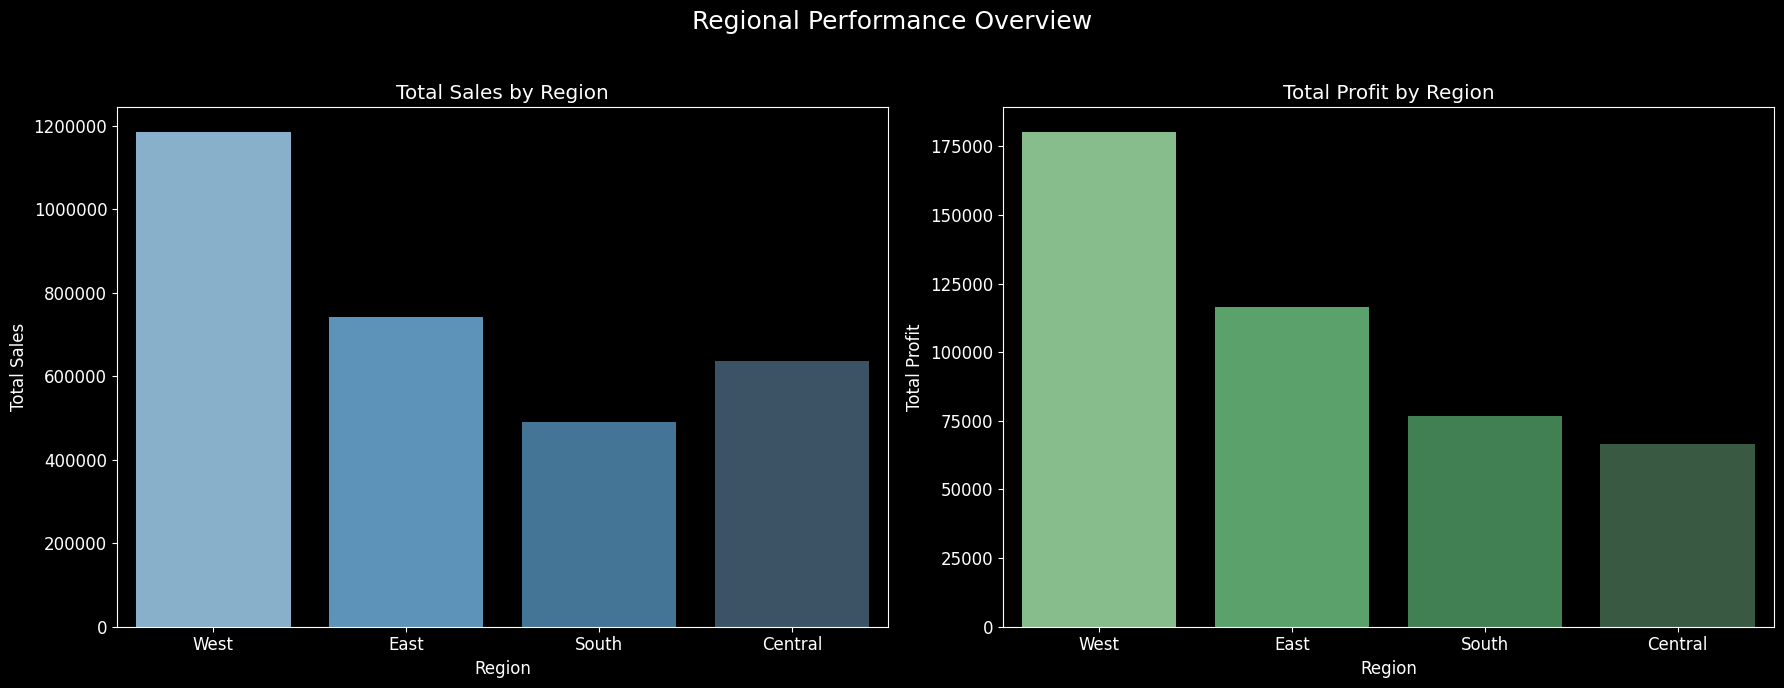

In [ ]:
region_performance = data.groupby('Region')[['Total Sales', 'Total Profit']].sum().sort_values(by='Total Profit', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Regional Performance Overview', fontsize=18)

sns.barplot(x=region_performance.index, y=region_performance['Total Sales'], ax=axes[0], palette='Blues_d')
axes[0].set_title('Total Sales by Region')
axes[0].set_ylabel('Total Sales')
axes[0].ticklabel_format(style='plain', axis='y') # Prevent scientific notation

sns.barplot(x=region_performance.index, y=region_performance['Total Profit'], ax=axes[1], palette='Greens_d')
axes[1].set_title('Total Profit by Region')
axes[1].set_ylabel('Total Profit')
axes[1].ticklabel_format(style='plain', axis='y') # Prevent scientific notation

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:

state_pivot = pd.pivot_table(
    data,
    values=['Total Sales', 'Total Profit'],
    index='State',
    aggfunc='sum'
)

state_pivot['Profit Margin'] = (state_pivot['Total Profit'] / state_pivot['Total Sales'])

sorted_state_pivot = state_pivot.sort_values(by='Total Profit', ascending=False)

top_5_states = sorted_state_pivot.head(5)
bottom_5_states = sorted_state_pivot.tail(5)

print("\n--- Top 5 Most Profitable States ---")
print(top_5_states)

print("\n--- Top 5 Least Profitable States ---")
print(bottom_5_states)


--- Top 5 Most Profitable States ---
            Total Profit  Total Sales  Profit Margin
State                                               
California   128170.8733   767666.013       0.166962
New York      67662.2633   307257.389       0.220214
Washington    30459.9519   178622.674       0.170527
Michigan      19104.3983    73444.153       0.260121
Virginia      16957.8746    67749.370       0.250303

--- Top 5 Least Profitable States ---
                      Total Profit  Total Sales  Profit Margin
State                                                         
South Dakota              597.9689      1770.79       0.337685
District of Columbia      380.1904       882.53       0.430796
North Dakota              285.7701       868.71       0.328959
West Virginia             207.9952       424.48       0.490000
Maine                     187.4676       635.04       0.295206


In [ ]:
print(f"Median profit margin: {state_pivot['Profit Margin'].median():.2%}")
print(state_pivot.sort_values(by='Profit Margin', ascending=False).head(10))

Median profit margin: 25.47%
                      Total Profit  Total Sales  Profit Margin
State                                                         
West Virginia             207.9952      424.480       0.490000
District of Columbia      380.1904      882.530       0.430796
Iowa                     2392.0113     6220.840       0.384516
Vermont                   732.9837     2017.410       0.363329
Arkansas                 4299.1589    12350.120       0.348107
South Dakota              597.9689     1770.790       0.337685
North Dakota              285.7701      868.710       0.328959
New Hampshire            2836.0941     9558.560       0.296707
Maine                     187.4676      635.040       0.295206
Delaware                 6587.3646    22410.583       0.293940



Correlation Matrix:
               State_Encoded  Total Profit
State_Encoded       1.000000     -0.076963
Total Profit       -0.076963      1.000000


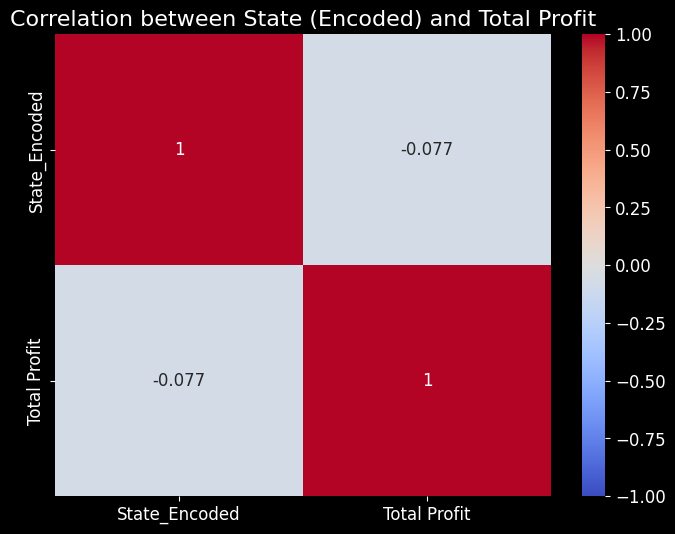

In [ ]:

from sklearn.preprocessing import LabelEncoder

corr_data = data.copy()

le = LabelEncoder()
corr_data['State_Encoded'] = le.fit_transform(corr_data['State'])

correlation_matrix = corr_data[['State_Encoded', 'Total Profit']].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# 5. Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between State (Encoded) and Total Profit', fontsize=16)
plt.show()

In [ ]:
import plotly.express as px

state_profit = data.groupby('State')['Total Profit'].sum().reset_index()
state_abbreviations = {
    'Alabama': 'AL', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE',
    'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
}
state_profit['State_Code'] = state_profit['State'].map(state_abbreviations)

fig = px.choropleth(state_profit,
                    locations='State_Code',
                    locationmode="USA-states",
                    color='Total Profit',
                    scope="usa",
                    color_continuous_scale="RdYlGn",
                    title="State-Level Profitability",
                    hover_name='State',
                    hover_data={'Total Profit': ':.2f'}) # Format hover data
fig.show()

In [ ]:

state_abbreviations = {
    'Alabama': 'AL', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE',
    'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
}
state_pivot = state_pivot.reset_index()
state_pivot['State_Code'] = state_pivot['State'].map(state_abbreviations)

fig = px.choropleth(state_pivot,
                    locations='State_Code',
                    locationmode="USA-states",
                    color='Profit Margin',
                    scope="usa",
                    color_continuous_scale="RdYlGn",
                    title="State-Level Profitability per profit margin",
                    hover_name='State',
                    hover_data={'Total Profit': ':.2f'}) # Format hover data
fig.show()

### Regional Sales and Profitability summary:
*   The **West** is the top-performing region, leading in both absolute sales and profit, while the **Central** region consistently underperforms.

*   A map of total profit reveals a clear **"Coastal Profitability" model**. National performance is heavily dependent on high-volume states like **California**, **New York**, and **Washington**, which generate the most absolute profit dollars.

*   However, a map of *profit margin* exposes a significant disconnect between this sales volume and operational efficiency. Smaller markets like **West Virginia (49.0% margin)** and the **District of Columbia (43.1% margin)** are our most *efficient* operators.

*   This highlights that our largest markets are not our most efficient. High-volume engines like **California (16.7% margin)** and profit-draining states like **Texas (-4.3% margin)** operate on much thinner, or even negative, margins.

*   This data proves the company operates on two distinct models: a **high-volume/lower-margin** model in large coastal markets and a **low-volume/high-efficiency** model in smaller, more operationally-focused markets.

* This dictates a tailored, dual-pronged strategy going forward: focus on incremental margin optimization in high-volume states like California, while simultaneously using the high-efficiency model of states like West Virginia as a blueprint for turning around unprofitable key regions like Texas and Ohio.

*   A final correlation analysis confirms there is no simple linear relationship between states and profit (coefficient of -0.077), proving that profitability is driven by these complex economic models, not arbitrary geographic factors.

## 2.5. Discount and Pricing Analysis

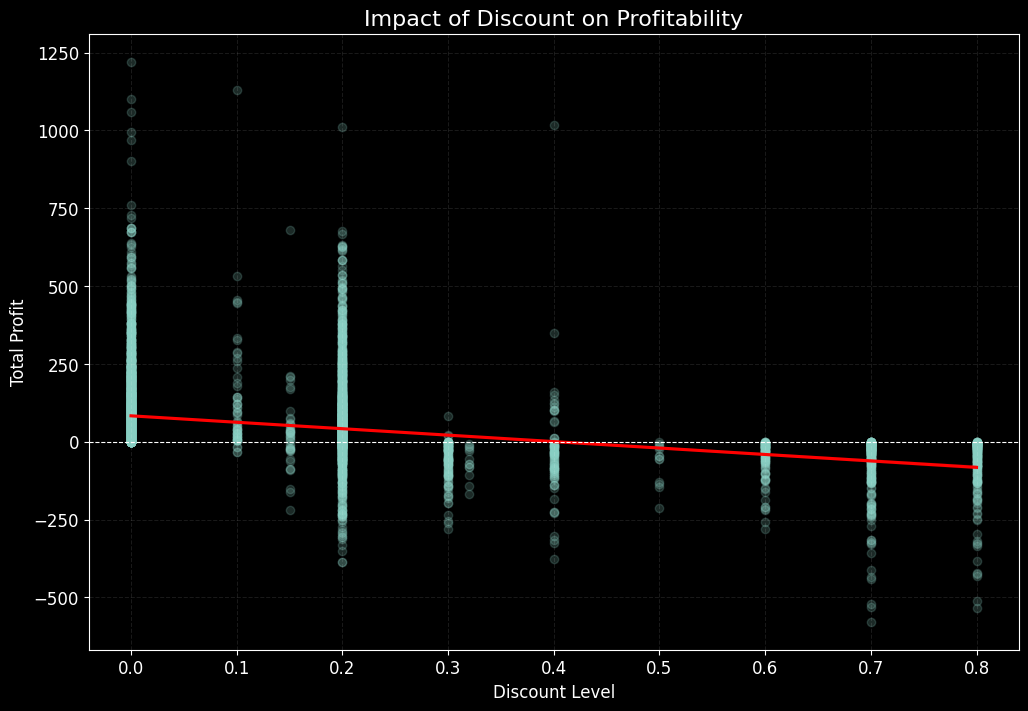

In [ ]:

plt.figure(figsize=(12, 8))
sns.regplot(x='Discount', y='Total Profit', data=data,
            scatter_kws={'alpha': 0.2},
            line_kws={'color': 'red'})

plt.axhline(0, color='white', linewidth=0.8, linestyle='--')

plt.title('Impact of Discount on Profitability', fontsize=16)
plt.xlabel('Discount Level', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.1)

plt.show()

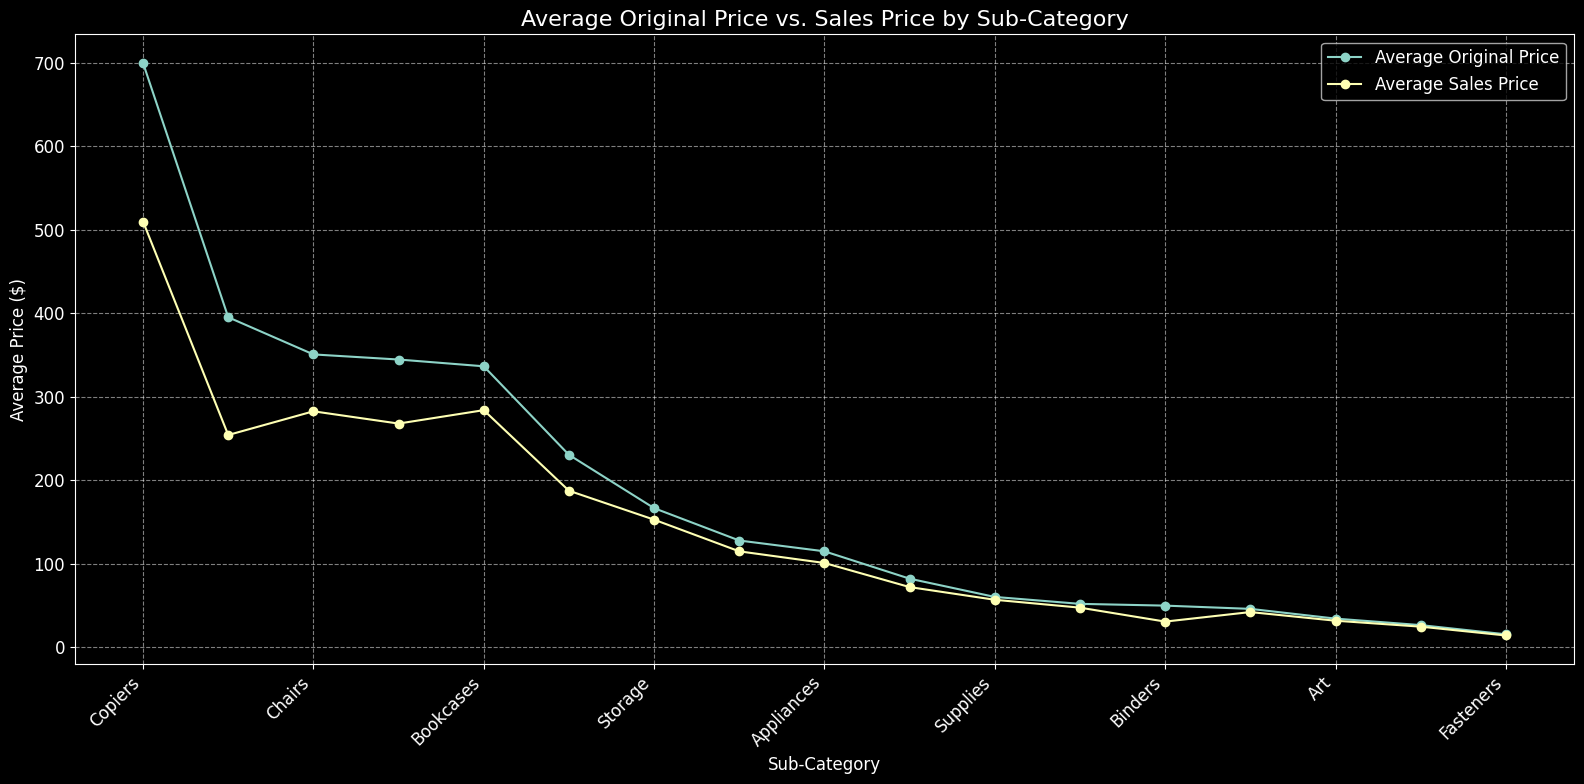

In [ ]:
price_comparison = data.groupby('Sub-Category')[['Original Price', 'Sales Price']].mean().sort_values(by='Original Price', ascending=False)

price_comparison.plot(kind='line', marker='o', figsize=(16, 8))

plt.title('Average Original Price vs. Sales Price by Sub-Category', fontsize=16)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(['Average Original Price', 'Average Sales Price'])

plt.tight_layout()
plt.show()

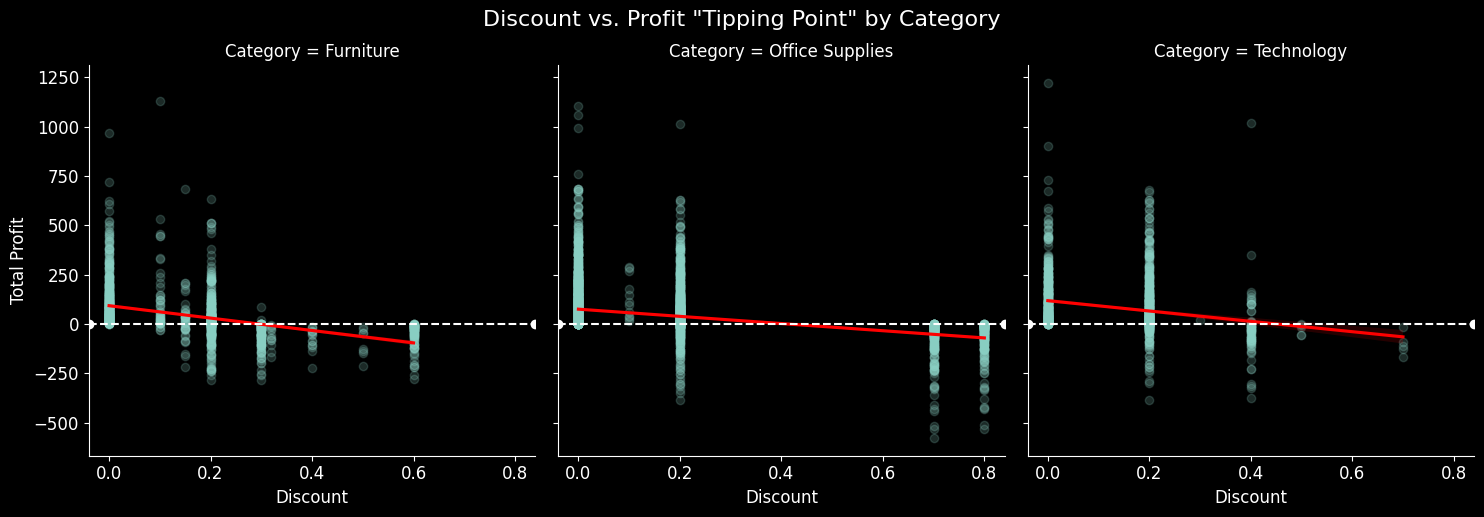

In [ ]:

g = sns.lmplot(x='Discount',
               y='Total Profit',
               col='Category',
               data=data,
               col_wrap=3,
               height=5,
               scatter_kws={'alpha':0.2},
               line_kws={'color': 'red'})

g.map(plt.axhline, y=0, color='white', linestyle='--')
g.fig.suptitle('Discount vs. Profit "Tipping Point" by Category', y=1.03, fontsize=16)
plt.show()

### **Discount and Pricing Analysis - Technical Summary**

*   A scatter plot and linear regression analysis show a strong, statistically significant **negative correlation** between the `Discount` level and `Total Profit`.

*   The analysis indicates a profitability "tipping point" at approximately a **20% discount**. Transactions with discounts exceeding this threshold are predominantly unprofitable, with high-discount tiers (e.g., 0.7, 0.8) consistently resulting in significant net losses.

*   A comparative analysis of average `Original Price` vs. average `Sales Price` across sub-categories reveals that the largest **absolute monetary discounts** are applied to high-ticket sub-categories such as "Copiers," "Chairs," and "Bookcases."

*   The **proportional difference** between Original and Sales Price is most pronounced in the "Chairs" and "Bookcases" sub-categories. This identifies the Furniture category as having the most aggressive discount strategy in percentage terms, corroborating earlier findings of it being a low-margin category.

## 2.6 Temporal Analysis

In [ ]:
print(data[data['Order Date'] == data['Order Date'].max()])
print(data[data['Order Date'] == data['Order Date'].min()])

      Row ID        Order ID Order Date Ship Date    Ship Mode Customer ID  \
7253    8596  CA-2029-111934 2029-05-05       NaT  First Class    GD-14590   
7254    8597  CA-2029-111934 2029-05-05       NaT  First Class    GD-14590   

        Segment        Country       City     State  ...  \
7253  Corporate  United States  Arlington  Virginia  ...   
7254  Corporate  United States  Arlington  Virginia  ...   

     Customer_Total_Quantity Customer_Total_Profit Customer_Avg_Discount  \
7253                      25             2240.9319              0.133333   
7254                      25             2240.9319              0.133333   

     Customer Sales Quintile Customer Profit Quintile RFM_Segment  \
7253                       4                        4      Silver   
7254                       4                        4      Silver   

      Acquisition_Date  Acquisition_Month  Order_Month  Customer_Type  
7253        2016-09-11            2016-09      2029-05       Existing  
725

Data ranges from 1999-04-17 to 2029-05-05.
Setting plot range from year 1999 to 2029.


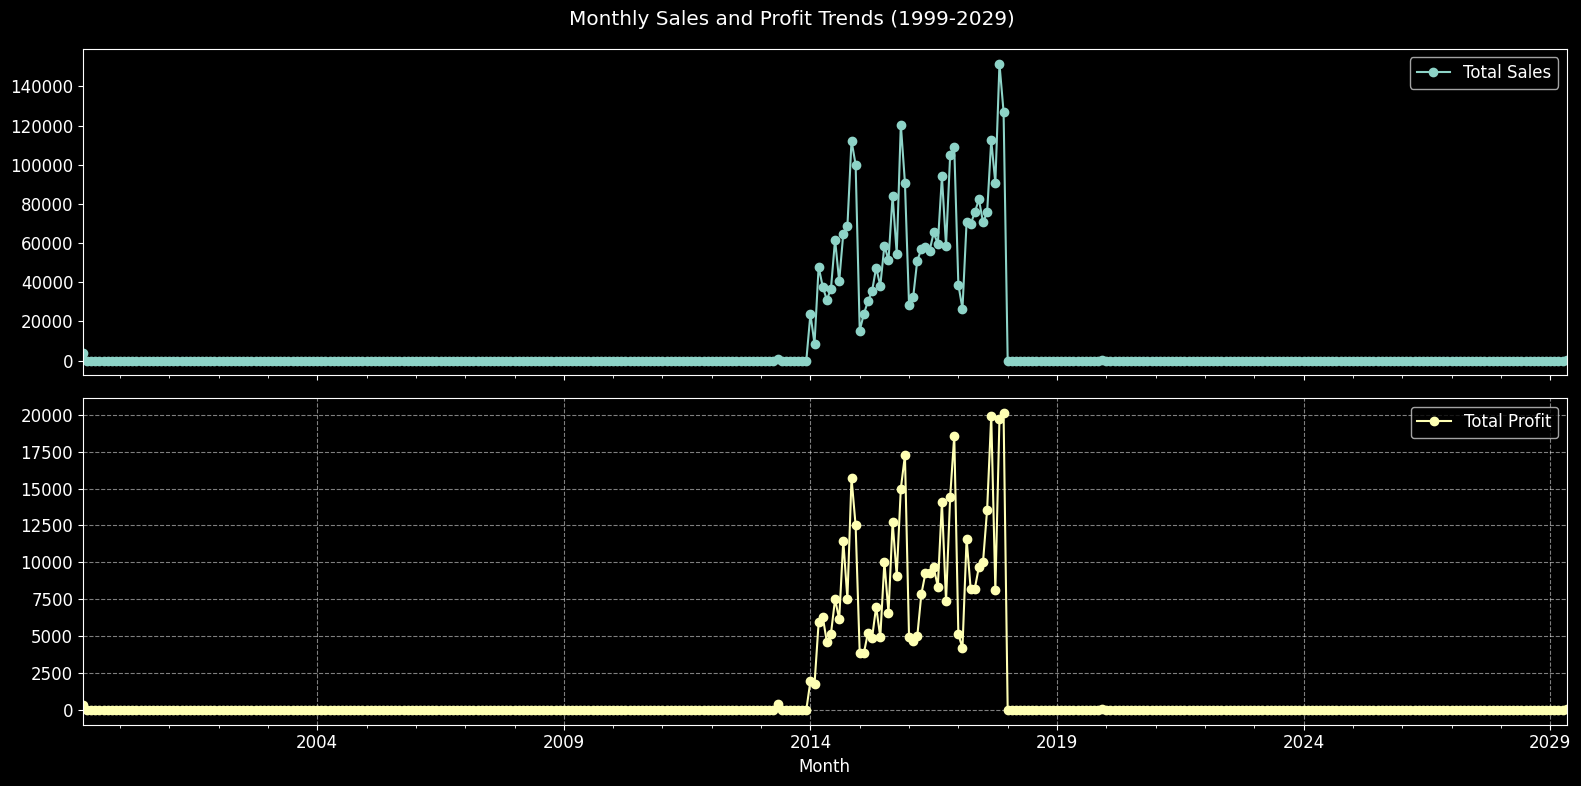

In [ ]:

min_date = data['Order Date'].min()
max_date = data['Order Date'].max()
start_year = min_date.year
end_year = max_date.year

print(f"Data ranges from {min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}.")
print(f"Setting plot range from year {start_year} to {end_year}.")

filtered_data = data[(data['Order Date'].dt.year >= start_year) & (data['Order Date'].dt.year <= end_year)].copy()

time_series_data = filtered_data.set_index('Order Date')

monthly_trends = time_series_data[['Total Sales', 'Total Profit']].resample('M').sum()

monthly_trends.plot(kind='line',
                    figsize=(16, 8),
                    marker='o',
                    subplots=True,
                    title=f'Monthly Sales and Profit Trends ({start_year}-{end_year})')

plt.xlabel('Month')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Still there are issues so we will define a threshold - 10 orders or more will define an active year

Activity between 2014 and 2017.


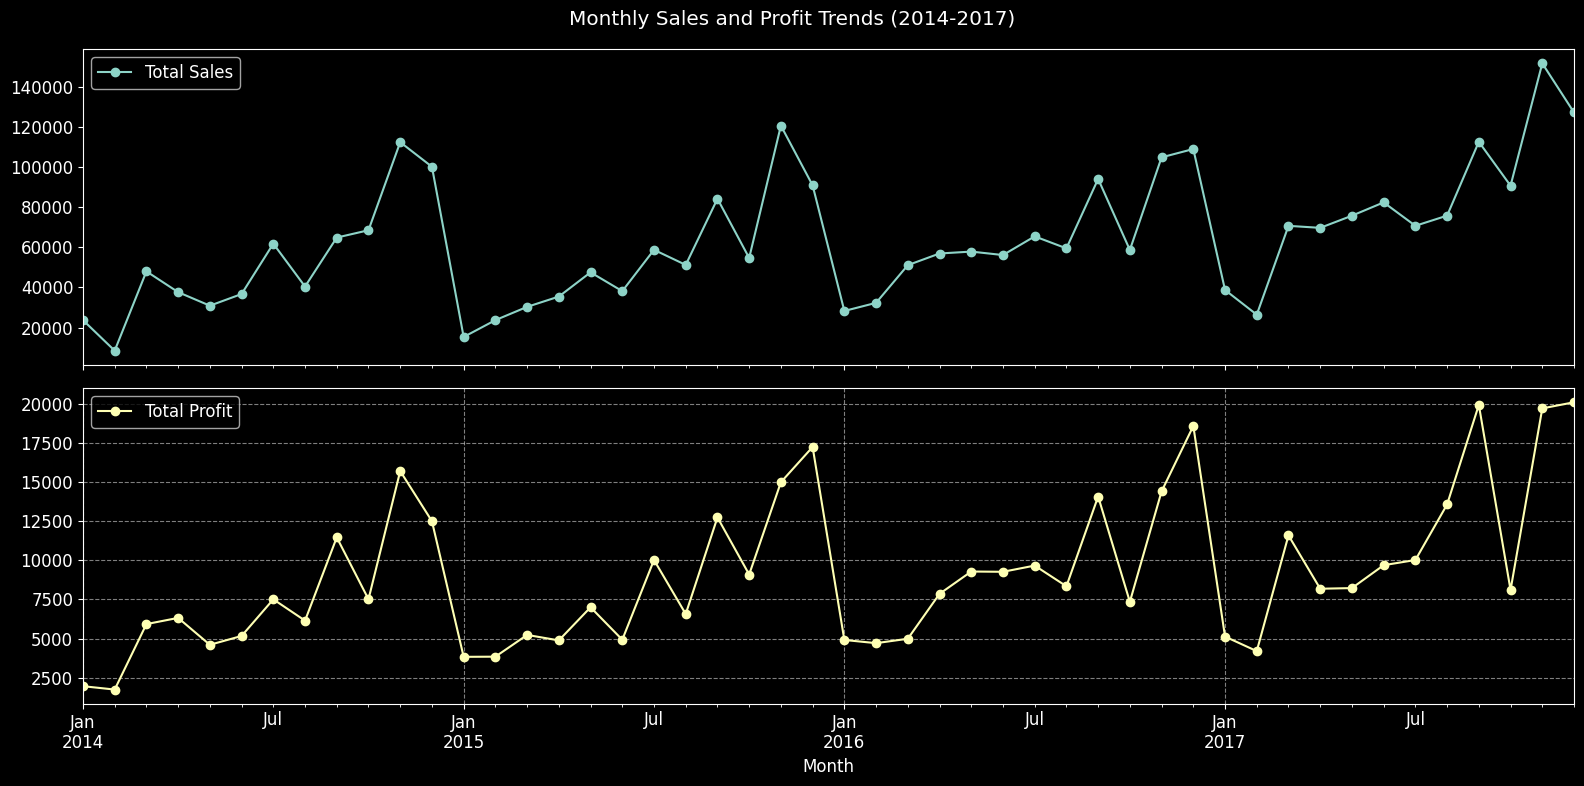

In [ ]:
active_years = data['Order Date'].dt.year.value_counts()

real_start_year = active_years[active_years > 10].index.min()
real_end_year = active_years[active_years > 10].index.max()

print(f"Activity between {real_start_year} and {real_end_year}.")

filtered_data = data[(data['Order Date'].dt.year >= real_start_year) & (data['Order Date'].dt.year <= real_end_year)].copy()

time_series_data = filtered_data.set_index('Order Date')
monthly_trends = time_series_data[['Total Sales', 'Total Profit']].resample('M').sum()

monthly_trends.plot(kind='line',
                    figsize=(16, 8),
                    marker='o',
                    subplots=True,
                    title=f'Monthly Sales and Profit Trends ({real_start_year}-{real_end_year})')

plt.xlabel('Month')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

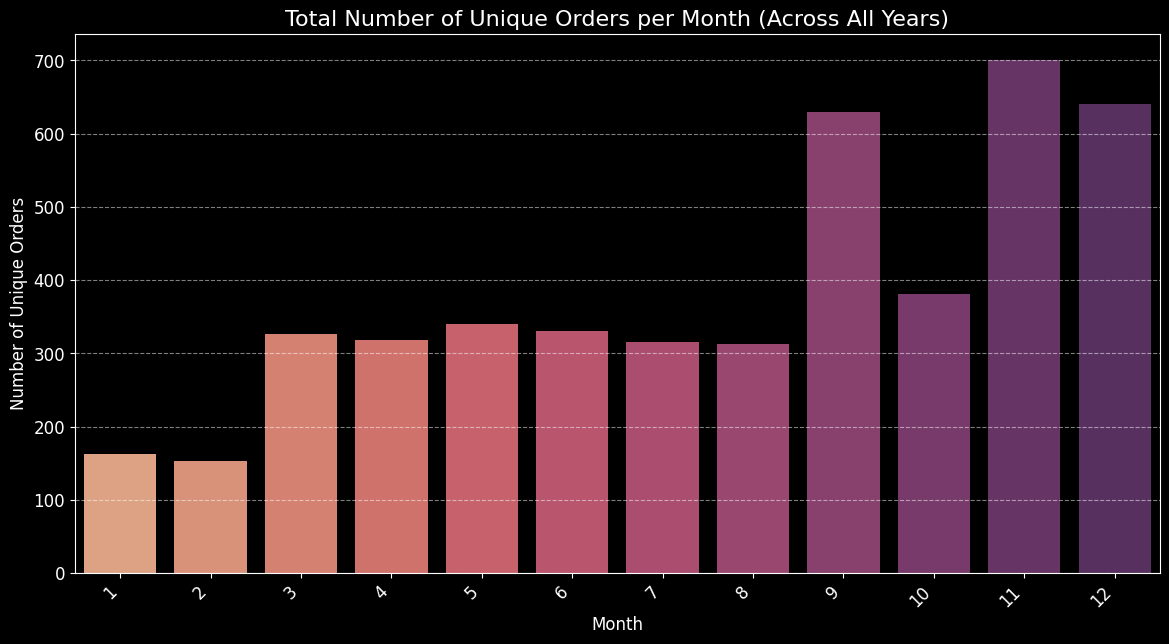

In [ ]:
filtered_data['Order Month'] = filtered_data['Order Date'].dt.month

monthly_order_counts = filtered_data.groupby('Order Month')['Order ID'].nunique().sort_index()

month_labels = filtered_data.groupby('Order Month')['Order Month'].first().sort_index()

plt.figure(figsize=(14, 7))
sns.barplot(x=month_labels, y=monthly_order_counts.values, palette='flare')

plt.title('Total Number of Unique Orders per Month (Across All Years)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Unique Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


Year-Over-Year Growth (%):
            Total Sales  Total Profit
Order Date                           
2015           2.710266     15.997464
2016          18.916988     13.023616
2017          28.159222     22.070686


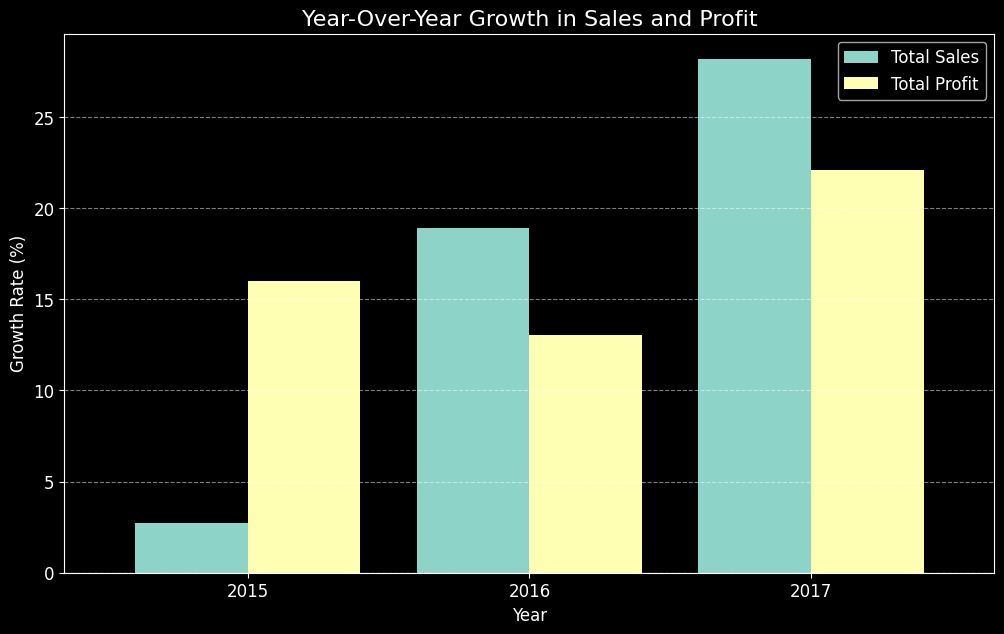

In [ ]:
yearly_totals = time_series_data[['Total Sales', 'Total Profit']].resample('Y').sum()

yearly_growth = yearly_totals.pct_change() * 100

yearly_growth = yearly_growth.dropna()

yearly_growth.index = yearly_growth.index.year

print("\nYear-Over-Year Growth (%):")
print(yearly_growth)

yearly_growth.plot(kind='bar', figsize=(12, 7), width=0.8)
plt.title('Year-Over-Year Growth in Sales and Profit', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.xticks(rotation=0)
plt.axhline(0, color='white', linewidth=0.8, linestyle='--') # Zero-growth line
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

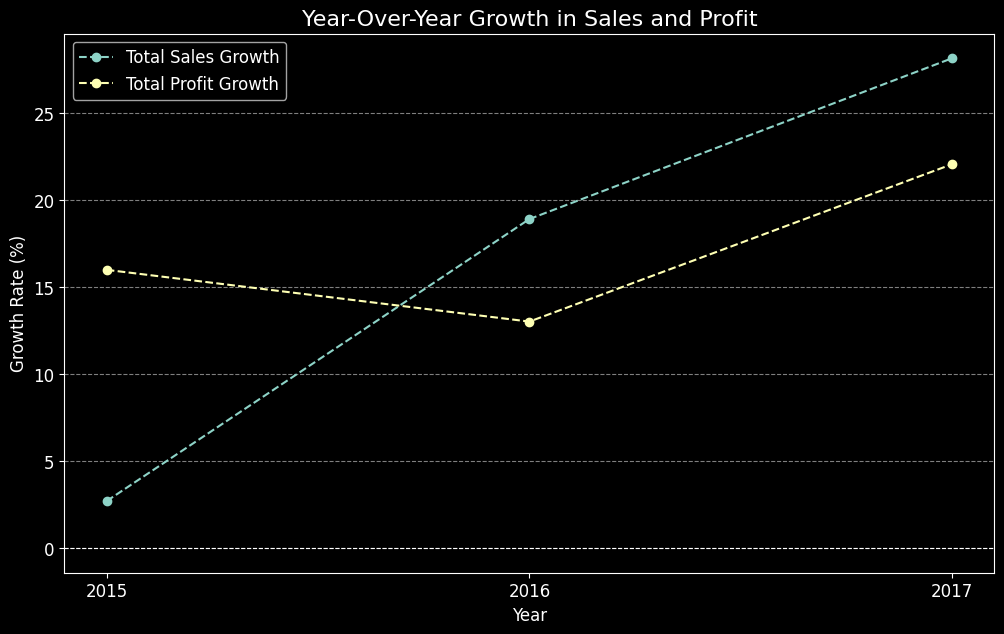

In [ ]:
yearly_growth.plot(kind='line', figsize=(12, 7), marker='o', linestyle='--')

plt.title('Year-Over-Year Growth in Sales and Profit', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.xticks(yearly_growth.index) # Ensure ticks are exactly on the years
plt.axhline(0, color='white', linewidth=0.8, linestyle='--')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.legend(['Total Sales Growth', 'Total Profit Growth'])
plt.show()

### **Temporal Analysis - Technical Summary**

*   Analysis of the `Order Date` column confirmed that all significant business activity occurred between **2014 and 2017**. Subsequent temporal analysis was filtered to this valid date range.

*   A monthly resampling of `Total Sales` and `Total Profit` reveals a strong and consistent seasonal pattern. Business activity consistently peaks in the **fourth quarter (Q4)** and reaches a trough in the first quarter (Q1), indicating a holiday-driven sales cycle.

*   An aggregated monthly bar chart of unique order counts confirms the seasonal trend, with order volume beginning a sharp acceleration in September and peaking in November.

*   **Year-Over-Year (YoY) Growth:**
    *   **Sales Growth:** The YoY sales growth rate shows consistent acceleration, increasing from ~3% in 2015 to ~28% in 2017.
    *   **Profit Growth:** The YoY profit growth rate fluctuated, exceeding sales growth in 2015 (16%), decelerating in 2016 (13%), and re-accelerating in 2017 (22%).

## 2.7 Market Basket Analysis

In [ ]:
from itertools import combinations

#we group by 'Order ID' and create a unique list of sub-categories for each one.
transactions_df = data.groupby('Order ID')['Sub-Category'].unique().reset_index()
print(transactions_df)


            Order ID                              Sub-Category
0     CA-1999-155306                      [Art, Phones, Paper]
1     CA-2013-120880                          [Paper, Binders]
2     CA-2014-100090                                 [Binders]
3     CA-2014-100293                                   [Paper]
4     CA-2014-100328                                 [Binders]
...              ...                                       ...
4609  US-2017-168802                                 [Binders]
4610  US-2017-169320                        [Art, Accessories]
4611  US-2017-169488                                   [Paper]
4612  US-2017-169502                    [Supplies, Appliances]
4613  US-2017-169551  [Bookcases, Paper, Storage, Accessories]

[4614 rows x 2 columns]


In [ ]:
transactions_df['pairs'] = transactions_df['Sub-Category'].apply(lambda x: list(combinations(sorted(x), 2)))

transactions_df.head()

Order ID          Sub-Category  \
0  CA-1999-155306  [Art, Phones, Paper]   
1  CA-2013-120880      [Paper, Binders]   
2  CA-2014-100090             [Binders]   
3  CA-2014-100293               [Paper]   
4  CA-2014-100328             [Binders]   

                                            pairs  
0  [(Art, Paper), (Art, Phones), (Paper, Phones)]  
1                              [(Binders, Paper)]  
2                                              []  
3                                              []  
4                                              []

In [ ]:
 transactions_df.explode('pairs').dropna()['pairs'].value_counts().reset_index()

pairs  count
0          (Binders, Paper)    243
1    (Binders, Furnishings)    168
2      (Furnishings, Paper)    159
3        (Binders, Storage)    154
4              (Art, Paper)    143
..                      ...    ...
118   (Appliances, Copiers)      1
119          (Art, Copiers)      1
120       (Copiers, Phones)      1
121       (Chairs, Copiers)      1
122     (Copiers, Supplies)      1

[123 rows x 2 columns]

In [ ]:
pair_counts = transactions_df.explode('pairs').dropna()['pairs'].value_counts().reset_index()
pair_counts.columns = ['pair', 'count']

pair_counts.head()

pair  count
0        (Binders, Paper)    243
1  (Binders, Furnishings)    168
2    (Furnishings, Paper)    159
3      (Binders, Storage)    154
4            (Art, Paper)    143

In [ ]:
print(f"\nFound {len(pair_counts)} unique product pairs across all orders.")
print("Top 10 most frequently co-purchased pairs:")
print(pair_counts.head(10))


Found 123 unique product pairs across all orders.
Top 10 most frequently co-purchased pairs:
                     pair  count
0        (Binders, Paper)    243
1  (Binders, Furnishings)    168
2    (Furnishings, Paper)    159
3      (Binders, Storage)    154
4            (Art, Paper)    143
5        (Paper, Storage)    141
6          (Art, Binders)    134
7       (Binders, Phones)    130
8         (Paper, Phones)    127
9  (Accessories, Binders)    125


In [ ]:
#for each individual product, we need total no. of transactions and purchase count
total_transactions = len(data['Order ID'].unique())
individual_product_counts = data.groupby('Sub-Category')['Order ID'].nunique()

print(individual_product_counts)

Sub-Category
Accessories     610
Appliances      339
Art             729
Binders        1185
Bookcases       144
Chairs          404
Copiers           4
Envelopes       232
Fasteners       215
Furnishings     822
Labels          337
Machines         32
Paper          1138
Phones          628
Storage         664
Supplies        174
Tables          119
Name: Order ID, dtype: int64


In [ ]:
def calculate_metrics(pair, count):
    item1, item2 = pair

    # Support = How popular is this pair in all transactions = no. of transactions with this pair / total no. of transactions
    support = count / total_transactions

    # Confidence: If a customer buys Item 1, how likely are they to also buy Item 2 = support(I1 and I2) / Support(I1)
    count_item1 = individual_product_counts.get(item1, 0)
    confidence = count / count_item1 if count_item1 > 0 else 0

    # Lift: How much more likely is the co-purchase than would be expected by random chance? = support(I1 and I2) / Support(I1) * Support(I2)
    count_item2 = individual_product_counts.get(item2, 0)
    lift = (support * total_transactions) / (count_item1 * count_item2) * total_transactions if (count_item1 > 0 and count_item2 > 0) else 0

    return support, confidence, lift

In [ ]:
metrics = pair_counts['pair'].apply(lambda x: calculate_metrics(x, pair_counts[pair_counts['pair'] == x]['count'].iloc[0]))
pair_counts[['support', 'confidence', 'lift']] = pd.DataFrame(metrics.tolist(), index=pair_counts.index)

pair_counts.head()


pair  count   support  confidence      lift
0        (Binders, Paper)    243  0.052666    0.205063  0.831425
1  (Binders, Furnishings)    168  0.036411    0.141772  0.795787
2    (Furnishings, Paper)    159  0.034460    0.193431  0.784261
3      (Binders, Storage)    154  0.033377    0.129958  0.903050
4            (Art, Paper)    143  0.030993    0.196159  0.795324

In [ ]:
meaningful_rules = pair_counts[pair_counts['lift'] >= 1.5].sort_values('lift', ascending=False)

print("Top Data-Driven Bundling Opportunities")
if meaningful_rules.empty:
    print("No pairs met the lift >= 1.5 threshold.")
else:
    print(meaningful_rules.head(10))

Top Data-Driven Bundling Opportunities
                      pair  count   support  confidence      lift
122    (Copiers, Supplies)      1  0.000217    0.250000  6.629310
116      (Copiers, Labels)      1  0.000217    0.250000  3.422849
118  (Appliances, Copiers)      1  0.000217    0.002950  3.402655
121      (Chairs, Copiers)      1  0.000217    0.002475  2.855198
114     (Binders, Copiers)      2  0.000433    0.001688  1.946835
120      (Copiers, Phones)      1  0.000217    0.250000  1.836783
119         (Art, Copiers)      1  0.000217    0.001372  1.582305


#### Analysis:

Market Basket Analysis, performed using a direct co-occurrence count method in Pandas, revealed two distinct types of product relationships:

1.  **Obvious, High-Volume Pairs:** The most frequently co-purchased items are high-volume office essentials like `(Binders, Paper)`. While these pairs represent a large number of transactions, their `lift` is low because their frequent co-occurrence is expected due to their individual popularity.

2.  **Niche, High-Influence Pairs:** The pairs with the highest `lift` are centered around rare, high-value purchases, particularly **Copiers**. For example, the rule `(Copiers) -> (Supplies)` has a lift of over 6.6. This indicates a strong purchasing signal: when a customer decides to buy a copier, they are over 6 times more likely to also need associated supplies.

**Conclusion:**
While the evidence for the high-lift pairs is based on a small number of transactions, it provides a powerful, data-driven hypothesis for targeted marketing. A tactical strategy would be to program our e-commerce site to automatically display a 'Recommended Add-on' prompt for 'Supplies' and 'Labels' whenever a 'Copier' is added to a customer's shopping cart. This is a low-cost action with a high potential to increase the value of our largest and rarest transactions.

## 2.8 Unit Based Analysis

In [ ]:
product_summary = data.groupby('Product Name').agg(
    Total_Quantity_Sold=('Quantity', 'sum'),
    Profit_Per_Unit=('Total Profit', 'mean'),
    Category=('Category', 'first') # Add this line
).dropna()

product_summary.head()

Total_Quantity_Sold  \
Product Name                                                              
"While you Were Out" Message Book, One Form per...                    8   
#10 Gummed Flap White Envelopes, 100/Box                             11   
#10 Self-Seal White Envelopes                                        10   
#10 White Business Envelopes,4 1/8 x 9 1/2                           32   
#10- 4 1/8" x 9 1/2" Recycled Envelopes                              37   

                                                    Profit_Per_Unit  \
Product Name                                                          
"While you Were Out" Message Book, One Form per...         9.151333   
#10 Gummed Flap White Envelopes, 100/Box                  12.988850   
#10 Self-Seal White Envelopes                             56.503550   
#10 White Business Envelopes,4 1/8 x 9 1/2               187.010257   
#10- 4 1/8" x 9 1/2" Recycled Envelopes                   51.924340   

                                                           Category  
Product Name                                                         
"While you Were Out" Message Book, One Form per...  Office Supplies  
#10 Gummed Flap White Envelopes, 100/Box            Office Supplies  
#10 Self-Seal White Envelopes                       Office Supplies  
#10 White Business Envelopes,4 1/8 x 9 1/2          Office Supplies  
#10- 4 1/8" x 9 1/2" Recycled Envelopes             Office Supplies

In [ ]:
switch_plot_mode('light')

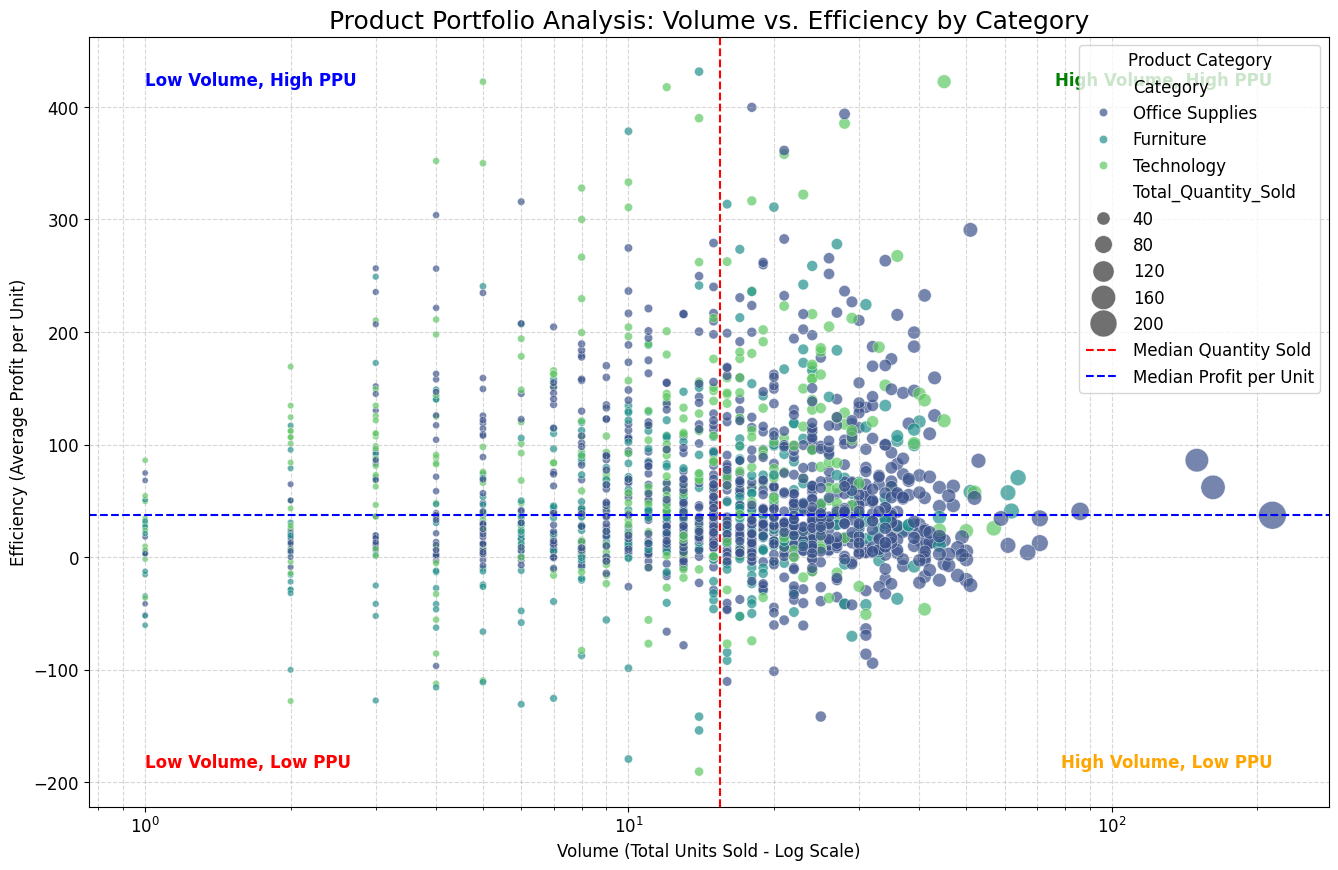

In [ ]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x='Total_Quantity_Sold',
    y='Profit_Per_Unit',
    hue='Category', # This is the key enhancement
    size='Total_Quantity_Sold', # Optional: make high-volume dots bigger
    sizes=(20, 400),
    alpha=0.7,
    palette='viridis',
    data=product_summary
)
plt.axvline(product_summary['Total_Quantity_Sold'].median(), color='red', linestyle='--',label='Median Quantity Sold')
plt.axhline(product_summary['Profit_Per_Unit'].median(), color='blue', linestyle='--', label='Median Profit per Unit')
plt.title('Product Portfolio Analysis: Volume vs. Efficiency by Category', fontsize=18)
plt.xlabel('Volume (Total Units Sold - Log Scale)', fontsize=12)
plt.ylabel('Efficiency (Average Profit per Unit)', fontsize=12)
plt.xscale('log')
plt.grid(True, which="both", ls="--", alpha=0.5)


plt.text(product_summary['Total_Quantity_Sold'].max(), product_summary['Profit_Per_Unit'].max(), 'High Volume, High PPU', ha='right', va='top', fontsize=12, color='green', weight='bold')
plt.text(product_summary['Total_Quantity_Sold'].max(), product_summary['Profit_Per_Unit'].min(), 'High Volume, Low PPU', ha='right', va='bottom', fontsize=12, color='orange', weight='bold')
plt.text(product_summary['Total_Quantity_Sold'].min(), product_summary['Profit_Per_Unit'].max(), 'Low Volume, High PPU', ha='left', va='top', fontsize=12, color='blue', weight='bold')
plt.text(product_summary['Total_Quantity_Sold'].min(), product_summary['Profit_Per_Unit'].min(), 'Low Volume, Low PPU', ha='left', va='bottom', fontsize=12, color='red', weight='bold')

plt.legend(title='Product Category')
plt.show()

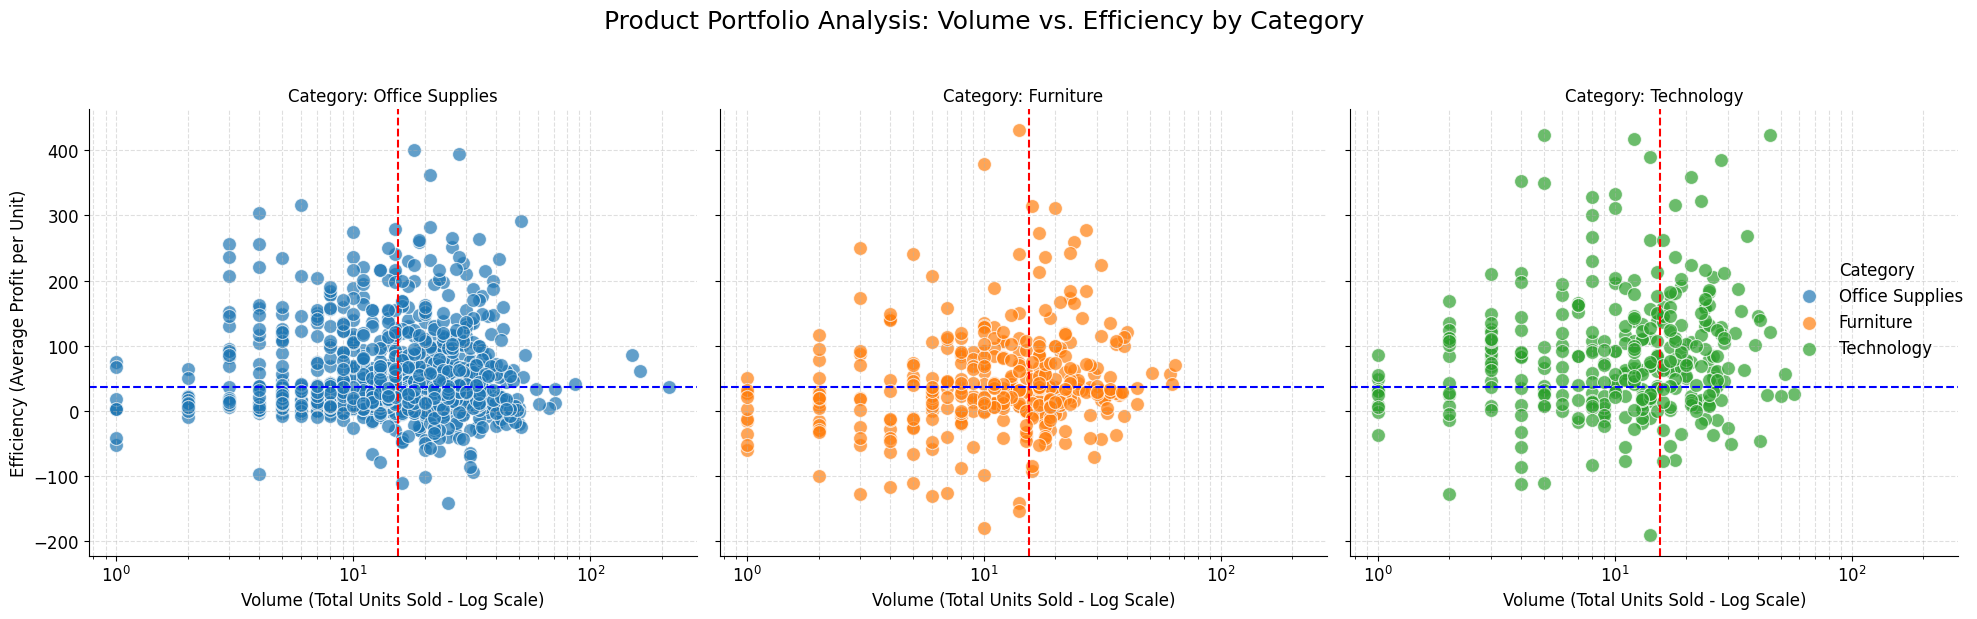

In [ ]:
g = sns.FacetGrid(product_summary, col="Category", hue="Category", col_wrap=3, height=6)

g.map(sns.scatterplot, "Total_Quantity_Sold", "Profit_Per_Unit", alpha=0.7, s=100)


for ax in g.axes.flat:

    volume_median = product_summary['Total_Quantity_Sold'].median()
    efficiency_median = product_summary['Profit_Per_Unit'].median()

    ax.axvline(x=volume_median, color='red', linestyle='--', label='Overall Median Volume')
    ax.axhline(y=efficiency_median, color='blue', linestyle='--', label='Overall Median Profit/Unit')
    ax.set_xscale('log') # Keep the log scale for volume
    ax.grid(True, which="both", ls="--", alpha=0.4)


g.fig.suptitle('Product Portfolio Analysis: Volume vs. Efficiency by Category', y=1.03, fontsize=18)
g.set_axis_labels("Volume (Total Units Sold - Log Scale)", "Efficiency (Average Profit per Unit)")
g.set_titles("Category: {col_name}") # Set title for each subplot
g.add_legend()

plt.tight_layout()
plt.show()

#### analysis:
*   **Office Supplies:** Exhibits a dense, symmetrical distribution around the median profit-per-unit. The portfolio is characterized by a high concentration of products in high-volume, low-margin quadrants ('Cash Cows'), defining its role as a volume driver.

*   **Furniture:** Displays a strong downward shift in its entire product distribution. The vast majority of products fall below the median profit line, with a significant number showing negative per-unit profitability ('Dogs'). The category structurally lacks high-efficiency products.

*   **Technology:** Shows a distinct upward shift in distribution, with a high concentration of products in the high-efficiency, low-volume quadrant ('Question Marks'). The category's primary weakness is sales volume, not per-unit profitability.

*   **Overall Conclusion:** The use of consistent median lines across all three facets confirms that these are structurally distinct portfolios, invalidating a one-size-fits-all strategic approach. Each category requires a tailored strategy focused on its specific weakness: margin for Furniture, and volume for Technology.

In [ ]:
volume_median = product_summary['Total_Quantity_Sold'].median()
efficiency_median = product_summary['Profit_Per_Unit'].median()


def assign_quadrant(row):
    if row['Total_Quantity_Sold'] >= volume_median and row['Profit_Per_Unit'] >= efficiency_median:
        return 'Stars'
    elif row['Total_Quantity_Sold'] >= volume_median and row['Profit_Per_Unit'] < efficiency_median:
        return 'Cash Cows'
    elif row['Total_Quantity_Sold'] < volume_median and row['Profit_Per_Unit'] >= efficiency_median:
        return 'Question Marks'
    else:
        return 'Dogs'

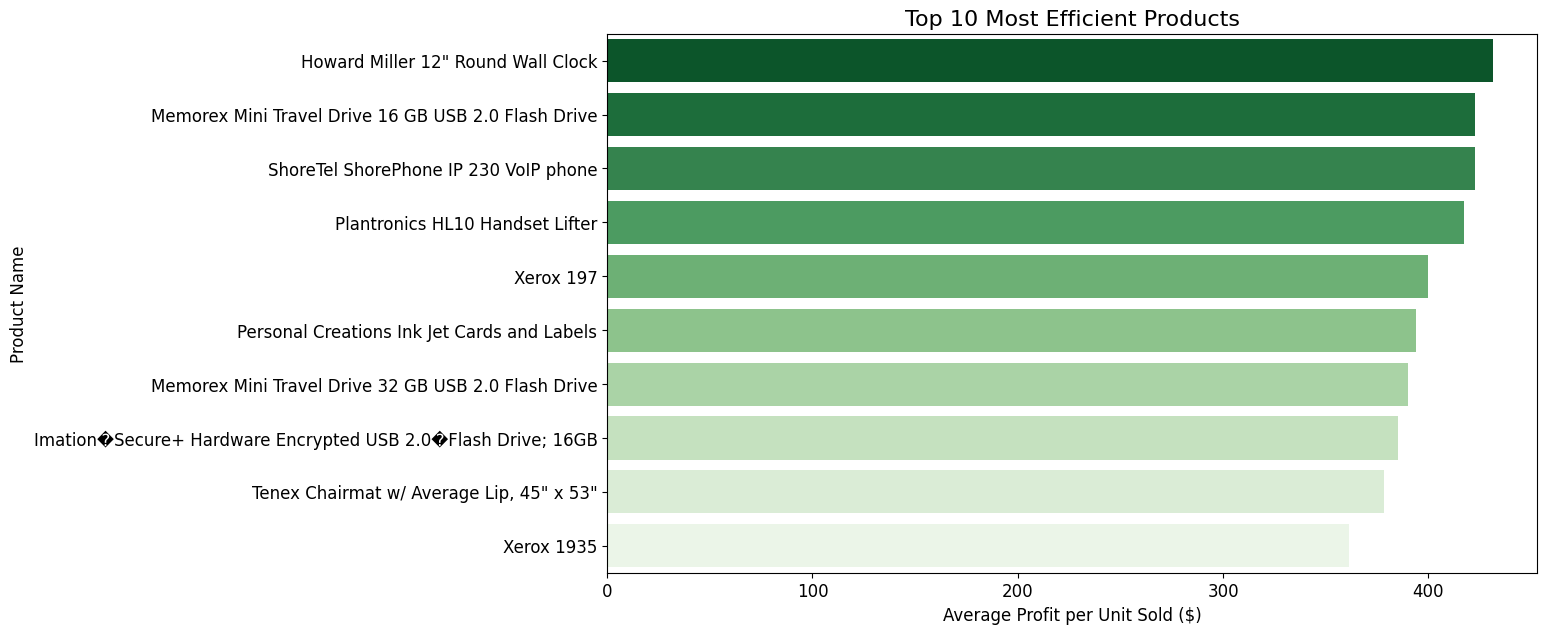

In [ ]:

plt.figure(figsize=(12, 7))
sns.barplot(x='Profit_Per_Unit', y=product_summary.sort_values('Profit_Per_Unit', ascending=False).head(10).index, data=top_10_efficient, palette='Greens_r')
plt.title('Top 10 Most Efficient Products', fontsize=16)
plt.xlabel('Average Profit per Unit Sold ($)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

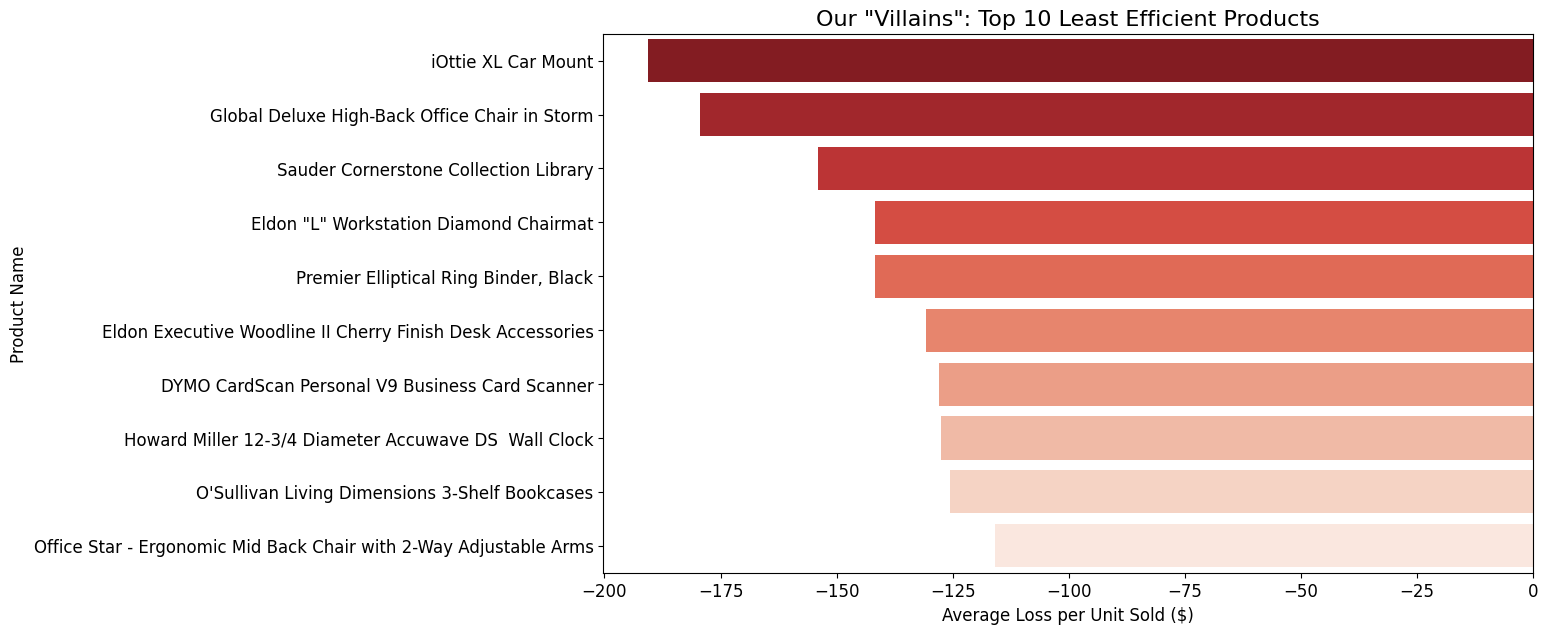

In [ ]:

plt.figure(figsize=(12, 7))
sns.barplot(x='Profit_Per_Unit', y=product_summary.sort_values('Profit_Per_Unit', ascending=True).head(10).index, data=bottom_10_efficient, palette='Reds_r')
plt.title('Our "Villains": Top 10 Least Efficient Products', fontsize=16)
plt.xlabel('Average Loss per Unit Sold ($)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

In [ ]:
volume_median = product_summary['Total_Quantity_Sold'].median()
efficiency_median = product_summary['Profit_Per_Unit'].median()


def assign_quadrant(row):
    if row['Total_Quantity_Sold'] >= volume_median and row['Profit_Per_Unit'] >= efficiency_median:
        return 'Stars'
    elif row['Total_Quantity_Sold'] >= volume_median and row['Profit_Per_Unit'] < efficiency_median:
        return 'Cash Cows'
    elif row['Total_Quantity_Sold'] < volume_median and row['Profit_Per_Unit'] >= efficiency_median:
        return 'Question Marks'
    else:
        return 'Dogs'

In [ ]:
product_summary['Quadrant'] = product_summary.apply(assign_quadrant, axis=1)




--- Composition of Each Quadrant by Product Category ---
Category        Furniture  Office Supplies  Technology
Quadrant                                              
Cash Cows              72              319          34
Dogs                  122              235          77
Question Marks         89              199         137
Stars                  73              272          89


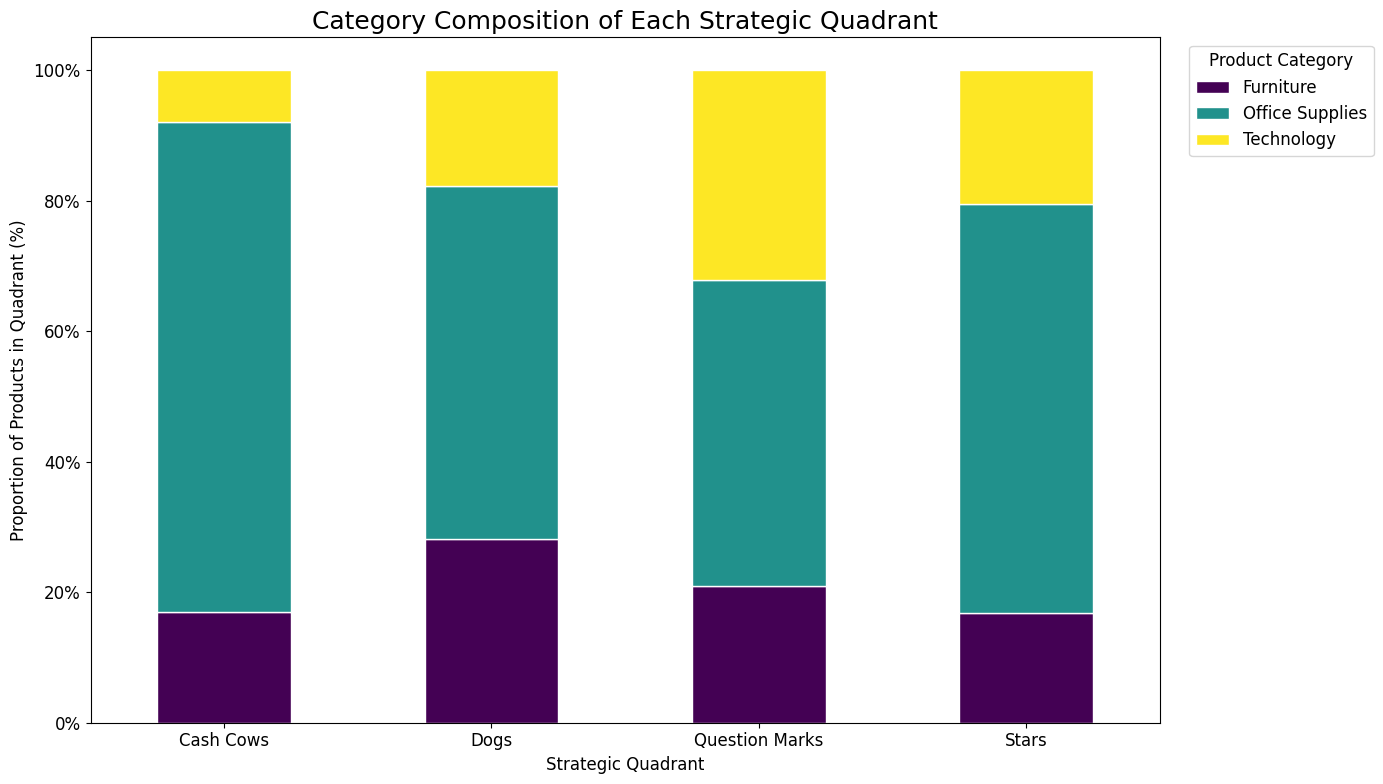

In [ ]:
composition_table = pd.crosstab(product_summary['Quadrant'], product_summary['Category'])

print("\n--- Composition of Each Quadrant by Product Category ---")
print(composition_table)


composition_percent = composition_table.div(composition_table.sum(axis=1), axis=0)

composition_percent.plot(kind='bar',
                         stacked=True,
                         figsize=(14, 8),
                         colormap='viridis',
                         edgecolor='white')

plt.title('Category Composition of Each Strategic Quadrant', fontsize=18)
plt.xlabel('Strategic Quadrant', fontsize=12)
plt.ylabel('Proportion of Products in Quadrant (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Product Category', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))

plt.tight_layout()
plt.show()


#### analysis:
This chart provides the definitive evidence for a category-specific strategy. The data clearly shows that:
*   **Furniture** is systemically underperforming and concentrated in our weakest quadrant.
*   **Office Supplies** forms the high-volume backbone of the business.
*   **Technology** represents our greatest source of high-margin growth potential.

The strategic path forward is now clear and supported by data: we must pursue a **Fix/Discontinue** strategy for Furniture, a **Protect/Bundle** strategy for Office Supplies, and a **Market/Grow** strategy for Technology.